In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [2]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

Strategy  lifecycle_infrastructure_el  environmental_restoration_el  \
0        S1                 3.171878e+06                  0.000000e+00   
1        S2                 3.262527e+06                  0.000000e+00   
2        S3                 3.262527e+06                  0.000000e+00   
3        S4                 2.433064e+07                  1.422186e+06   
4        S5                 3.416034e+07                  2.968567e+06   
5        S6                 2.481681e+07                  1.422186e+06   
6        S7                 2.433064e+07                  1.422186e+06   
7        S8                 2.481681e+07                  1.422186e+06   
8        S9                 2.433064e+07                  1.422186e+06   
9       S10                 3.485867e+07                  2.968567e+06   
10      S11                 3.416034e+07                  2.968567e+06   
11      S12                 3.485867e+07                  2.968567e+06   
12      S13                 3.416034e+07                  2.968567e+06   

       safety_el  total_cost_el  lifecycle_infrastructure_br  \
0   9.792551e+05   4.151133e+06                 1.766953e+06   
1   1.048641e+06   4.311168e+06                 2.330422e+07   
2   1.048641e+06   4.311168e+06                 3.304793e+07   
3   1.881130e+06   2.763396e+07                 1.766953e+06   
4   2.822655e+06   3.995156e+07                 1.766953e+06   
5   1.881130e+06   2.812013e+07                 4.520485e+06   
6   1.881130e+06   2.763396e+07                 2.330422e+07   
7   1.881130e+06   2.812013e+07                 2.602966e+06   
8   1.881130e+06   2.763396e+07                 1.052076e+07   
9   2.822655e+06   4.064989e+07                 6.067214e+06   
10  2.822655e+06   3.995156e+07                 3.304793e+07   
11  2.822655e+06   4.064989e+07                 3.306052e+06   
12  2.822655e+06   3.995156e+07                 1.464019e+07   

    environmental_restoration_br     safety_br  total_cost_br  
0                   0.000000e+00  1.048641e+06   2.815594e+06  
1                   1.422186e+06  1.881130e+06   2.660754e+07  
2                   2.968567e+06  2.822655e+06   3.883915e+07  
3                   0.000000e+00  1.048641e+06   2.815594e+06  
4                   0.000000e+00  1.048641e+06   2.815594e+06  
5                   1.422186e+06  1.881130e+06   7.823801e+06  
6                   1.422186e+06  1.881130e+06   2.660754e+07  
7                   1.422186e+06  1.881130e+06   5.906282e+06  
8                   1.422186e+06  1.881130e+06   1.382408e+07  
9                   2.968567e+06  2.822655e+06   1.185844e+07  
10                  2.968567e+06  2.822655e+06   3.883915e+07  
11                  2.968567e+06  2.822655e+06   9.097275e+06  
12                  2.968567e+06  2.822655e+06   2.043141e+07

In [3]:
df_cost = df_cost.set_index('Strategy')

In [4]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [5]:
df_cost

lifecycle_infrastructure_el  environmental_restoration_el  \
Strategy                                                              
S1                       3.171878e+06                  0.000000e+00   
S2                       3.262527e+06                  0.000000e+00   
S3                       3.262527e+06                  0.000000e+00   
S4                       2.433064e+07                  1.422186e+06   
S5                       3.416034e+07                  2.968567e+06   
S6                       2.481681e+07                  1.422186e+06   
S7                       2.433064e+07                  1.422186e+06   
S8                       2.481681e+07                  1.422186e+06   
S9                       2.433064e+07                  1.422186e+06   
S10                      3.485867e+07                  2.968567e+06   
S11                      3.416034e+07                  2.968567e+06   
S12                      3.485867e+07                  2.968567e+06   
S13                      3.416034e+07                  2.968567e+06   

             safety_el  lifecycle_infrastructure_br  \
Strategy                                              
S1        9.792551e+05                 1.766953e+06   
S2        1.048641e+06                 2.330422e+07   
S3        1.048641e+06                 3.304793e+07   
S4        1.881130e+06                 1.766953e+06   
S5        2.822655e+06                 1.766953e+06   
S6        1.881130e+06                 4.520485e+06   
S7        1.881130e+06                 2.330422e+07   
S8        1.881130e+06                 2.602966e+06   
S9        1.881130e+06                 1.052076e+07   
S10       2.822655e+06                 6.067214e+06   
S11       2.822655e+06                 3.304793e+07   
S12       2.822655e+06                 3.306052e+06   
S13       2.822655e+06                 1.464019e+07   

          environmental_restoration_br     safety_br  
Strategy                                              
S1                        0.000000e+00  1.048641e+06  
S2                        1.422186e+06  1.881130e+06  
S3                        2.968567e+06  2.822655e+06  
S4                        0.000000e+00  1.048641e+06  
S5                        0.000000e+00  1.048641e+06  
S6                        1.422186e+06  1.881130e+06  
S7                        1.422186e+06  1.881130e+06  
S8                        1.422186e+06  1.881130e+06  
S9                        1.422186e+06  1.881130e+06  
S10                       2.968567e+06  2.822655e+06  
S11                       2.968567e+06  2.822655e+06  
S12                       2.968567e+06  2.822655e+06  
S13                       2.968567e+06  2.822655e+06

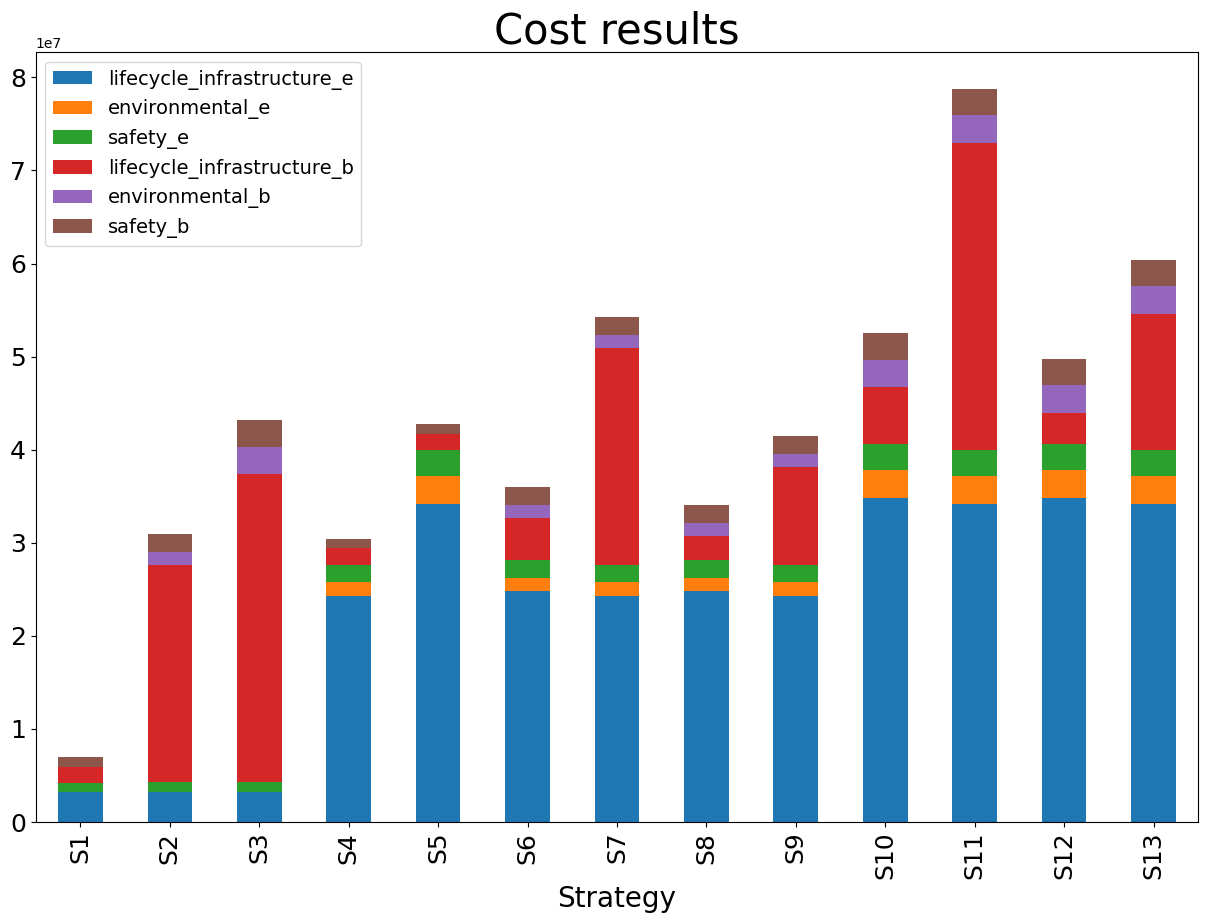

In [6]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

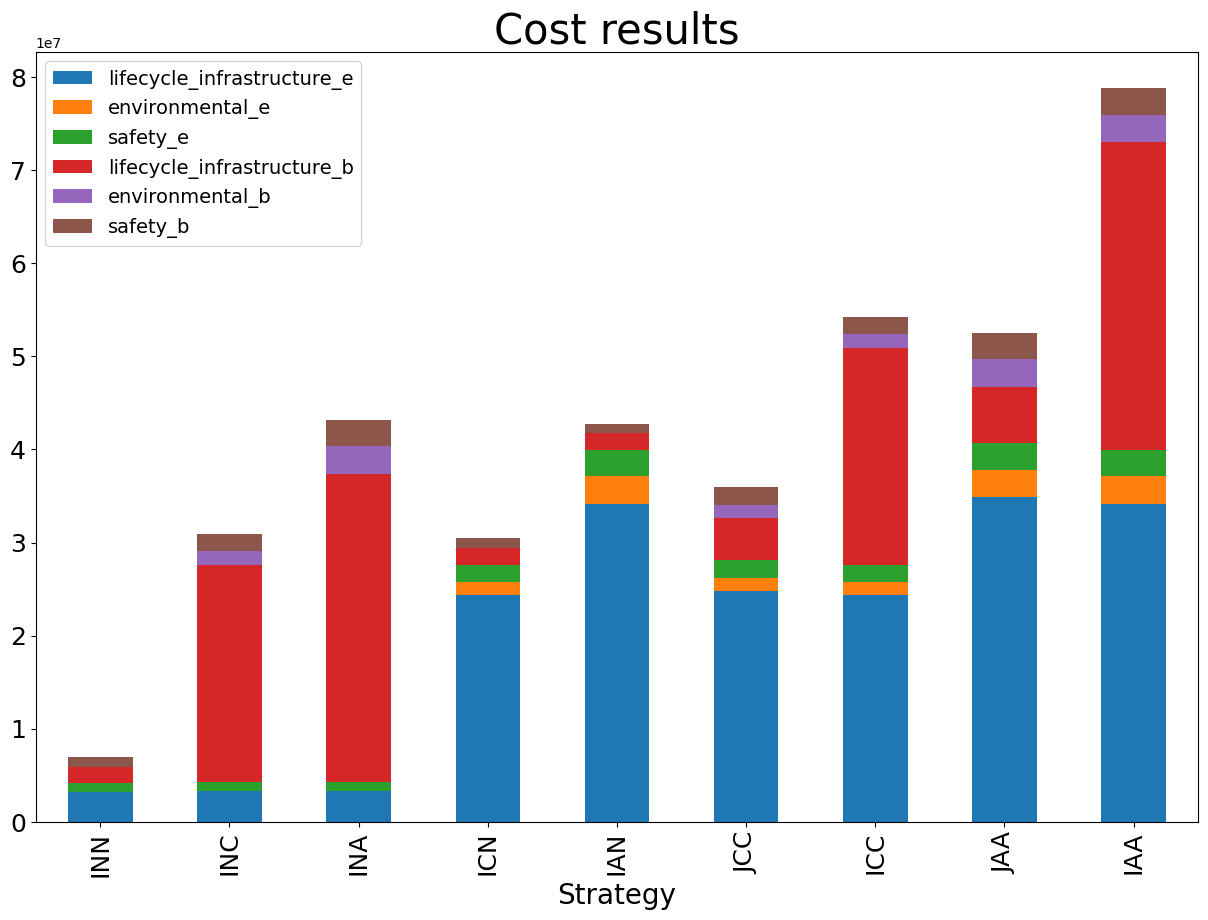

In [7]:
# Filter out the unwanted rows and rename the strategies according to the given mapping
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

df_cost_filtered =df_cost.drop(['S8', 'S9', 'S12', 'S13'])
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# plotting cost results
df_cost_filtered.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-modified.png')

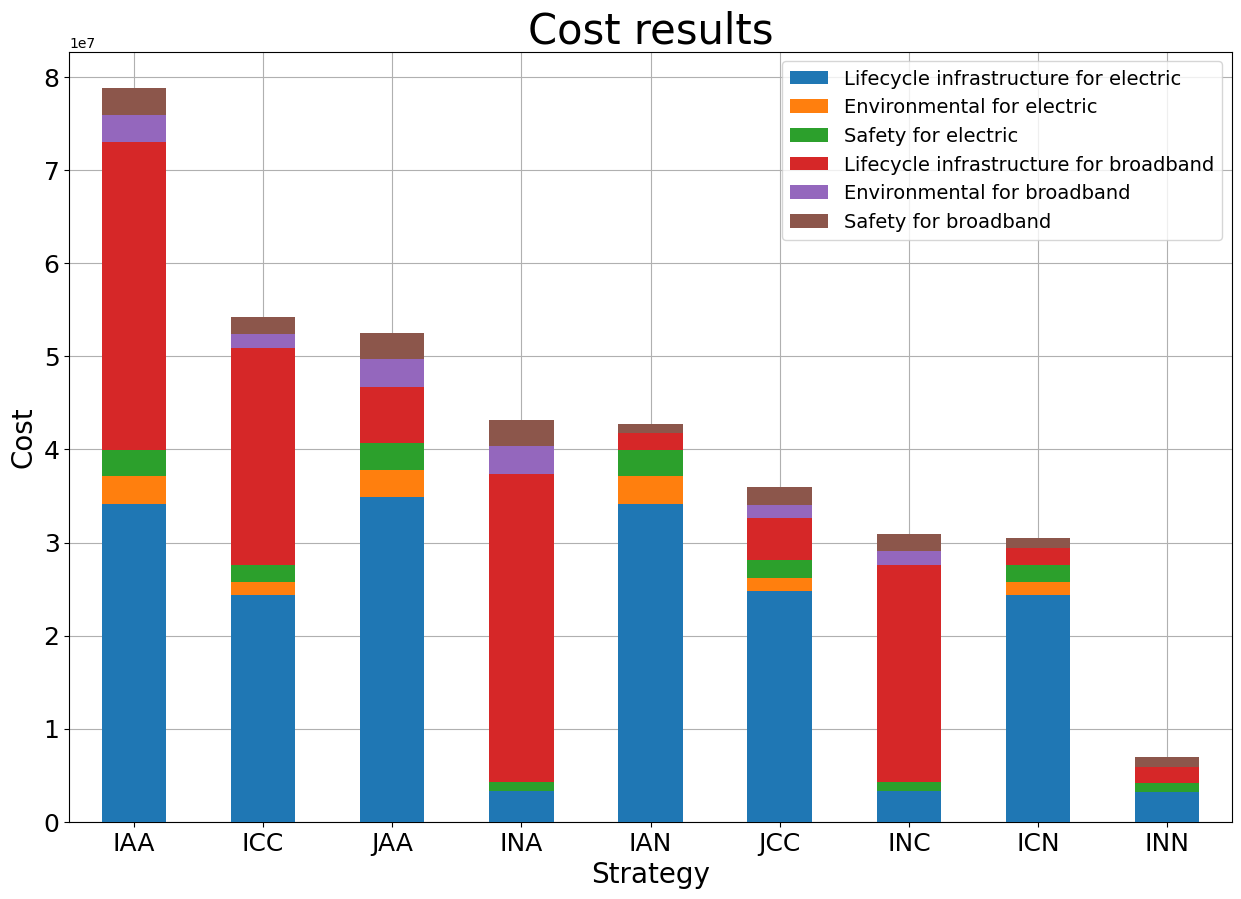

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cost is already defined and loaded with data
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_cost_filtered = df_cost.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# Sort dataframe by the sum of the rows from highest to lowest
df_cost_sorted = df_cost_filtered.sum(axis=1).sort_values(ascending=False).index
df_cost_filtered = df_cost_filtered.loc[df_cost_sorted]

# Plotting cost results
ax = df_cost_filtered.plot.bar(stacked=True, figsize=(15, 10), zorder=3)  # Set zorder to 3
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)

plt.grid(zorder=0)  # Ensure grid is behind the bars

# Update the legend
legend_labels = {
    'lifecycle_infrastructure_el': 'Lifecycle infrastructure for electric',
    'environmental_restoration_el': 'Environmental for electric',
    'safety_el': 'Safety for electric',
    'lifecycle_infrastructure_br': 'Lifecycle infrastructure for broadband',
    'environmental_restoration_br': 'Environmental for broadband',
    'safety_br': 'Safety for broadband'
}
plt.legend([legend_labels.get(label, label) for label in df_cost_filtered.columns], fontsize=14)

plt.savefig(r'../../figures/npv-cost-modified.png')
plt.show()


In [9]:
df_cost
#df_cost_filtered

lifecycle_infrastructure_el  environmental_restoration_el  \
Strategy                                                              
S1                       3.171878e+06                  0.000000e+00   
S2                       3.262527e+06                  0.000000e+00   
S3                       3.262527e+06                  0.000000e+00   
S4                       2.433064e+07                  1.422186e+06   
S5                       3.416034e+07                  2.968567e+06   
S6                       2.481681e+07                  1.422186e+06   
S7                       2.433064e+07                  1.422186e+06   
S8                       2.481681e+07                  1.422186e+06   
S9                       2.433064e+07                  1.422186e+06   
S10                      3.485867e+07                  2.968567e+06   
S11                      3.416034e+07                  2.968567e+06   
S12                      3.485867e+07                  2.968567e+06   
S13                      3.416034e+07                  2.968567e+06   

             safety_el  lifecycle_infrastructure_br  \
Strategy                                              
S1        9.792551e+05                 1.766953e+06   
S2        1.048641e+06                 2.330422e+07   
S3        1.048641e+06                 3.304793e+07   
S4        1.881130e+06                 1.766953e+06   
S5        2.822655e+06                 1.766953e+06   
S6        1.881130e+06                 4.520485e+06   
S7        1.881130e+06                 2.330422e+07   
S8        1.881130e+06                 2.602966e+06   
S9        1.881130e+06                 1.052076e+07   
S10       2.822655e+06                 6.067214e+06   
S11       2.822655e+06                 3.304793e+07   
S12       2.822655e+06                 3.306052e+06   
S13       2.822655e+06                 1.464019e+07   

          environmental_restoration_br     safety_br  
Strategy                                              
S1                        0.000000e+00  1.048641e+06  
S2                        1.422186e+06  1.881130e+06  
S3                        2.968567e+06  2.822655e+06  
S4                        0.000000e+00  1.048641e+06  
S5                        0.000000e+00  1.048641e+06  
S6                        1.422186e+06  1.881130e+06  
S7                        1.422186e+06  1.881130e+06  
S8                        1.422186e+06  1.881130e+06  
S9                        1.422186e+06  1.881130e+06  
S10                       2.968567e+06  2.822655e+06  
S11                       2.968567e+06  2.822655e+06  
S12                       2.968567e+06  2.822655e+06  
S13                       2.968567e+06  2.822655e+06

In [10]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

Strategy  aesthetic_benefit_el  economic_losses_el  aesthetic_benefit_br  \
0       S1              0.000000        8.133545e+07              0.000000   
1       S2              0.000000        8.168675e+07         428482.444257   
2       S3              0.000000        8.168675e+07         766942.445996   
3       S4         428482.444257        6.398580e+07              0.000000   
4       S5         766942.445996        4.436978e+07              0.000000   
5       S6         428482.444257        6.398580e+07         428482.444257   
6      S10         766942.445996        4.436978e+07         766942.445996   

   economic_loss_br  
0      3.819645e+07  
1      3.054514e+07  
2      2.118097e+07  
3      3.899511e+07  
4      3.899511e+07  
5      3.054514e+07  
6      2.118097e+07

In [11]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [12]:
df_loss_benefit

aesthetic_benefit_el  economic_losses_el  aesthetic_benefit_br  \
Strategy                                                                   
S1                    0.000000        8.133545e+07              0.000000   
S2                    0.000000        8.168675e+07         428482.444257   
S3                    0.000000        8.168675e+07         766942.445996   
S4               428482.444257        6.398580e+07              0.000000   
S5               766942.445996        4.436978e+07              0.000000   
S6               428482.444257        6.398580e+07         428482.444257   
S10              766942.445996        4.436978e+07         766942.445996   

          economic_loss_br  
Strategy                    
S1            3.819645e+07  
S2            3.054514e+07  
S3            2.118097e+07  
S4            3.899511e+07  
S5            3.899511e+07  
S6            3.054514e+07  
S10           2.118097e+07

In [13]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [14]:
df_loss

economic_losses_el  economic_loss_br
Strategy                                      
S1              8.133545e+07      3.819645e+07
S2              8.168675e+07      3.054514e+07
S3              8.168675e+07      2.118097e+07
S4              6.398580e+07      3.899511e+07
S5              4.436978e+07      3.899511e+07
S6              6.398580e+07      3.054514e+07
S10             4.436978e+07      2.118097e+07

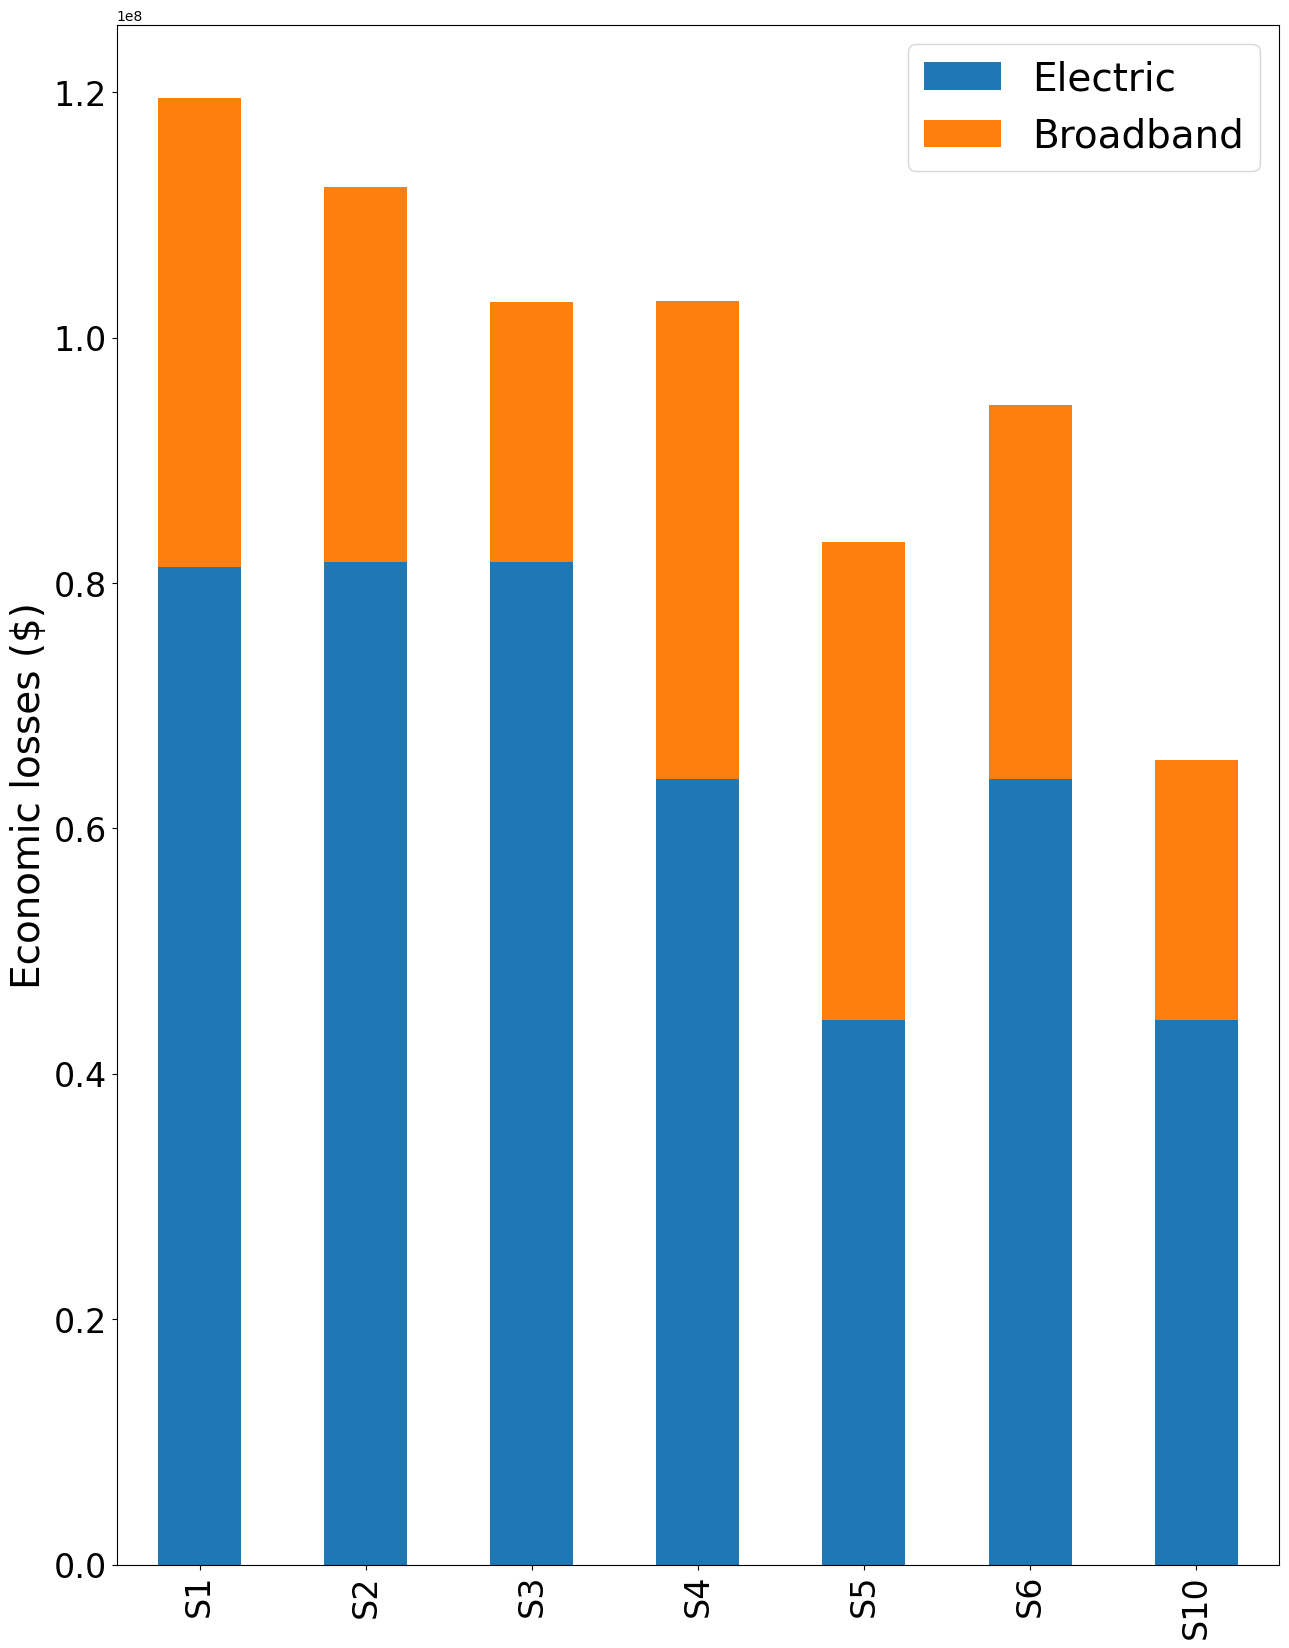

In [15]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_loss is already defined and loaded with data

# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_loss_filtered = df_loss.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_loss_filtered = df_loss_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_loss_filtered.loc['IAA'] = df_loss_filtered.loc['JAA']
df_loss_filtered.loc['ICC'] = df_loss_filtered.loc['JCC']

# Calculate avoided economic losses based on 'INN' strategy
inn_el = df_loss_filtered.loc['INN', 'economic_losses_el']
inn_br = df_loss_filtered.loc['INN', 'economic_loss_br']

df_loss_filtered['avoided_economic_losses_el'] = inn_el-df_loss_filtered['economic_losses_el'] 
df_loss_filtered['avoided_economic_loss_br'] = inn_br - df_loss_filtered['economic_loss_br']

df_loss_filtered

economic_losses_el  economic_loss_br  avoided_economic_losses_el  \
Strategy                                                                     
INN             8.133545e+07      3.819645e+07                0.000000e+00   
INC             8.168675e+07      3.054514e+07               -3.512974e+05   
INA             8.168675e+07      2.118097e+07               -3.512974e+05   
ICN             6.398580e+07      3.899511e+07                1.734965e+07   
IAN             4.436978e+07      3.899511e+07                3.696567e+07   
JCC             6.398580e+07      3.054514e+07                1.734965e+07   
JAA             4.436978e+07      2.118097e+07                3.696567e+07   
IAA             4.436978e+07      2.118097e+07                3.696567e+07   
ICC             6.398580e+07      3.054514e+07                1.734965e+07   

          avoided_economic_loss_br  
Strategy                            
INN                   0.000000e+00  
INC                   7.651304e+06  
INA                   1.701548e+07  
ICN                  -7.986659e+05  
IAN                  -7.986659e+05  
JCC                   7.651304e+06  
JAA                   1.701548e+07  
IAA                   1.701548e+07  
ICC                   7.651304e+06

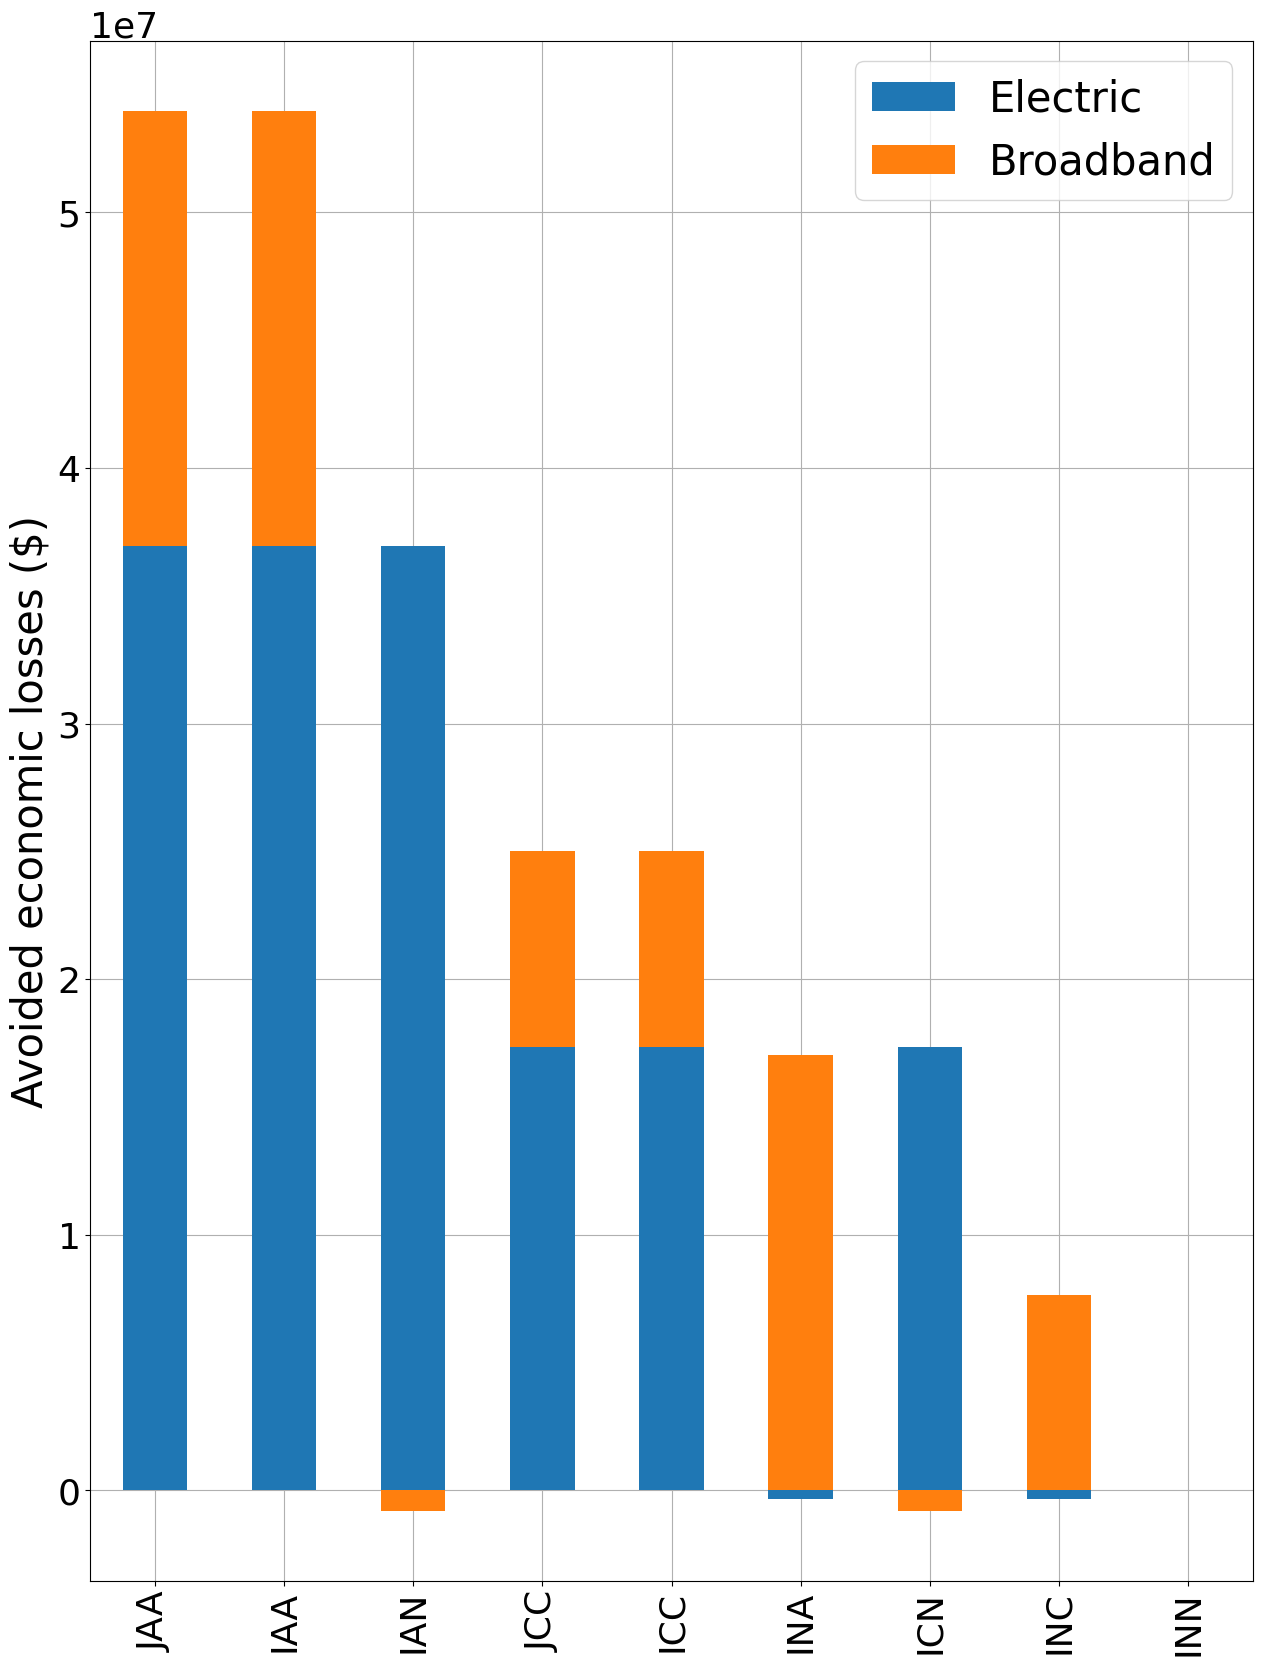

In [17]:
import matplotlib.pyplot as plt

# Plotting first loss results
fig1, ax1 = plt.subplots()
df_loss.plot.bar(stacked=True, ax=ax1)
fig1.set_size_inches(15, 20)
ax1.set_xlabel('', fontsize=28)
ax1.set_ylabel('Economic losses ($)', fontsize=28)
ax1.legend(['Electric', 'Broadband'], fontsize=28)
ax1.grid(True)
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)
plt.close(fig1)  # Close the figure to free memory

# Preparing data for the second plot
df_loss_filtered = df_loss_filtered.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_loss_sorted = df_loss_filtered.sum(axis=1).sort_values(ascending=False).index
df_loss_filtered = df_loss_filtered.loc[df_loss_sorted]

# Plotting second loss results
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.bar(stacked=True, ax=ax2, zorder=3)
fig2.set_size_inches(15, 20)
ax2.set_xlabel('', fontsize=30)
ax2.set_ylabel('Avoided economic losses ($)', fontsize=30)
ax2.tick_params(axis='x', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300)
plt.show()


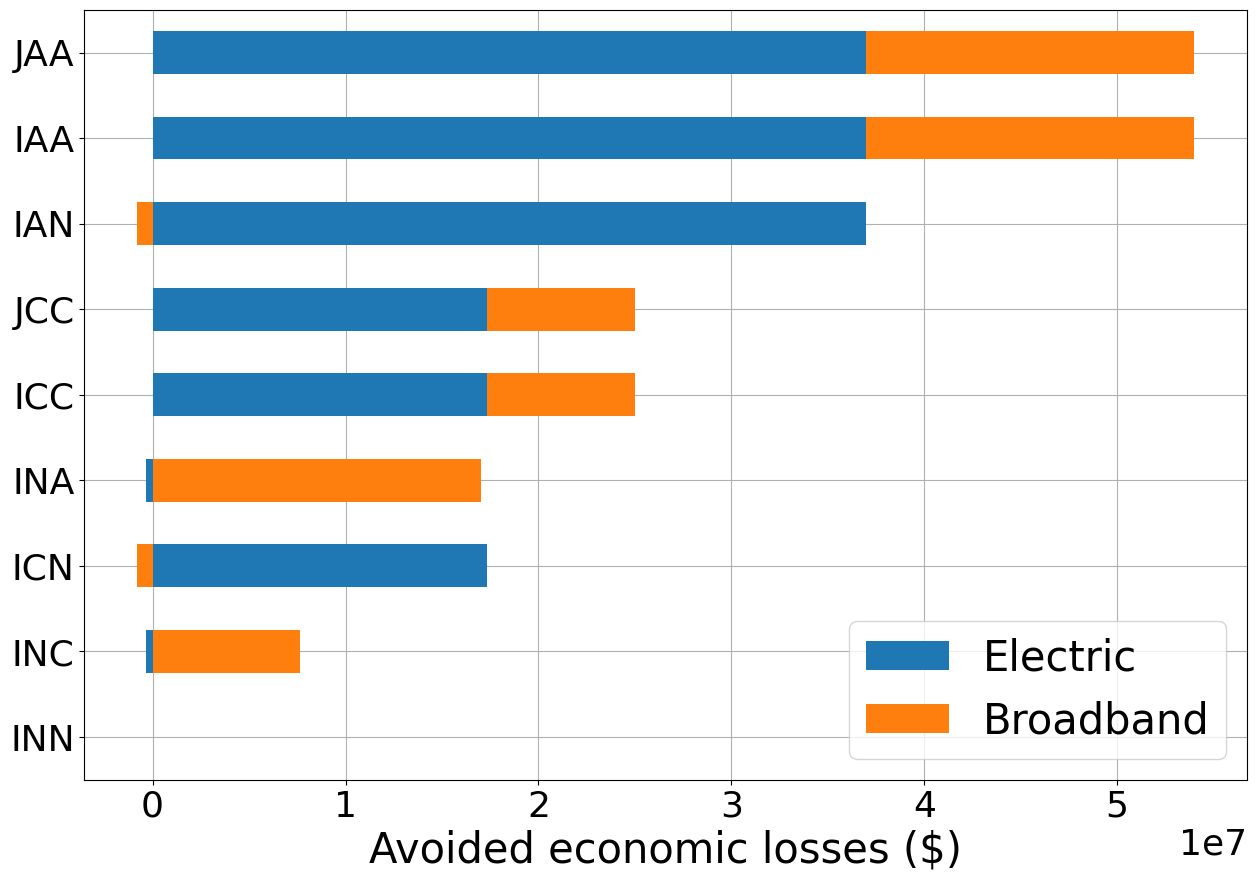

In [18]:
# Reverse the order of the DataFrame after sorting and before plotting
df_loss_filtered = df_loss_filtered.iloc[::-1]

# Plotting second loss results with horizontal bars and reversed order
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.barh(stacked=True, ax=ax2, zorder=3)  # Use barh for horizontal bars
fig2.set_size_inches(15, 10)  # Adjust dimensions for horizontal layout
ax2.set_ylabel('', fontsize=30)  # Y-axis now has categories, no label needed
ax2.set_xlabel('Avoided economic losses ($)', fontsize=30)  # X-axis for values
ax2.tick_params(axis='y', labelsize=26)  # Adjust y-tick labels for categories
ax2.tick_params(axis='x', labelsize=26)  # Adjust x-tick labels for values
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.xaxis.offsetText.set_fontsize(26)  # Adjust font size for x-axis offset text

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300, bbox_inches='tight')
plt.show()


In [19]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_benefit

aesthetic_benefit_el  aesthetic_benefit_br
Strategy                                            
S1                    0.000000              0.000000
S2                    0.000000         428482.444257
S3                    0.000000         766942.445996
S4               428482.444257              0.000000
S5               766942.445996              0.000000
S6               428482.444257         428482.444257
S10              766942.445996         766942.445996

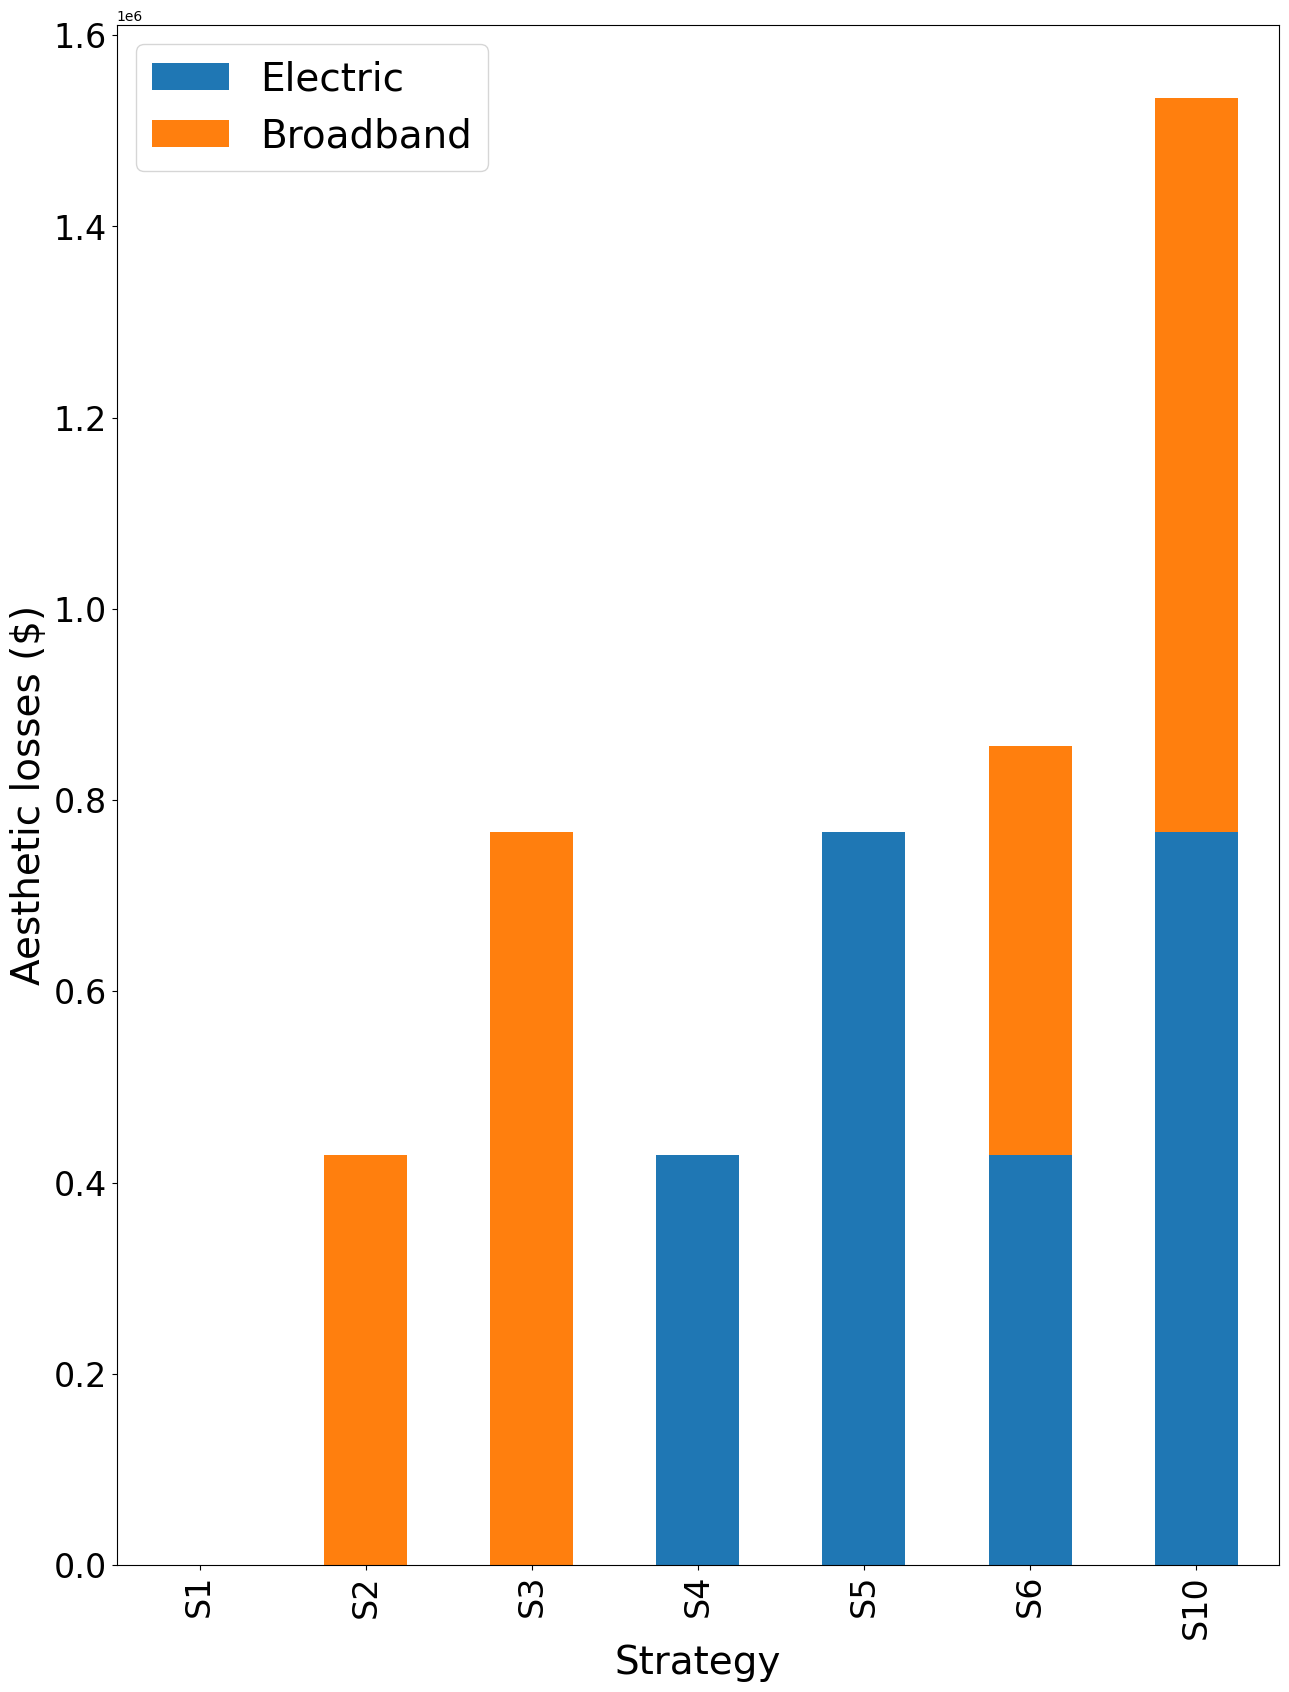

In [20]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [21]:
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_benefit_filtered = df_benefit.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_benefit_filtered = df_benefit_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_benefit_filtered.loc['IAA'] = df_benefit_filtered.loc['JAA']
df_benefit_filtered.loc['ICC'] = df_benefit_filtered.loc['JCC']

# Calculate avoided benefits based on 'INN' strategy
inn_el = df_benefit_filtered.loc['INN', 'aesthetic_benefit_el']
inn_br = df_benefit_filtered.loc['INN', 'aesthetic_benefit_br']

df_benefit_filtered

aesthetic_benefit_el  aesthetic_benefit_br
Strategy                                            
INN                   0.000000              0.000000
INC                   0.000000         428482.444257
INA                   0.000000         766942.445996
ICN              428482.444257              0.000000
IAN              766942.445996              0.000000
JCC              428482.444257         428482.444257
JAA              766942.445996         766942.445996
IAA              766942.445996         766942.445996
ICC              428482.444257         428482.444257

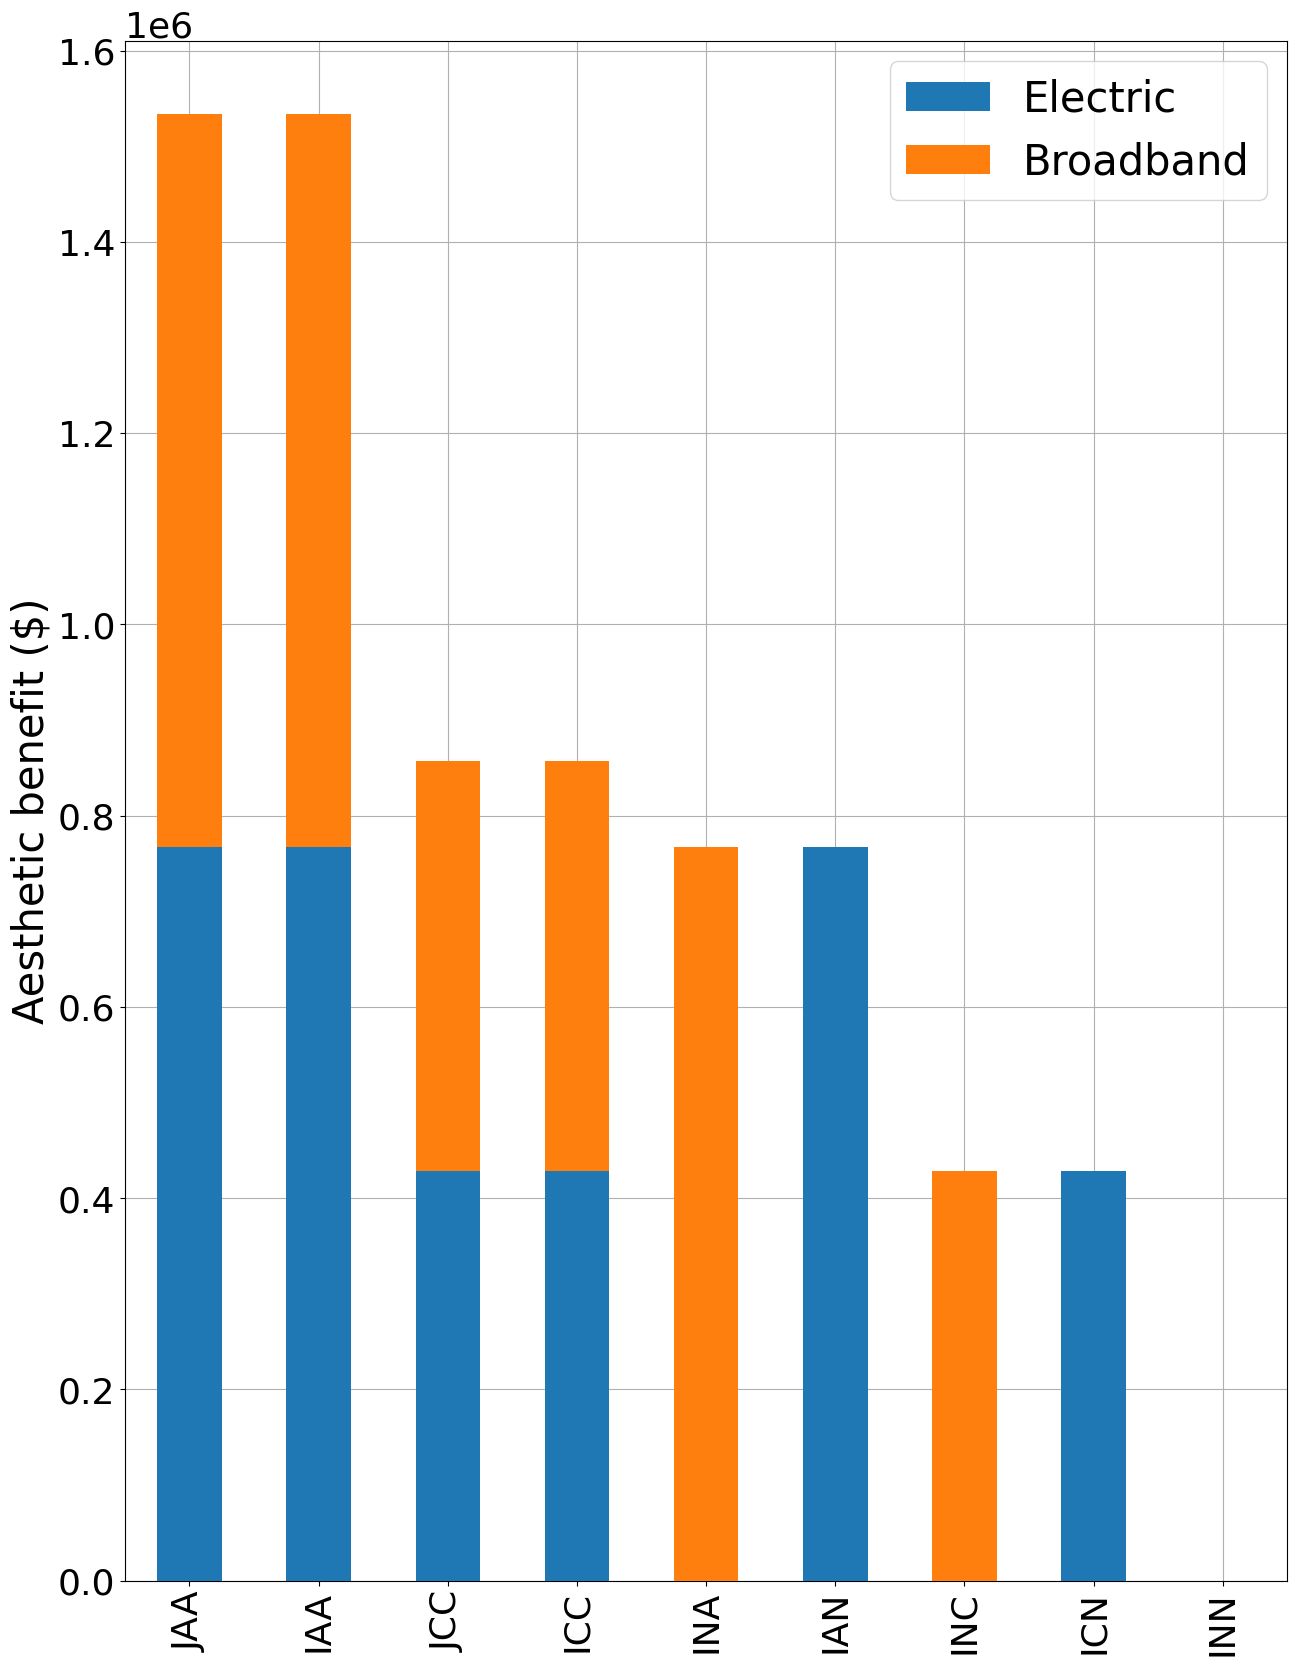

In [22]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in descending order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=False)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data
ax = df_benefit_sorted.plot.bar(stacked=True, zorder=3)
fig = plt.gcf()
fig.set_size_inches(15, 20)

plt.grid()
plt.xlabel('', fontsize=30)
plt.ylabel('Aesthetic benefit ($)', fontsize=30)
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='upper right')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)

plt.show()


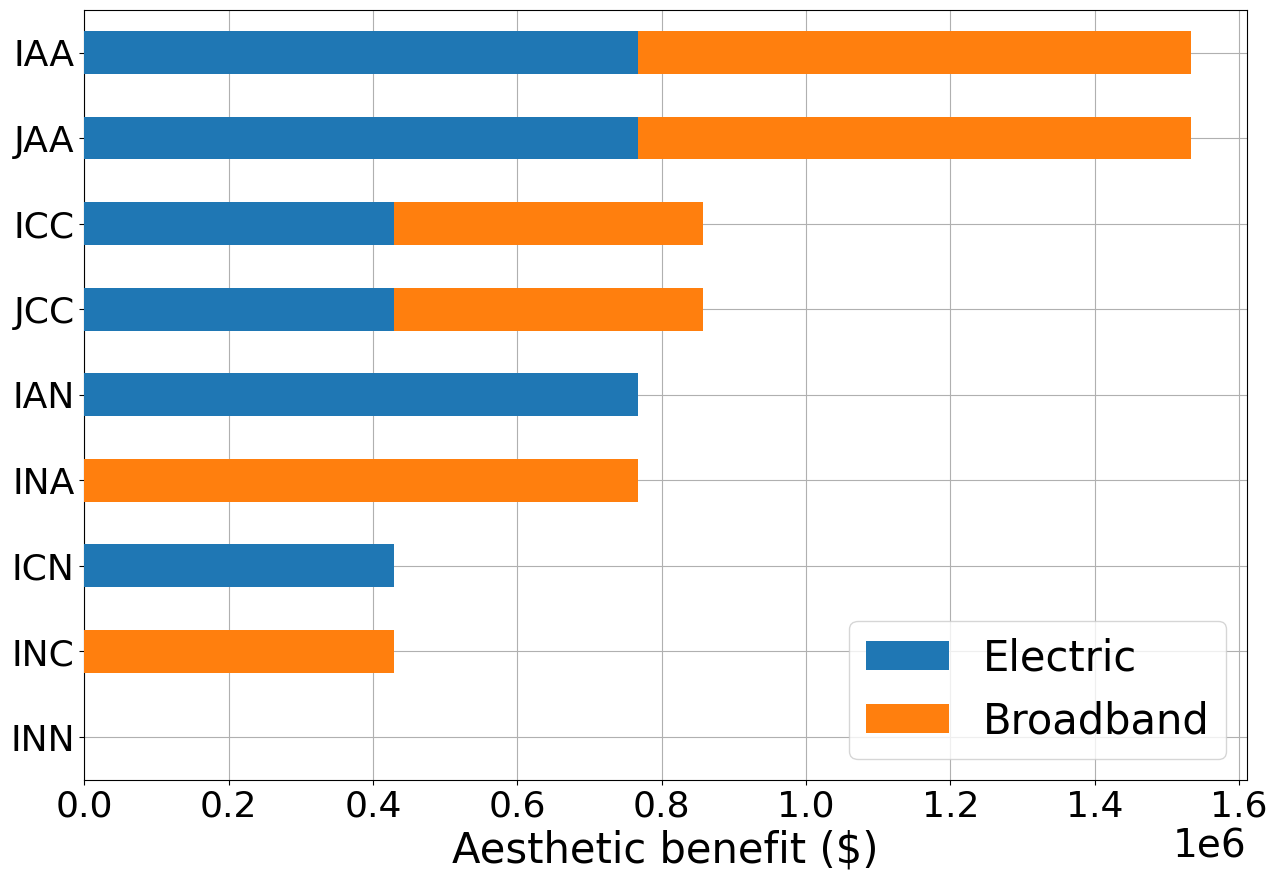

In [23]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in ascending order to reverse the bar order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=True)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data with horizontal bars
ax = df_benefit_sorted.plot.barh(stacked=True, zorder=3)  # Use barh here for horizontal bars
fig = plt.gcf()
fig.set_size_inches(15, 10)  # You might want to adjust this size if the layout looks cramped

plt.grid()
plt.ylabel('', fontsize=30)  # This is now the y-axis label
plt.xlabel('Aesthetic benefit ($)', fontsize=30)  # This is now the x-axis label
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='lower right')
plt.yticks(fontsize=26)  # This now controls the category labels
plt.xticks(fontsize=26)  # This now controls the value labels
ax.xaxis.offsetText.set_fontsize(28)  # Adjust the fontsize of the offset text on the x-axis

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300, bbox_inches='tight')

plt.show()


In [24]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [25]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_new.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

Strategy  lifecycle_infrastructure  environmental_restoration       safety  \
0      INN              4.938831e+06                      0.000  2027896.426   
1      INC              2.656675e+07                1422186.244  2929771.670   
2      INA              3.631046e+07                2968567.363  3871296.702   
3      ICN              2.609760e+07                1422186.244  2929771.670   
4      IAN              3.592729e+07                2968567.363  3871296.702   
5      JCC              2.933730e+07                2844372.488  3762260.620   
6      ICC              4.763486e+07                2844372.488  3762260.620   
7      JAA              4.092588e+07                5937134.726  5645310.683   
8      IAA              6.720827e+07                5937134.726  5645310.683   

     total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0  6.966728e+06       0.000000e+00             0.000000e+00 -6.966728e+06  
1  3.091871e+07       4.284824e+05             7.300006e+06 -2.319022e+07  
2  4.315032e+07       7.669424e+05             1.666418e+07 -2.571920e+07  
3  3.044955e+07       4.284824e+05             1.655099e+07 -1.347009e+07  
4  4.276716e+07       7.669424e+05             3.616700e+07 -5.833213e+06  
5  3.594393e+07       8.569649e+05             2.500096e+07 -1.008601e+07  
6  5.424150e+07       8.569649e+05             2.500096e+07 -2.838358e+07  
7  5.250832e+07       1.533885e+06             5.398114e+07  3.006705e+06  
8  7.879072e+07       1.533885e+06             5.398114e+07 -2.327569e+07

In [26]:
df_npv_cost_loss_benefit

Strategy  lifecycle_infrastructure  environmental_restoration       safety  \
0      INN              4.938831e+06                      0.000  2027896.426   
1      INC              2.656675e+07                1422186.244  2929771.670   
2      INA              3.631046e+07                2968567.363  3871296.702   
3      ICN              2.609760e+07                1422186.244  2929771.670   
4      IAN              3.592729e+07                2968567.363  3871296.702   
5      JCC              2.933730e+07                2844372.488  3762260.620   
6      ICC              4.763486e+07                2844372.488  3762260.620   
7      JAA              4.092588e+07                5937134.726  5645310.683   
8      IAA              6.720827e+07                5937134.726  5645310.683   

     total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0  6.966728e+06       0.000000e+00             0.000000e+00 -6.966728e+06  
1  3.091871e+07       4.284824e+05             7.300006e+06 -2.319022e+07  
2  4.315032e+07       7.669424e+05             1.666418e+07 -2.571920e+07  
3  3.044955e+07       4.284824e+05             1.655099e+07 -1.347009e+07  
4  4.276716e+07       7.669424e+05             3.616700e+07 -5.833213e+06  
5  3.594393e+07       8.569649e+05             2.500096e+07 -1.008601e+07  
6  5.424150e+07       8.569649e+05             2.500096e+07 -2.838358e+07  
7  5.250832e+07       1.533885e+06             5.398114e+07  3.006705e+06  
8  7.879072e+07       1.533885e+06             5.398114e+07 -2.327569e+07

In [27]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [28]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [29]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [30]:
df_npv_net_benefit_new

Strategy             INN          INC          INA          ICN         IAN  \
net_benefit -6966727.751 -23190216.66 -25719200.26 -13470086.22 -5833212.94   

Strategy             JCC          ICC          JAA          IAA  
net_benefit -10086008.71 -28383576.85  3006704.836 -23275687.16

In [31]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [32]:
df_npv_net_benefit_new

Strategy             INN          INC          INA          ICN         IAN  \
net_benefit -6966727.751 -23190216.66 -25719200.26 -13470086.22 -5833212.94   

Strategy             JCC          ICC          JAA          IAA  
net_benefit -10086008.71 -28383576.85  3006704.836 -23275687.16

In [33]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [34]:
df_npv_net_benefit

Strategy   net_benefit
0      INN -6.966728e+06
1      INC -2.319022e+07
2      INA -2.571920e+07
3      ICN -1.347009e+07
4      IAN -5.833213e+06
5      JCC -1.008601e+07
6      ICC -2.838358e+07
7      JAA  3.006705e+06
8      IAA -2.327569e+07

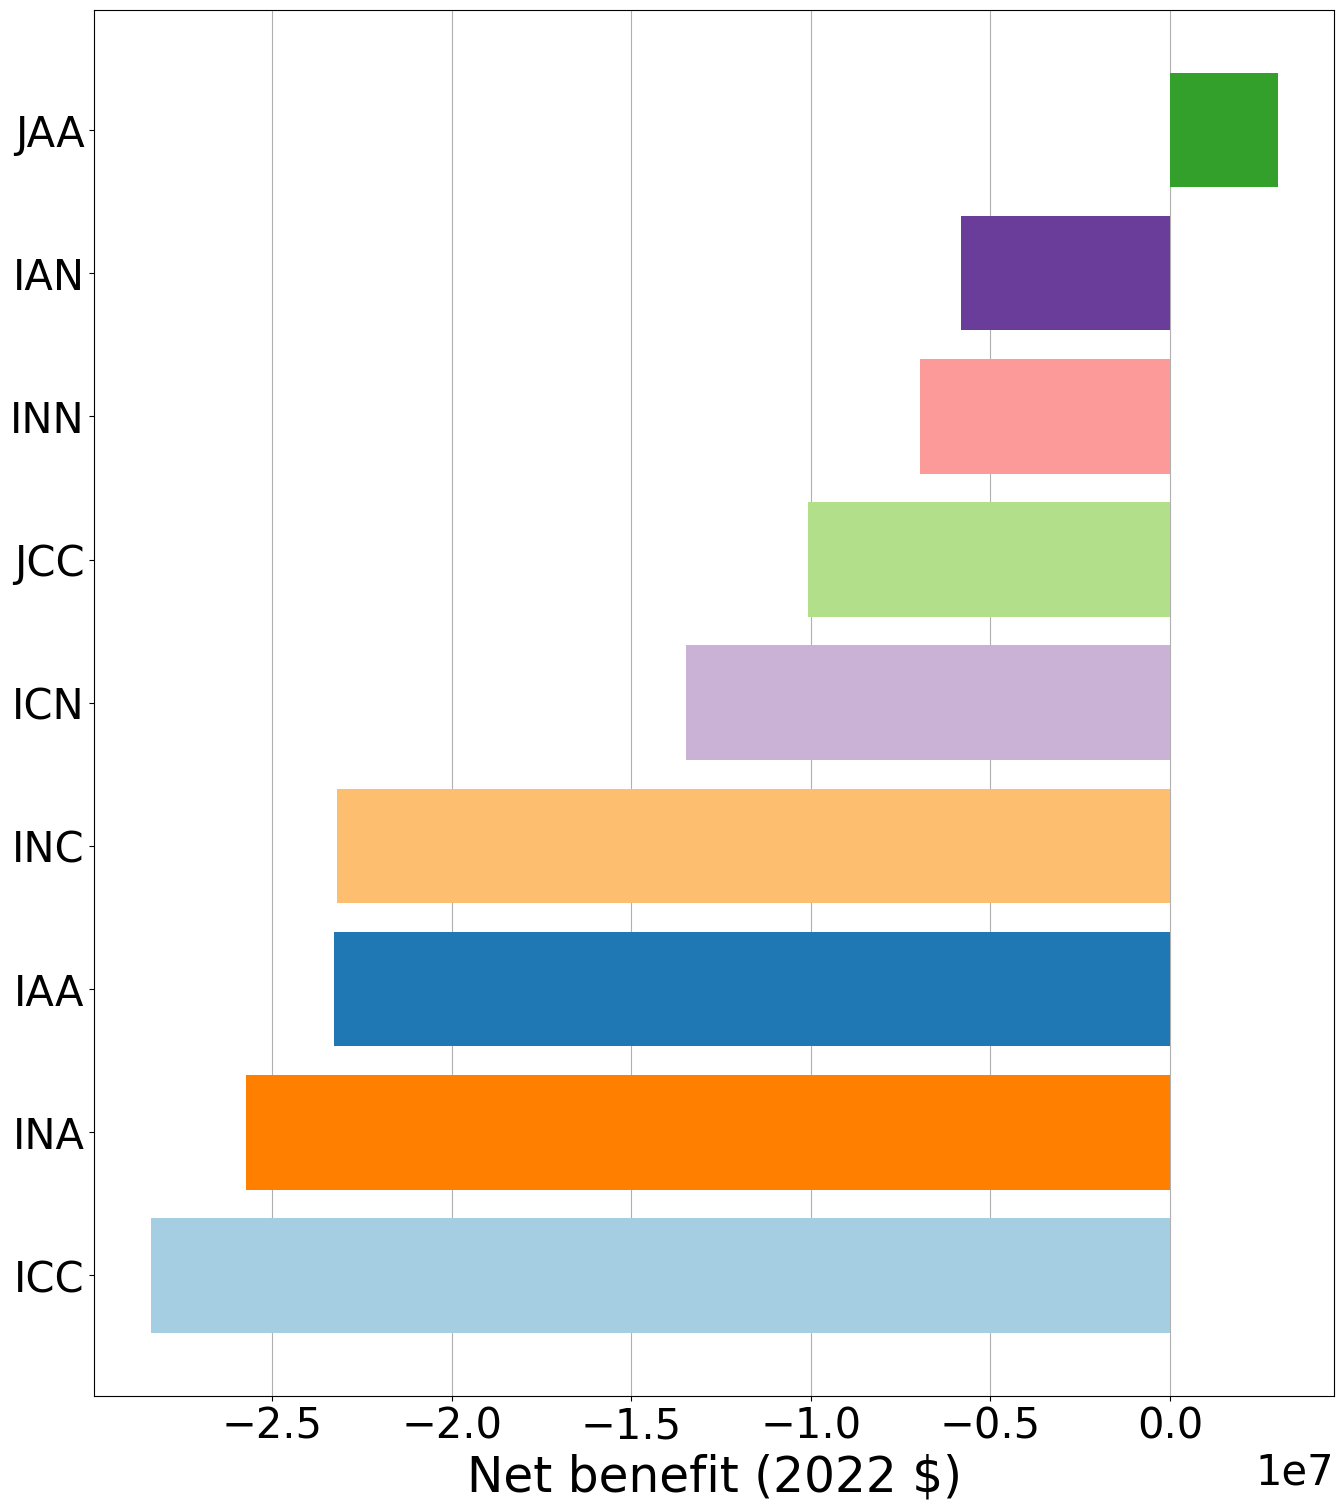

In [35]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_sorted = df_npv_net_benefit.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_sorted)), labels=df_npv_net_benefit_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

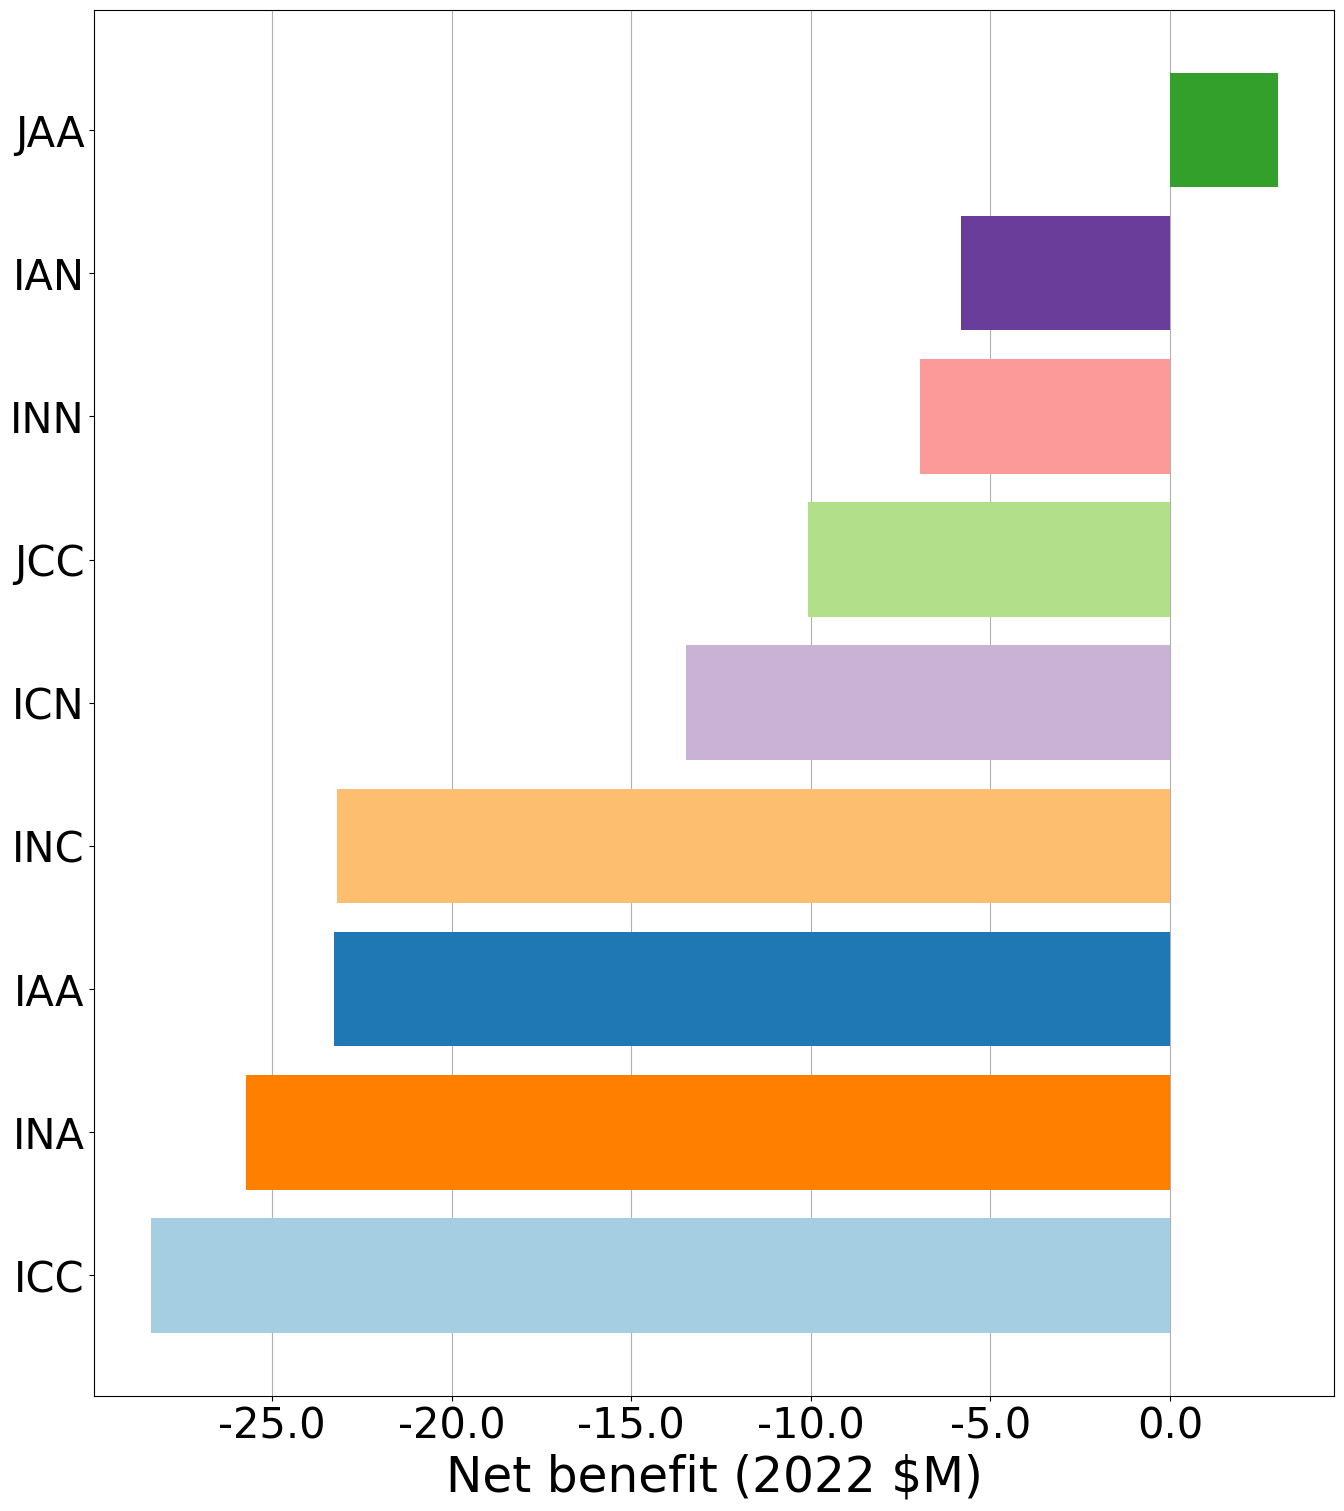

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_npv_net_benefit is already defined and contains the necessary data
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_sorted = df_npv_net_benefit.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Net benefit (2022 $M)', fontsize=35)
plt.yticks(range(len(df_npv_net_benefit_sorted)), labels=df_npv_net_benefit_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()


In [37]:
df_npv_net_benefit

net_benefit
Strategy              
INN      -6.966728e+06
INC      -2.319022e+07
INA      -2.571920e+07
ICN      -1.347009e+07
IAN      -5.833213e+06
JCC      -1.008601e+07
ICC      -2.838358e+07
JAA       3.006705e+06
IAA      -2.327569e+07

In [38]:
# plotting graph (new version)
#ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
#plt.show()

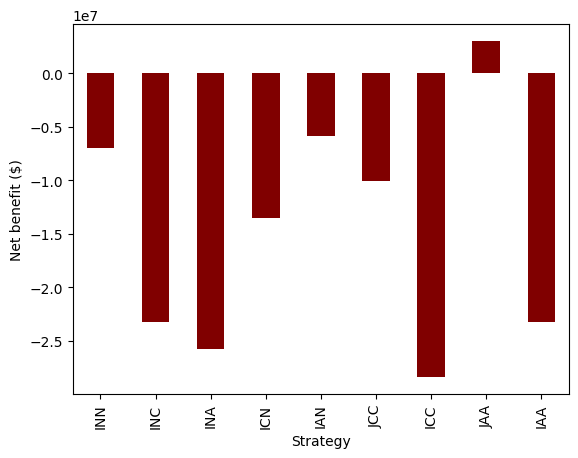

In [39]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

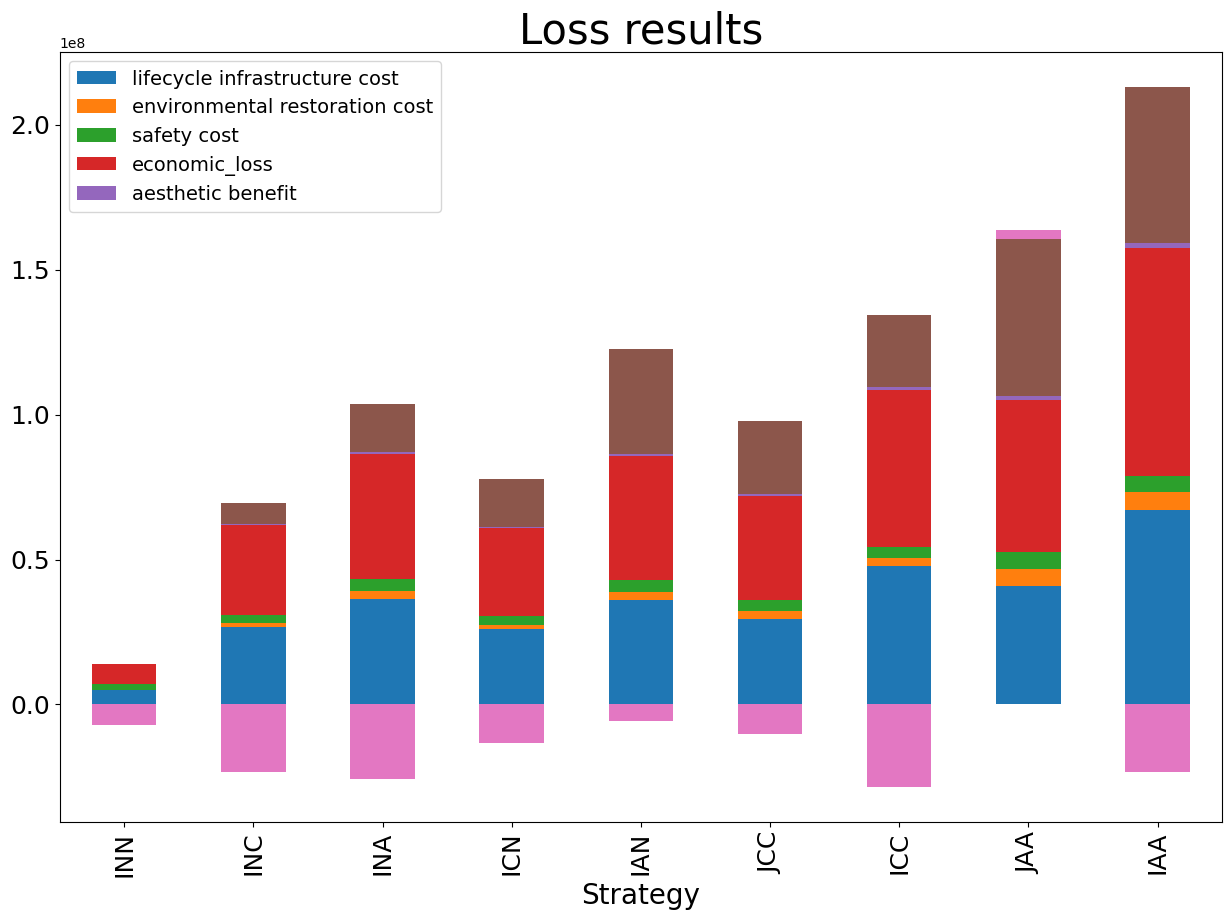

In [40]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [41]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                   4.938831e+06                      0.000  2027896.426   
INC                   2.656675e+07                1422186.244  2929771.670   
INA                   3.631046e+07                2968567.363  3871296.702   
ICN                   2.609760e+07                1422186.244  2929771.670   
IAN                   3.592729e+07                2968567.363  3871296.702   
JCC                   2.933730e+07                2844372.488  3762260.620   
ICC                   4.763486e+07                2844372.488  3762260.620   
JAA                   4.092588e+07                5937134.726  5645310.683   
IAA                   6.720827e+07                5937134.726  5645310.683   

            total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                             
INN       6.966728e+06       0.000000e+00             0.000000e+00   
INC       3.091871e+07       4.284824e+05             7.300006e+06   
INA       4.315032e+07       7.669424e+05             1.666418e+07   
ICN       3.044955e+07       4.284824e+05             1.655099e+07   
IAN       4.276716e+07       7.669424e+05             3.616700e+07   
JCC       3.594393e+07       8.569649e+05             2.500096e+07   
ICC       5.424150e+07       8.569649e+05             2.500096e+07   
JAA       5.250832e+07       1.533885e+06             5.398114e+07   
IAA       7.879072e+07       1.533885e+06             5.398114e+07   

           net_benefit  
Strategy                
INN      -6.966728e+06  
INC      -2.319022e+07  
INA      -2.571920e+07  
ICN      -1.347009e+07  
IAN      -5.833213e+06  
JCC      -1.008601e+07  
ICC      -2.838358e+07  
JAA       3.006705e+06  
IAA      -2.327569e+07

In [42]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [43]:
df_npv_cost

lifecycle_infrastructure  environmental_restoration       safety
Strategy                                                                  
INN                   4.938831e+06                      0.000  2027896.426
INC                   2.656675e+07                1422186.244  2929771.670
INA                   3.631046e+07                2968567.363  3871296.702
ICN                   2.609760e+07                1422186.244  2929771.670
IAN                   3.592729e+07                2968567.363  3871296.702
JCC                   2.933730e+07                2844372.488  3762260.620
ICC                   4.763486e+07                2844372.488  3762260.620
JAA                   4.092588e+07                5937134.726  5645310.683
IAA                   6.720827e+07                5937134.726  5645310.683

In [44]:
df_npv_cost=df_npv_cost.reset_index()

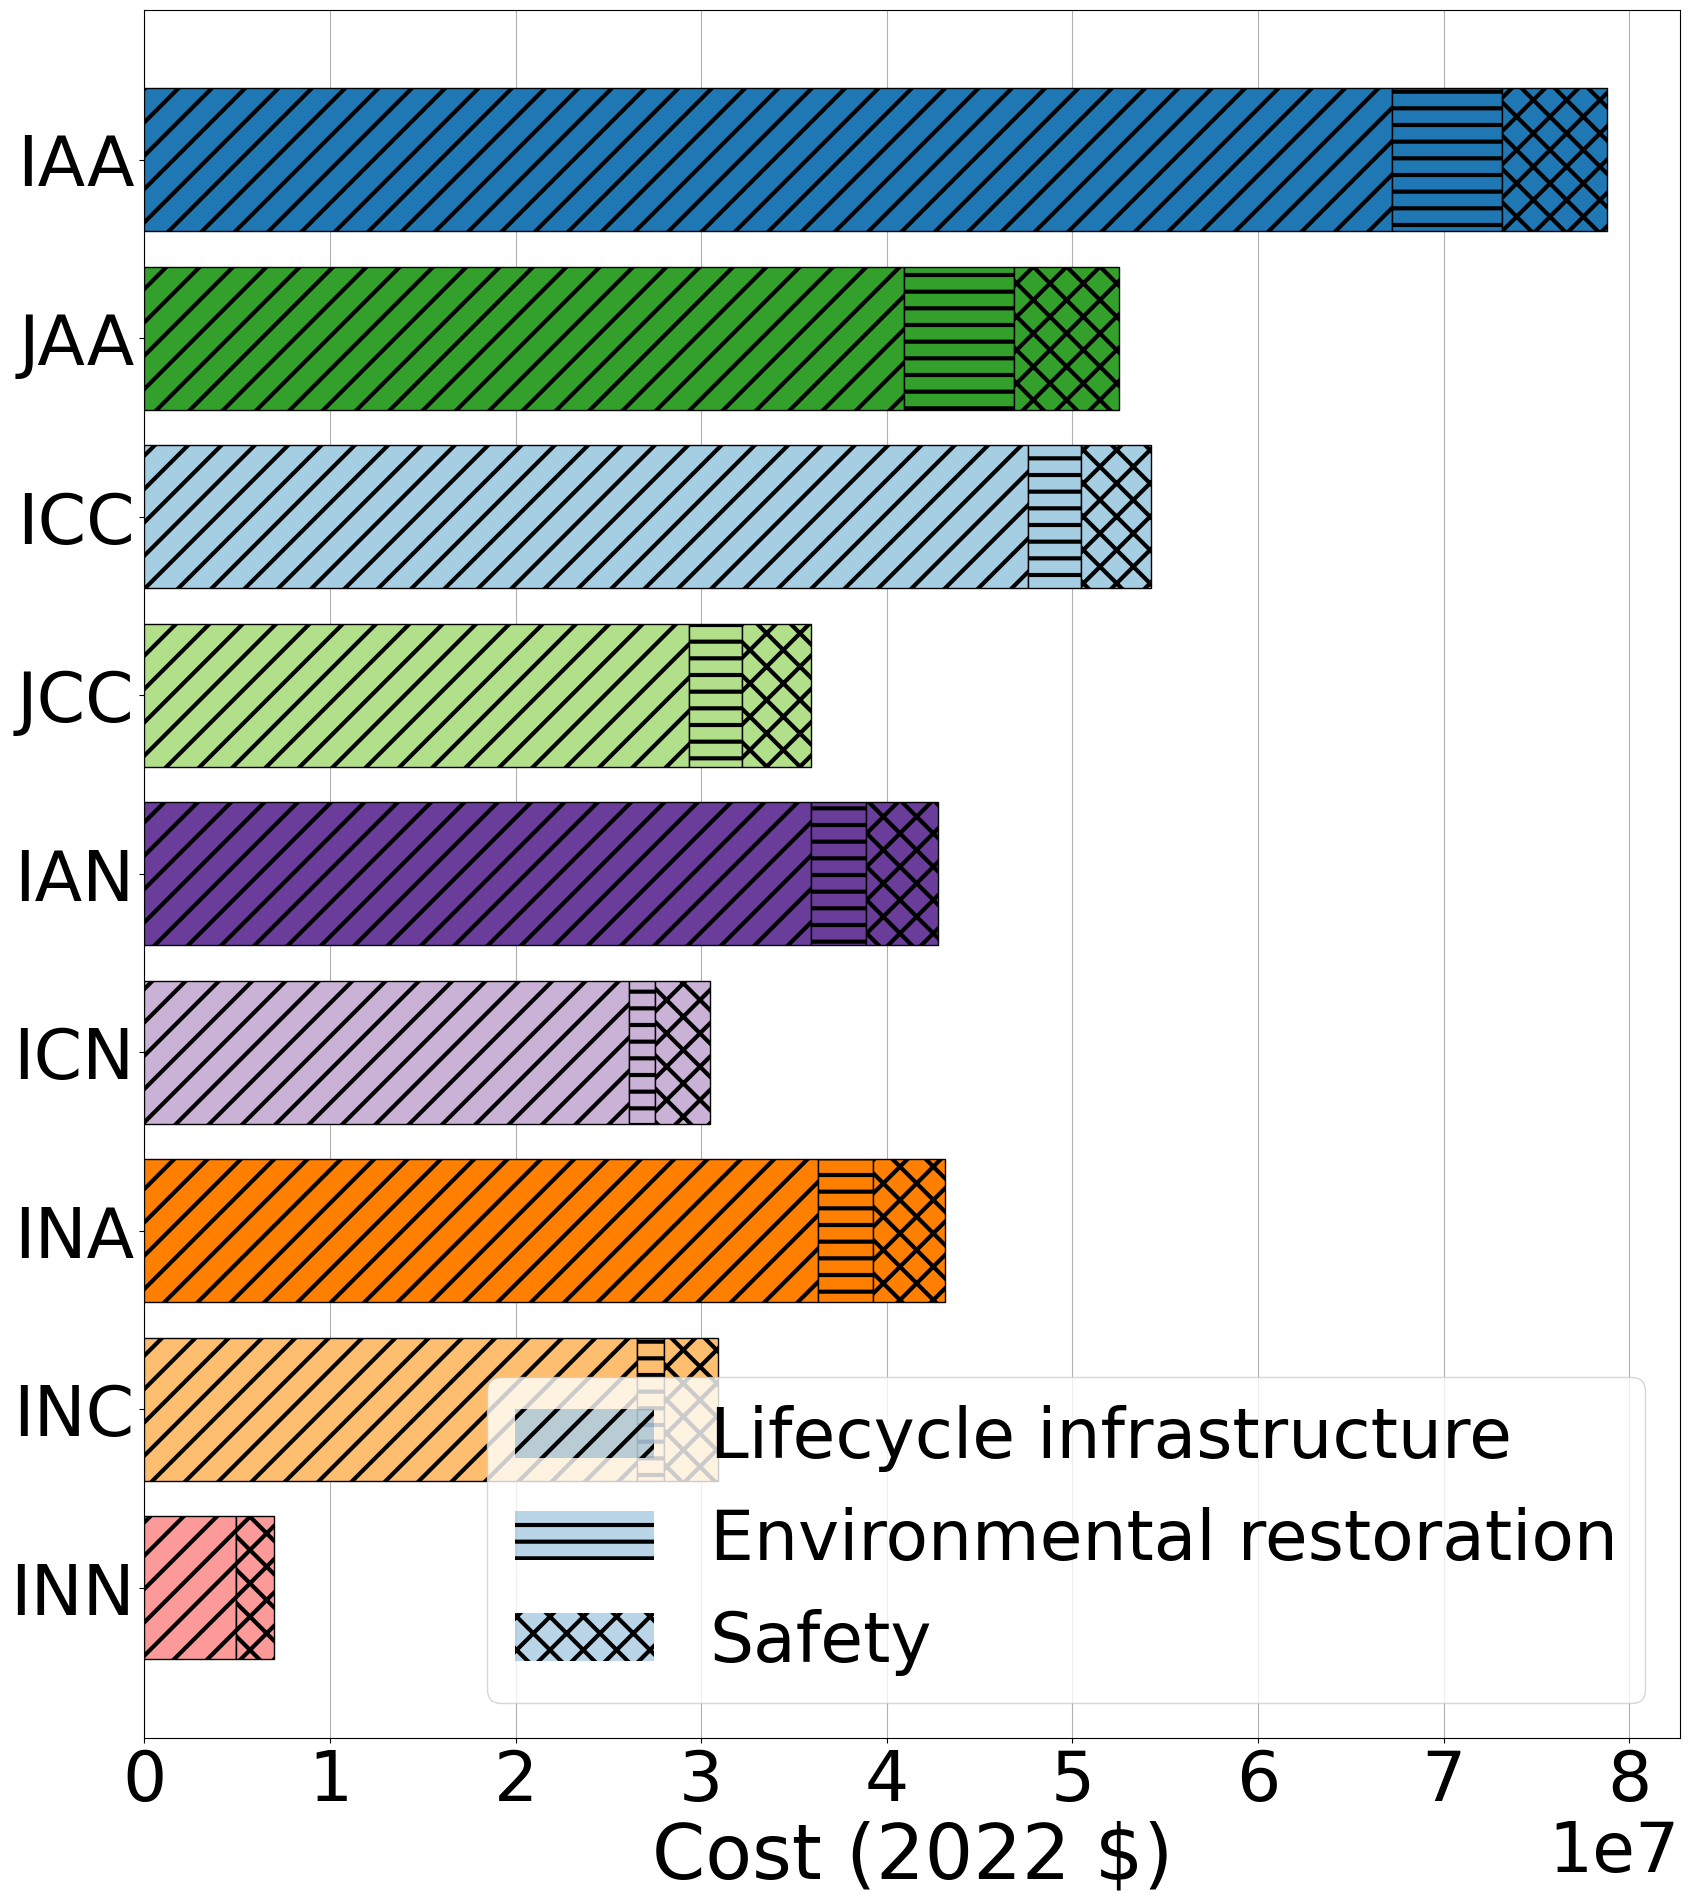

In [45]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

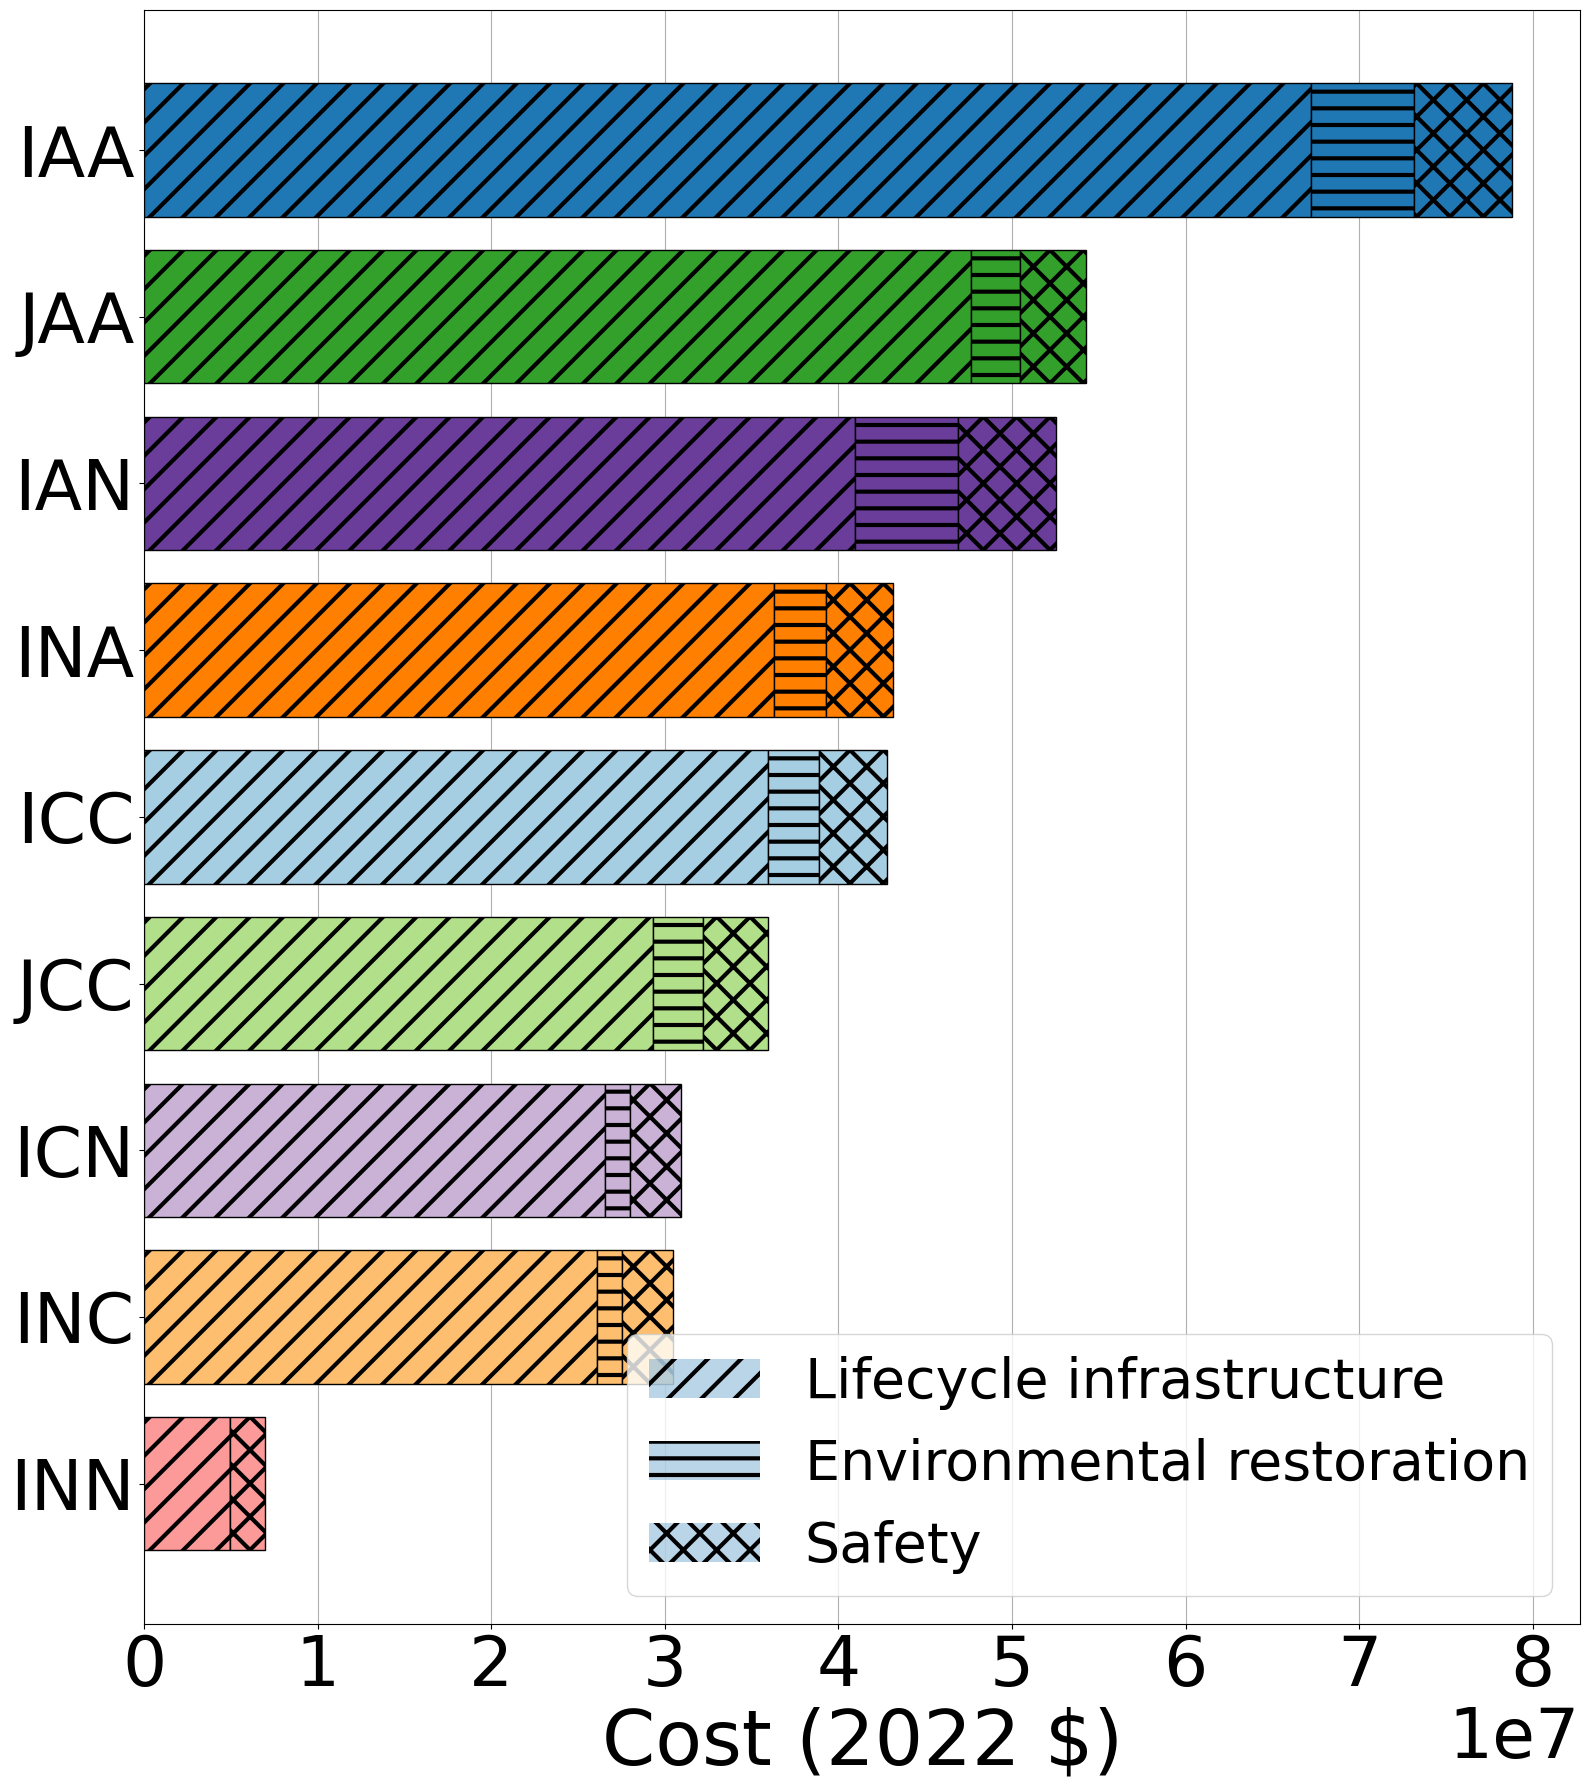

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN','INC','ICN','JCC','ICC','INA','IAN','JAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


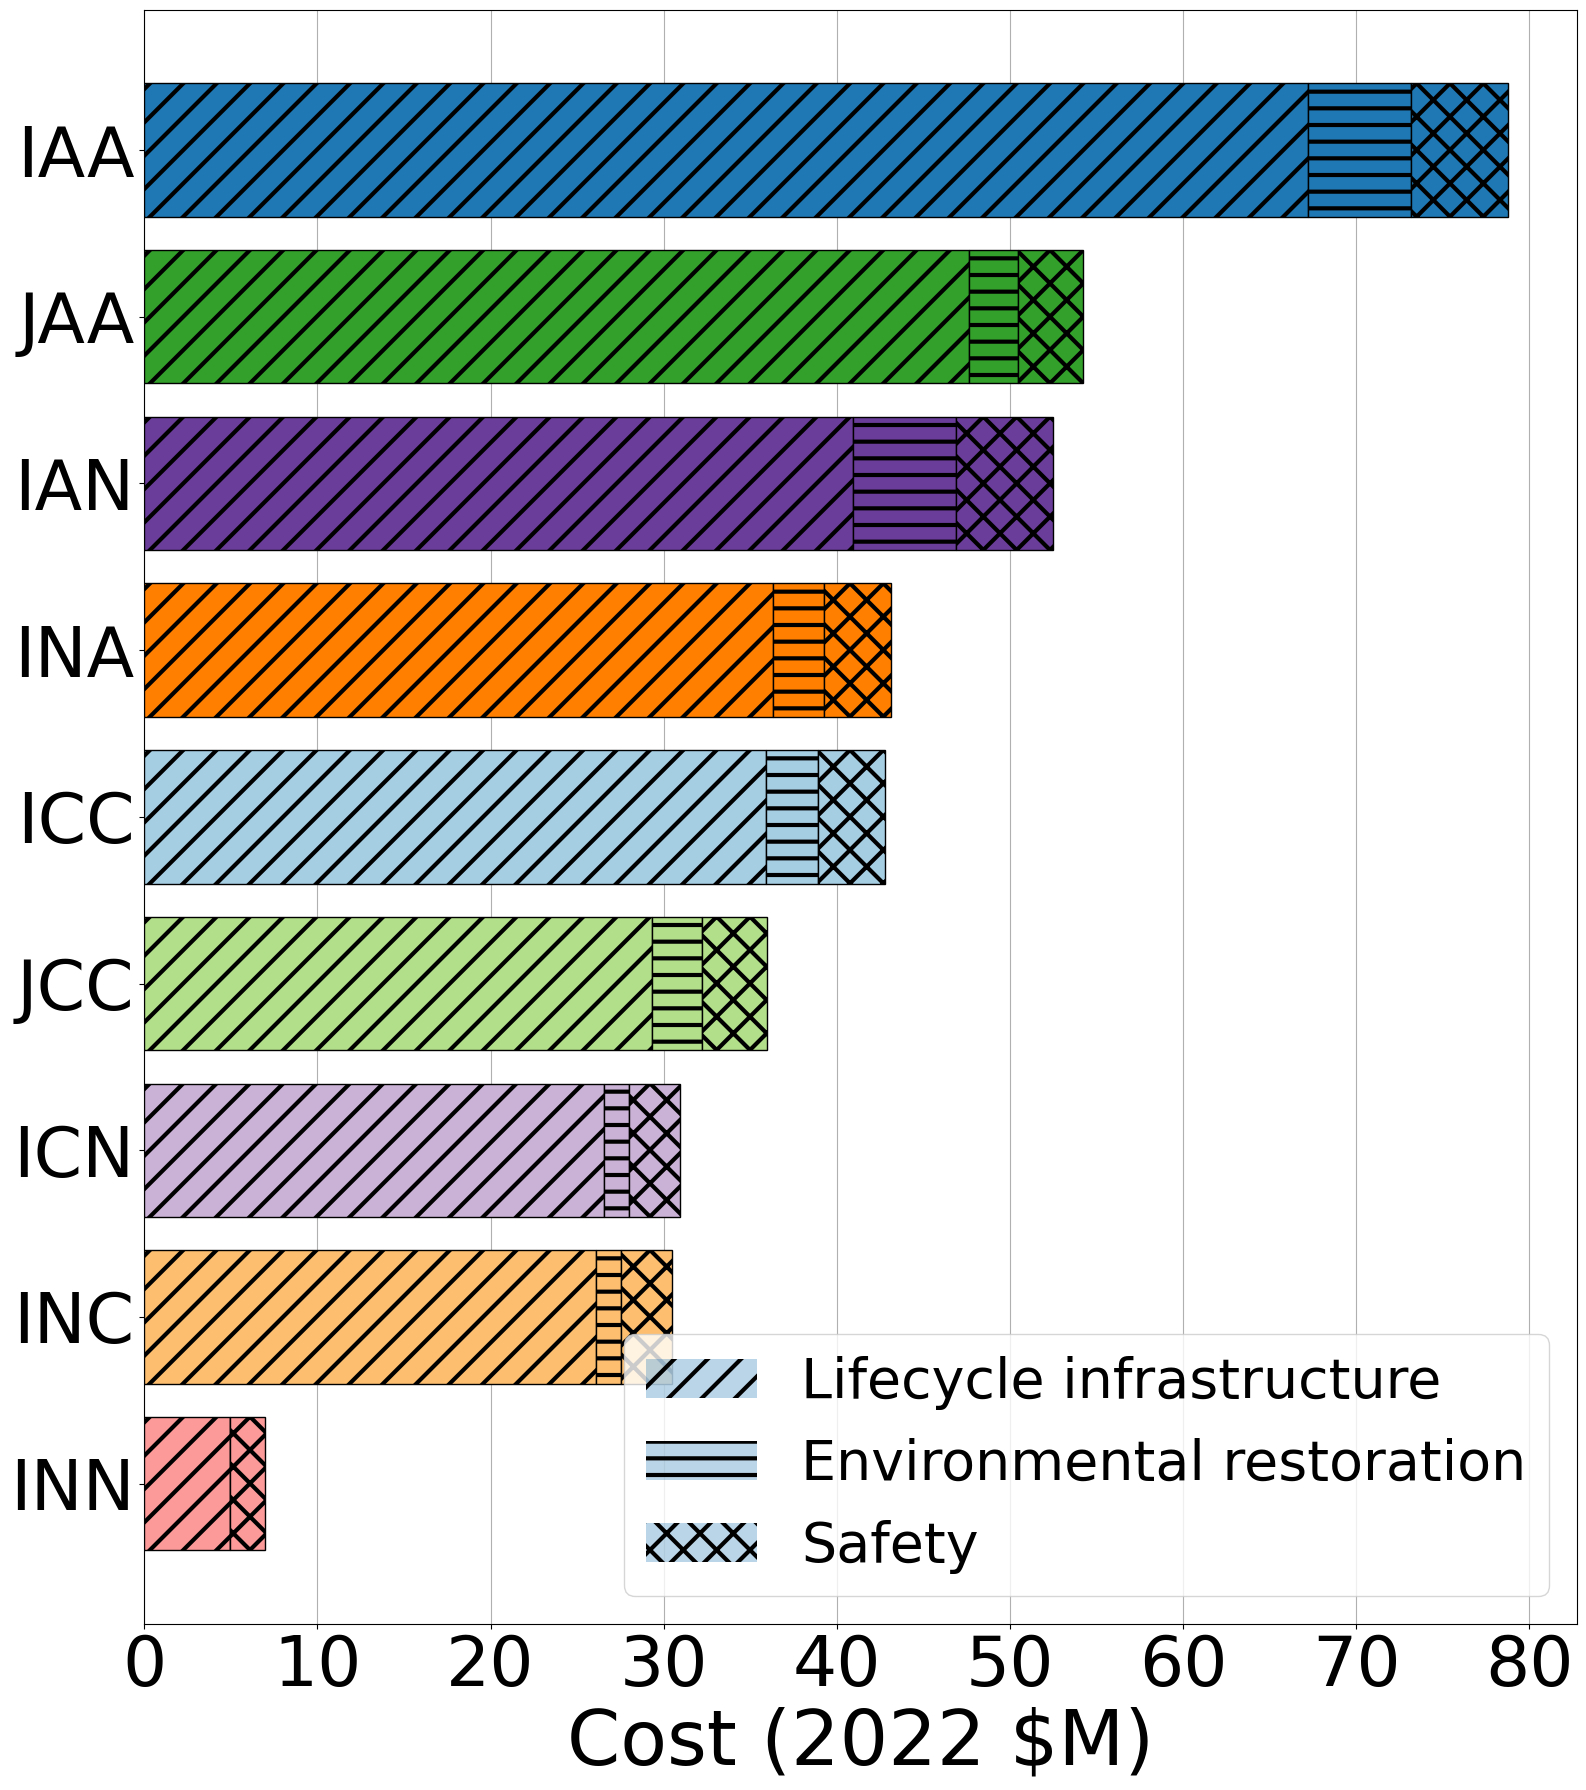

In [47]:
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN', 'INC', 'ICN', 'JCC', 'ICC', 'INA', 'IAN', 'JAA', 'IAA'])

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

# Set labels and grid
plt.xlabel("Cost (2022 $M)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [48]:
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration       safety
0      INN              4.938831e+06                      0.000  2027896.426
1      INC              2.656675e+07                1422186.244  2929771.670
2      INA              3.631046e+07                2968567.363  3871296.702
3      ICN              2.609760e+07                1422186.244  2929771.670
4      IAN              3.592729e+07                2968567.363  3871296.702
5      JCC              2.933730e+07                2844372.488  3762260.620
6      ICC              4.763486e+07                2844372.488  3762260.620
7      JAA              4.092588e+07                5937134.726  5645310.683
8      IAA              6.720827e+07                5937134.726  5645310.683

In [49]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - icc_infra) / icc_infra) * 100
percentage_increase

41.09050642128713

In [50]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
jaa_infra = df_npv_cost['lifecycle_infrastructure'][7]  # Index of JAA

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - jaa_infra) / iaa_infra) * 100
percentage_increase

39.10588920250428

In [51]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

38.412134637154494

In [52]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

38.412134637154494

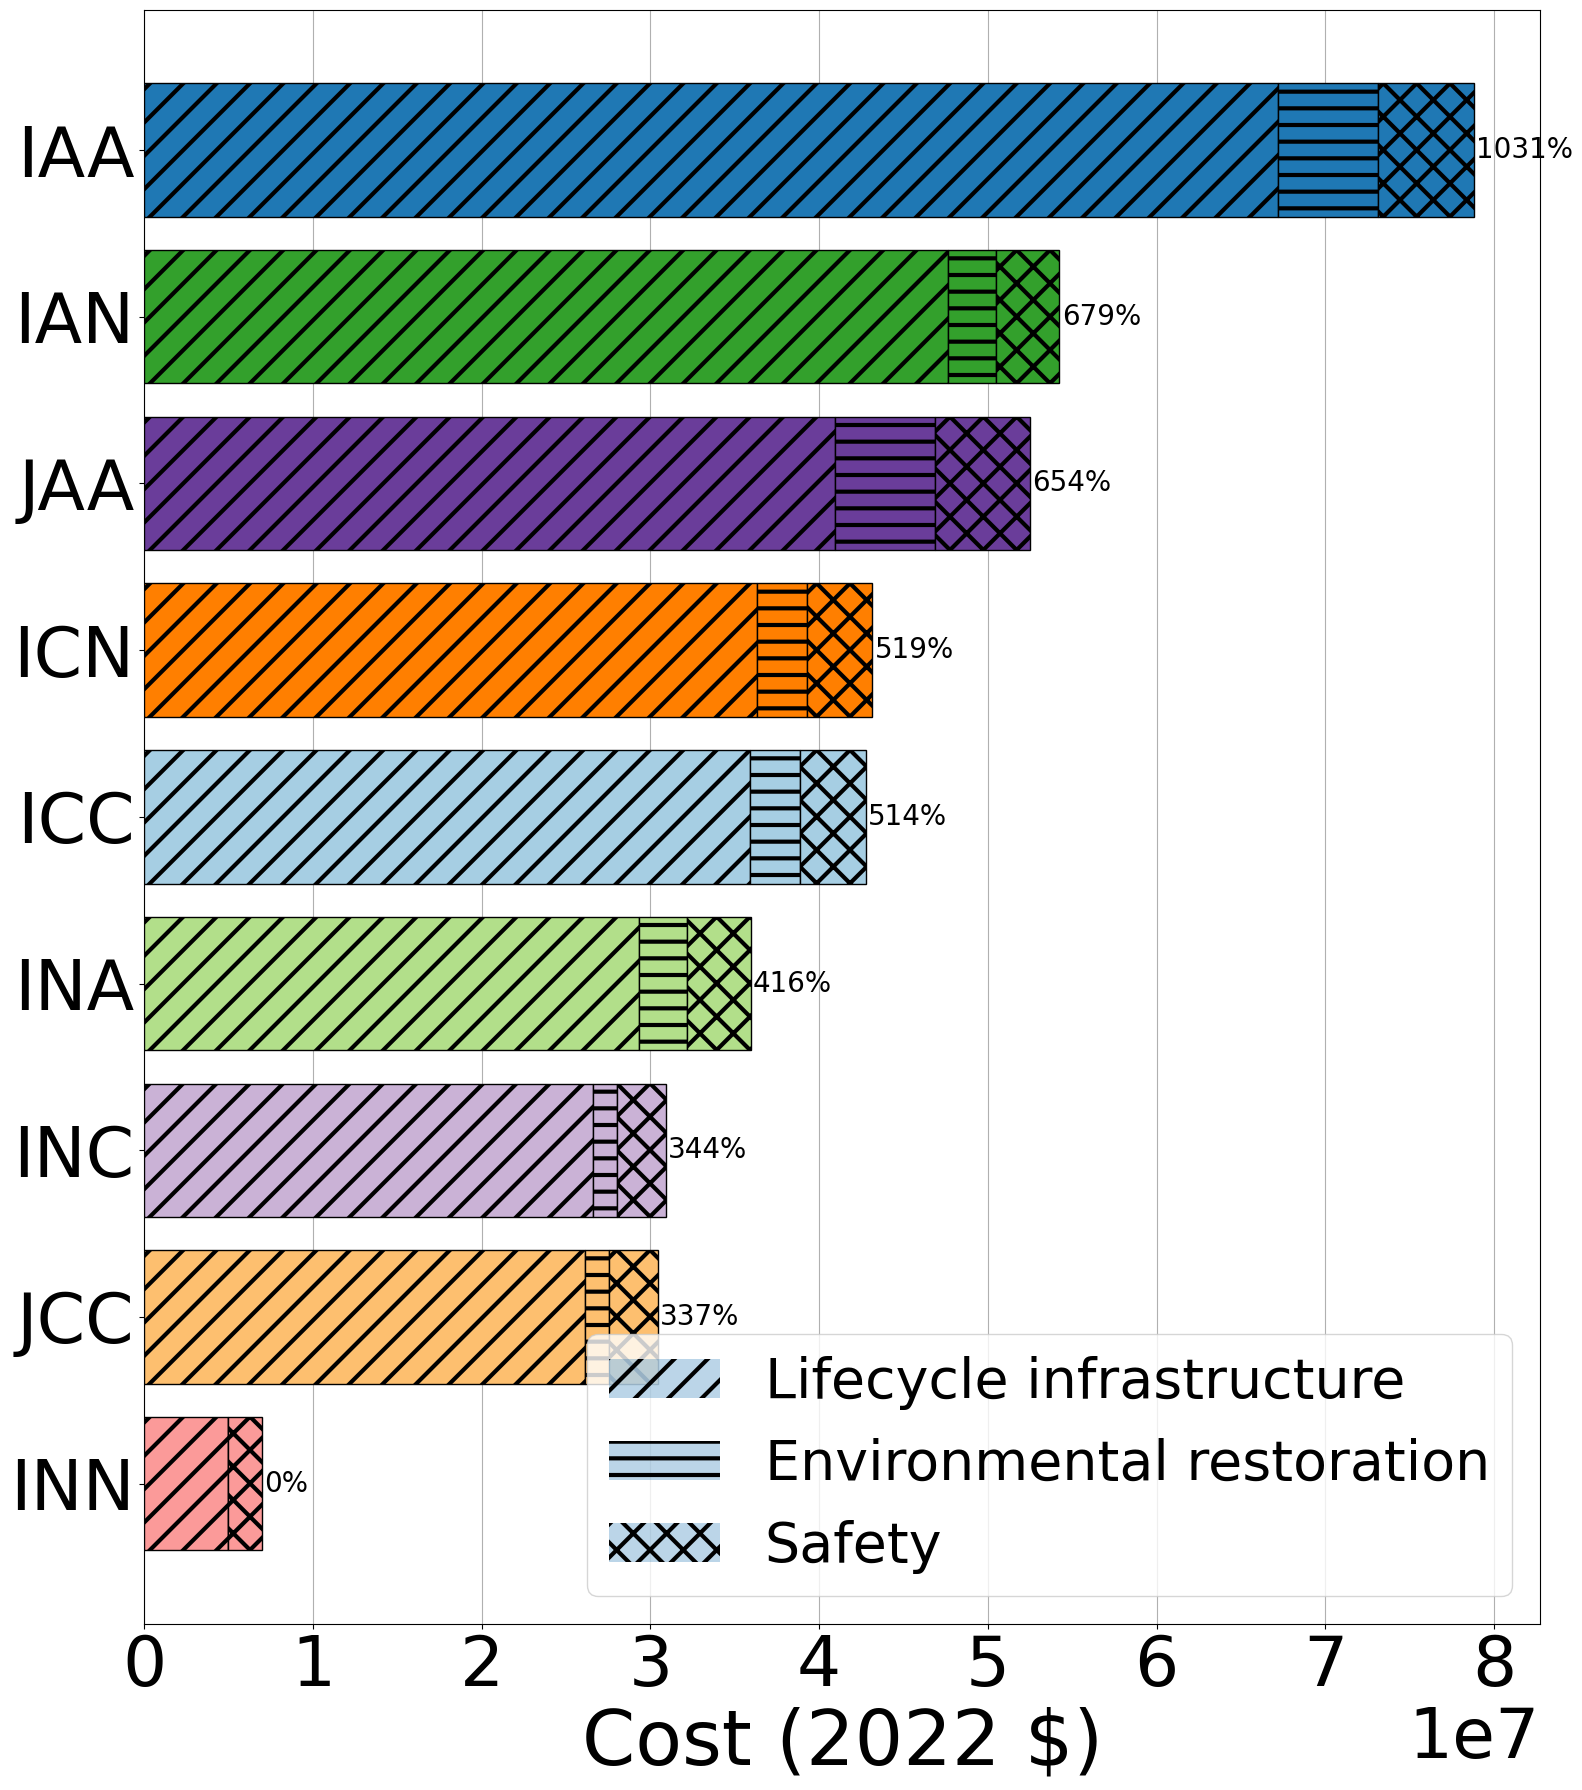

In [53]:
# Manually set the strategy names as the index if they aren't already
df_npv_cost.index = ['INN', 'INC', 'ICN', 'JCC', 'ICC', 'INA', 'IAN', 'JAA', 'IAA']

# Calculate the total cost for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Find the total cost of INN for reference
inn_total_cost = total_cost['INN']

# Calculate the percentage difference relative to INN for each strategy
percent_diff_to_inn = (total_cost - inn_total_cost) / inn_total_cost * 100

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), sorted_indices_reversed, fontsize=50)

# Annotating percentage difference relative to INN
for i, strategy in enumerate(sorted_indices_reversed):
    strategy_total_cost = total_cost[strategy]
    percent_value = percent_diff_to_inn[strategy]
    # Place the annotation at the end of each total bar, with a small offset to the right for readability
    ax.text(strategy_total_cost + inn_total_cost * 0.02, i, f'{percent_value:.0f}%', va='center', fontsize=20)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)

# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [54]:
inn_total_cost

6966727.752

In [55]:
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration       safety
INN      INN              4.938831e+06                      0.000  2027896.426
INC      INC              2.656675e+07                1422186.244  2929771.670
ICN      INA              3.631046e+07                2968567.363  3871296.702
JCC      ICN              2.609760e+07                1422186.244  2929771.670
ICC      IAN              3.592729e+07                2968567.363  3871296.702
INA      JCC              2.933730e+07                2844372.488  3762260.620
IAN      ICC              4.763486e+07                2844372.488  3762260.620
JAA      JAA              4.092588e+07                5937134.726  5645310.683
IAA      IAA              6.720827e+07                5937134.726  5645310.683

In [56]:
df_npv_cost['total_cost']=df_npv_cost['lifecycle_infrastructure']+df_npv_cost['environmental_restoration']+df_npv_cost['safety']
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration  \
INN      INN              4.938831e+06                      0.000   
INC      INC              2.656675e+07                1422186.244   
ICN      INA              3.631046e+07                2968567.363   
JCC      ICN              2.609760e+07                1422186.244   
ICC      IAN              3.592729e+07                2968567.363   
INA      JCC              2.933730e+07                2844372.488   
IAN      ICC              4.763486e+07                2844372.488   
JAA      JAA              4.092588e+07                5937134.726   
IAA      IAA              6.720827e+07                5937134.726   

          safety    total_cost  
INN  2027896.426  6.966728e+06  
INC  2929771.670  3.091871e+07  
ICN  3871296.702  4.315032e+07  
JCC  2929771.670  3.044955e+07  
ICC  3871296.702  4.276716e+07  
INA  3762260.620  3.594393e+07  
IAN  3762260.620  5.424150e+07  
JAA  5645310.683  5.250832e+07  
IAA  5645310.683  7.879072e+07

In [57]:
(3.192343e+07-2.322343e+07)/3.192343e+07

0.2725271062664632

In [58]:
(7.133958e+07-5.063958e+07)/7.133958e+07

0.29016150641761557

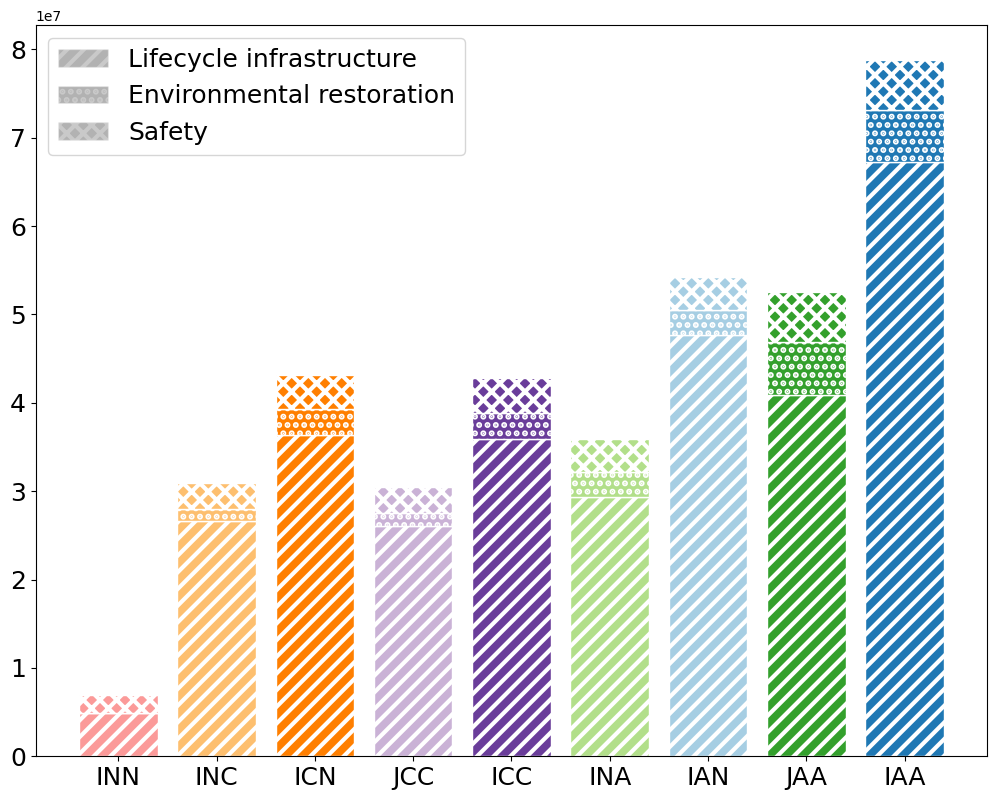

In [59]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

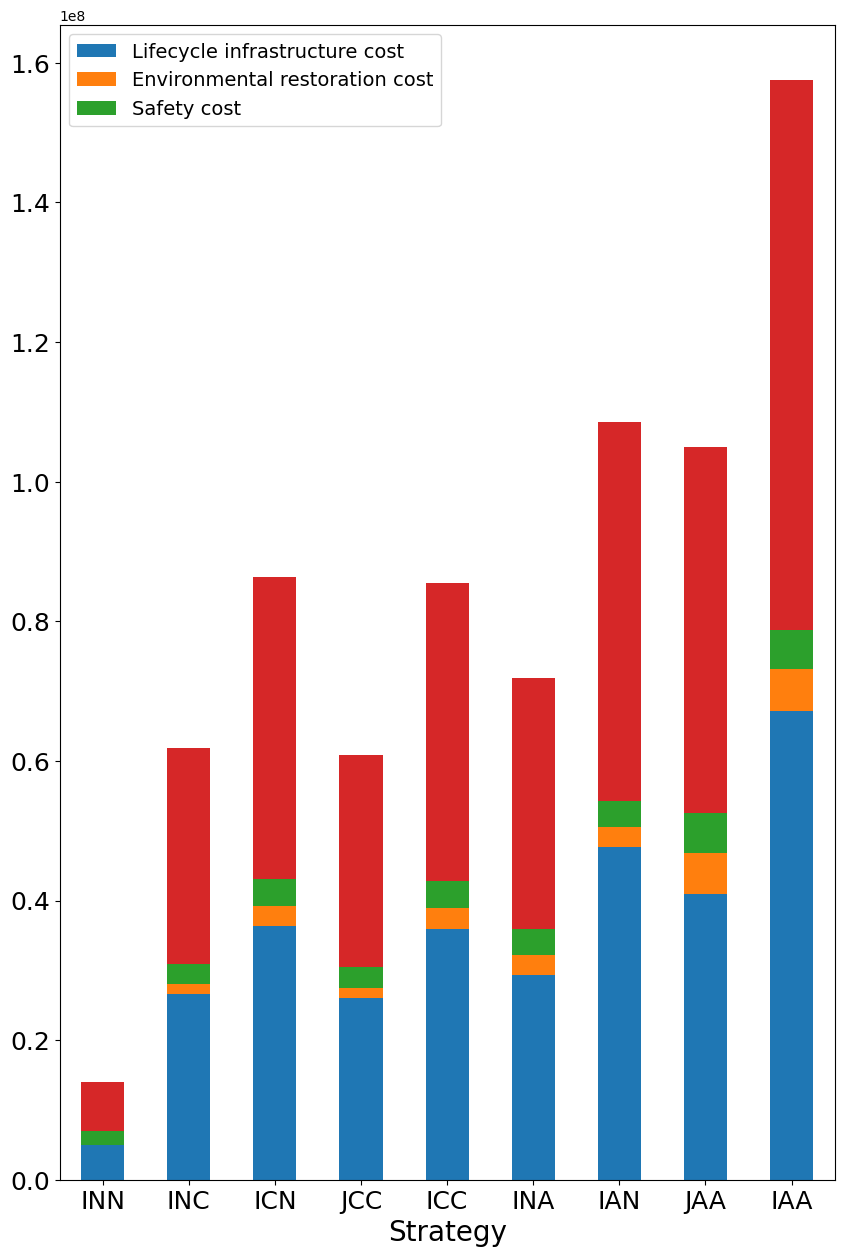

In [60]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [61]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [62]:
df_npv_loss

avoided_economic_losses
Strategy                         
INN                  0.000000e+00
INC                  7.300006e+06
INA                  1.666418e+07
ICN                  1.655099e+07
IAN                  3.616700e+07
JCC                  2.500096e+07
ICC                  2.500096e+07
JAA                  5.398114e+07
IAA                  5.398114e+07

In [63]:
df_npv_loss=df_npv_loss.reset_index()

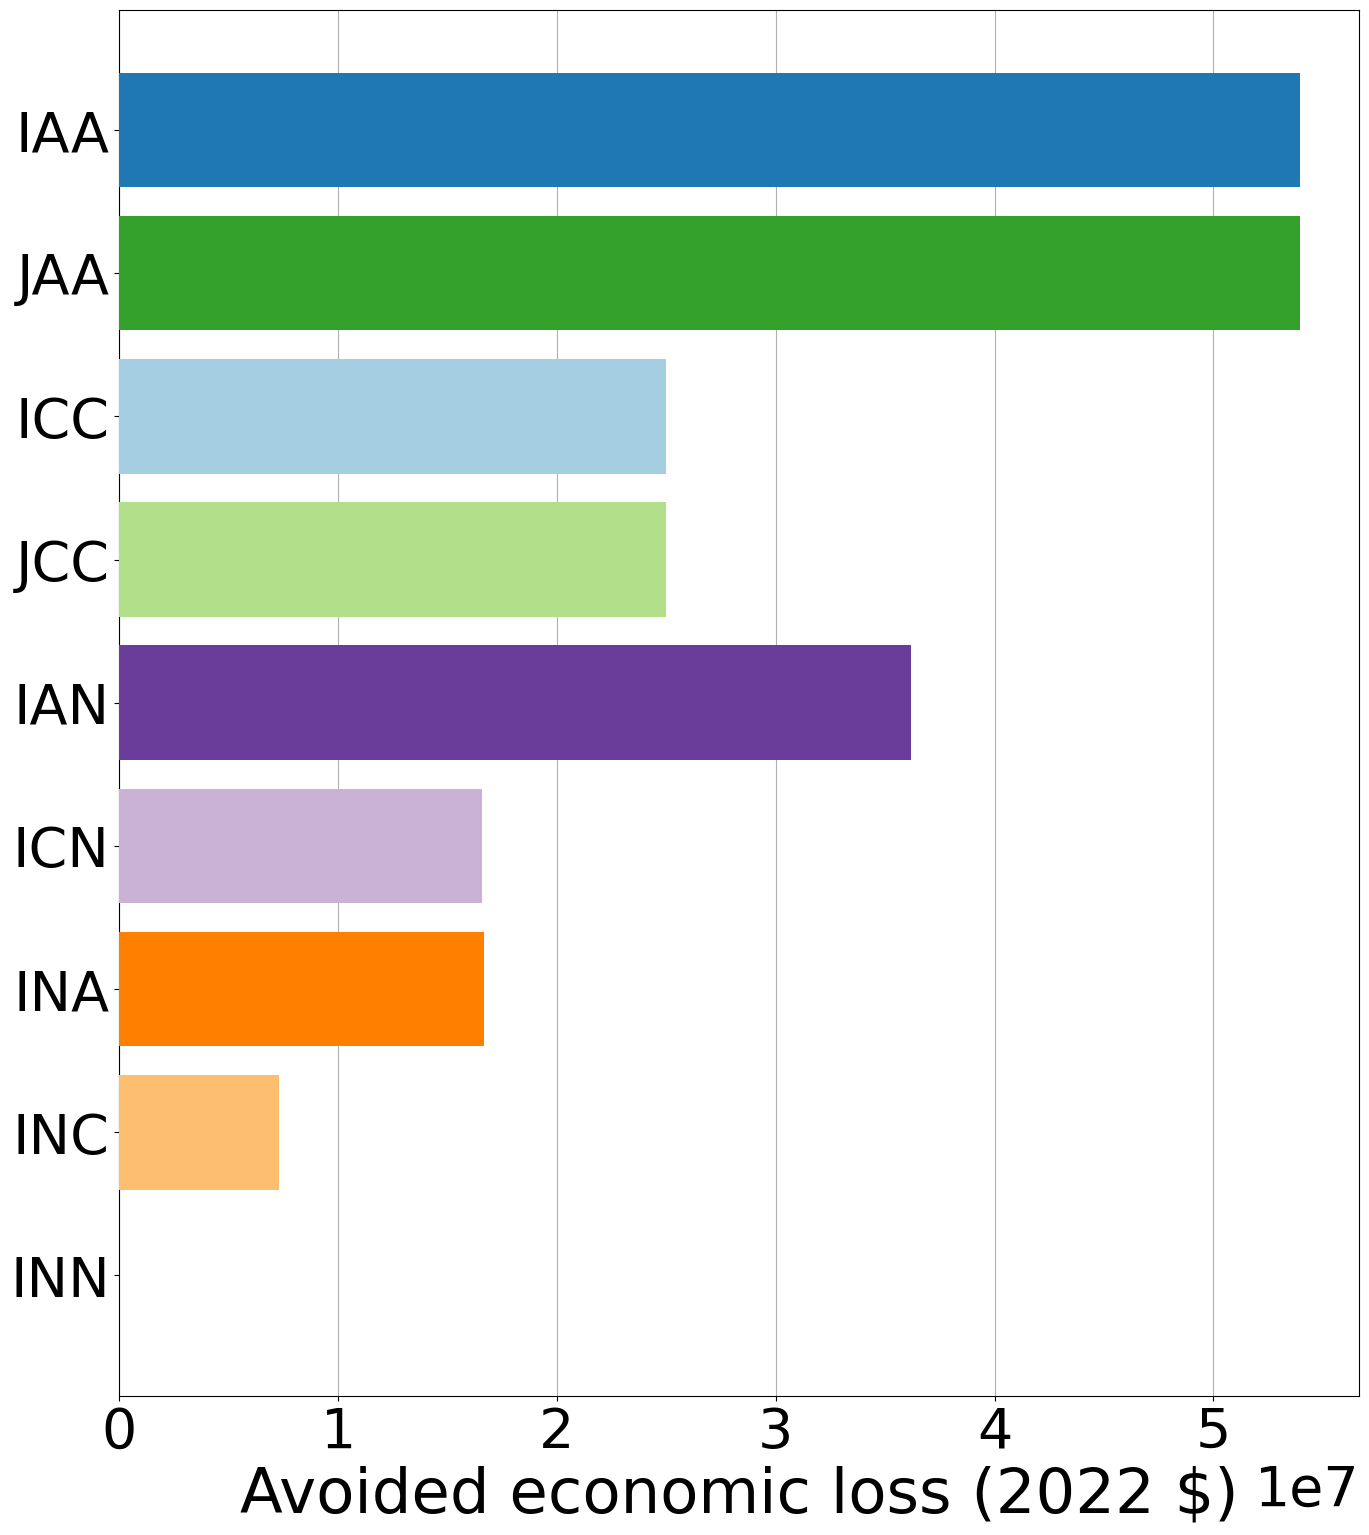

In [64]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

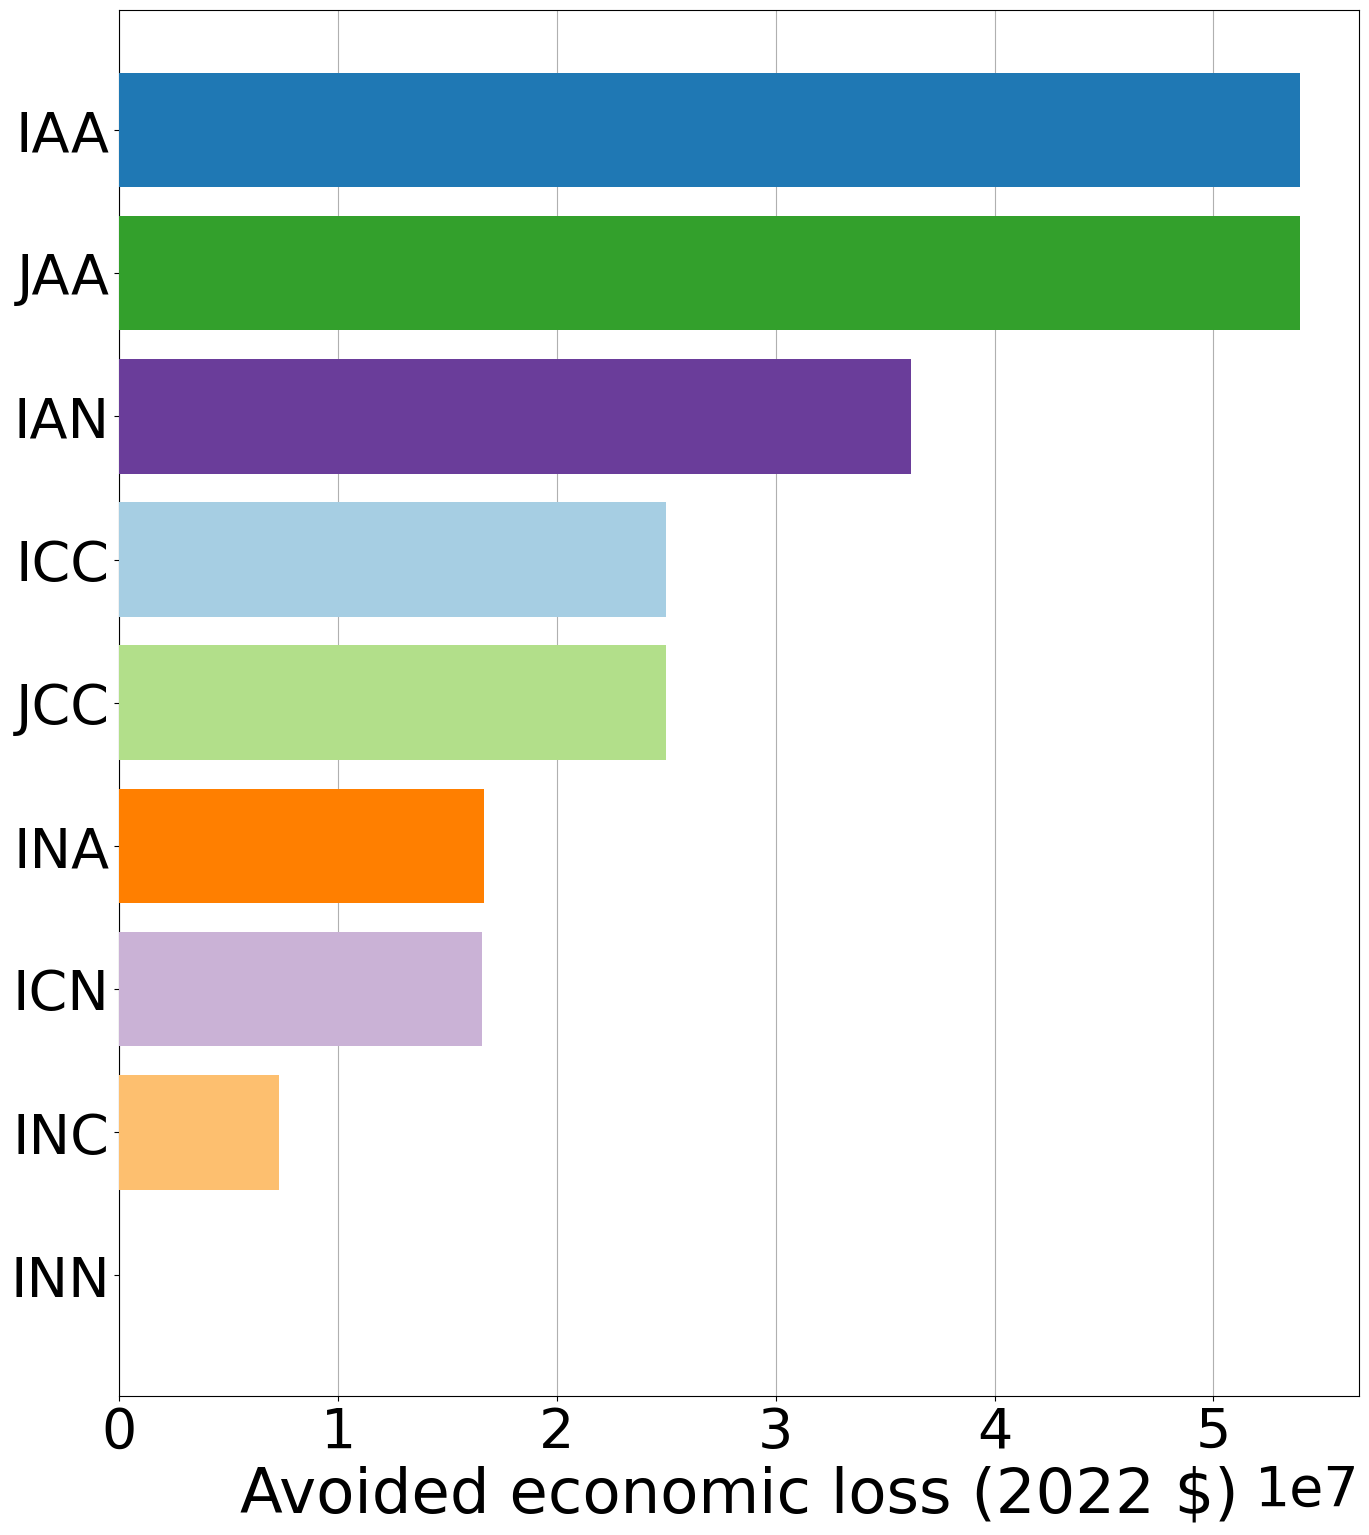

In [65]:
strategy_order = ['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA']
colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

plt.xlabel('Avoided economic loss (2022 $)', fontsize=12)
plt.xticks(fontsize=40)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=40)  # Set y-ticks and labels from the sorted DataFrame
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

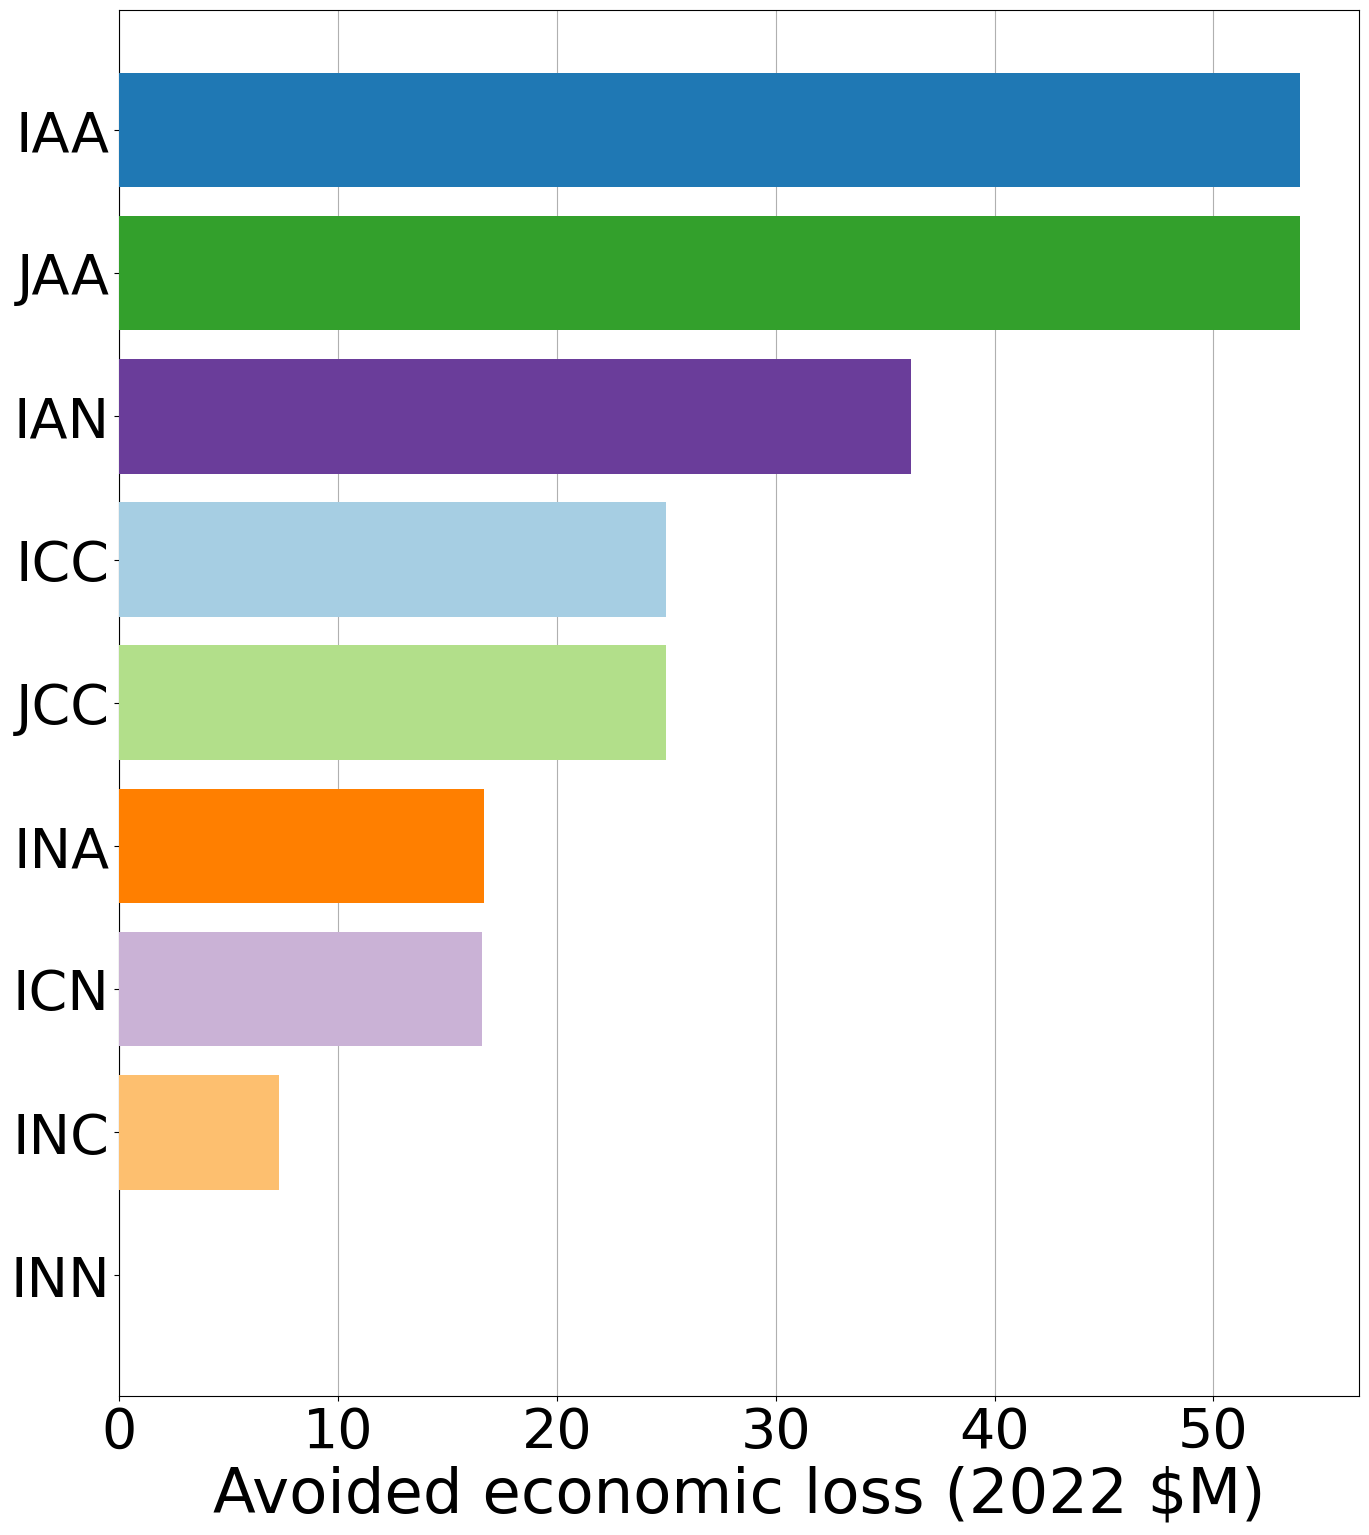

In [66]:
# Assuming df_npv_loss is already defined and contains the necessary data
strategy_order = ['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA']
colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Avoided economic loss (2022 $M)', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=40)  # Set y-ticks and labels from the sorted DataFrame
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [67]:
df_npv_loss_sorted

Strategy  avoided_economic_losses    color
0      INN             0.000000e+00  #FB9A99
1      INC             7.300006e+06  #FDBF6F
2      ICN             1.655099e+07  #CAB2D6
3      INA             1.666418e+07  #FF7F00
4      JCC             2.500096e+07  #B2DF8A
5      ICC             2.500096e+07  #A6CEE3
6      IAN             3.616700e+07  #6A3D9A
7      JAA             5.398114e+07  #33A02C
8      IAA             5.398114e+07  #1F78B4

In [68]:
(47900000.0-24200000.0)/24200000.0

0.9793388429752066

In [69]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

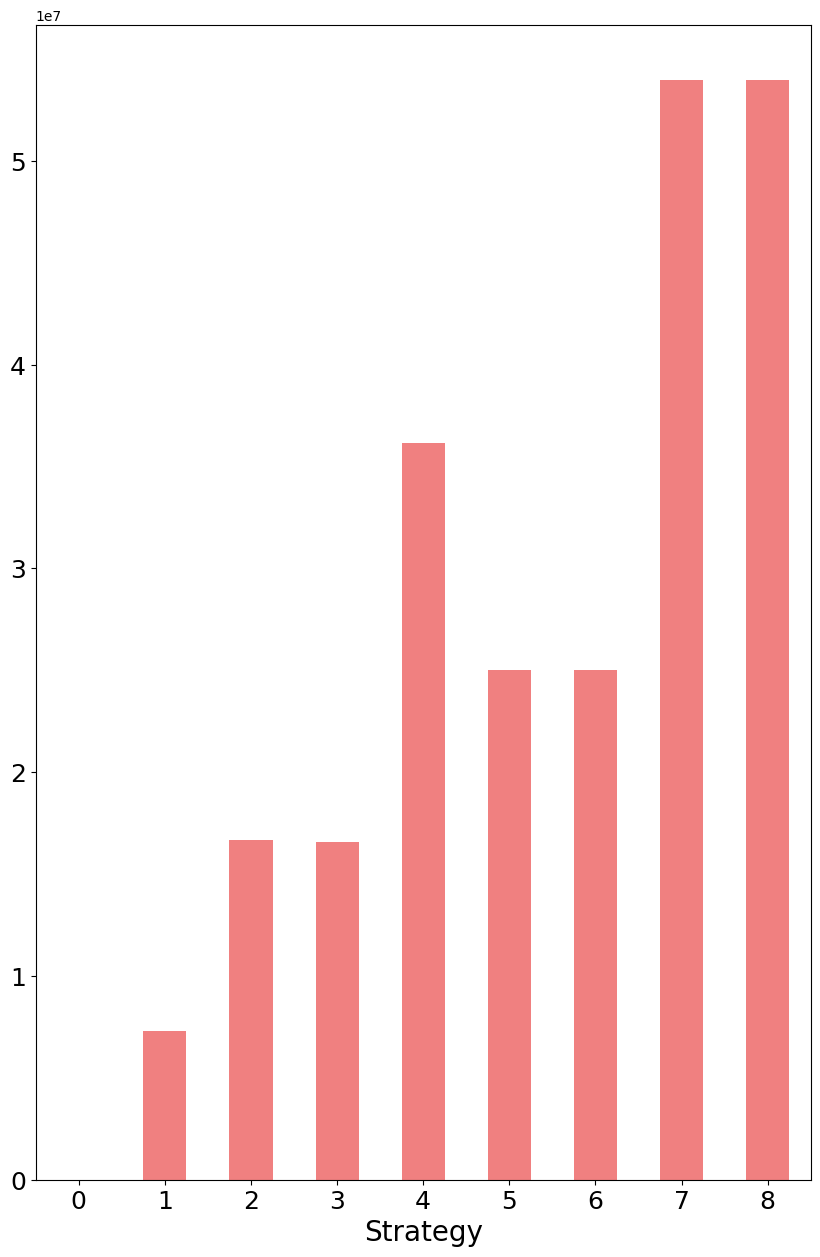

In [70]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [71]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [72]:
df_npv_benefit

aesthetic_benefit
Strategy                   
INN            0.000000e+00
INC            4.284824e+05
INA            7.669424e+05
ICN            4.284824e+05
IAN            7.669424e+05
JCC            8.569649e+05
ICC            8.569649e+05
JAA            1.533885e+06
IAA            1.533885e+06

In [73]:
df_npv_benefit=df_npv_benefit.reset_index()

In [74]:
df_npv_benefit

Strategy  aesthetic_benefit
0      INN       0.000000e+00
1      INC       4.284824e+05
2      INA       7.669424e+05
3      ICN       4.284824e+05
4      IAN       7.669424e+05
5      JCC       8.569649e+05
6      ICC       8.569649e+05
7      JAA       1.533885e+06
8      IAA       1.533885e+06

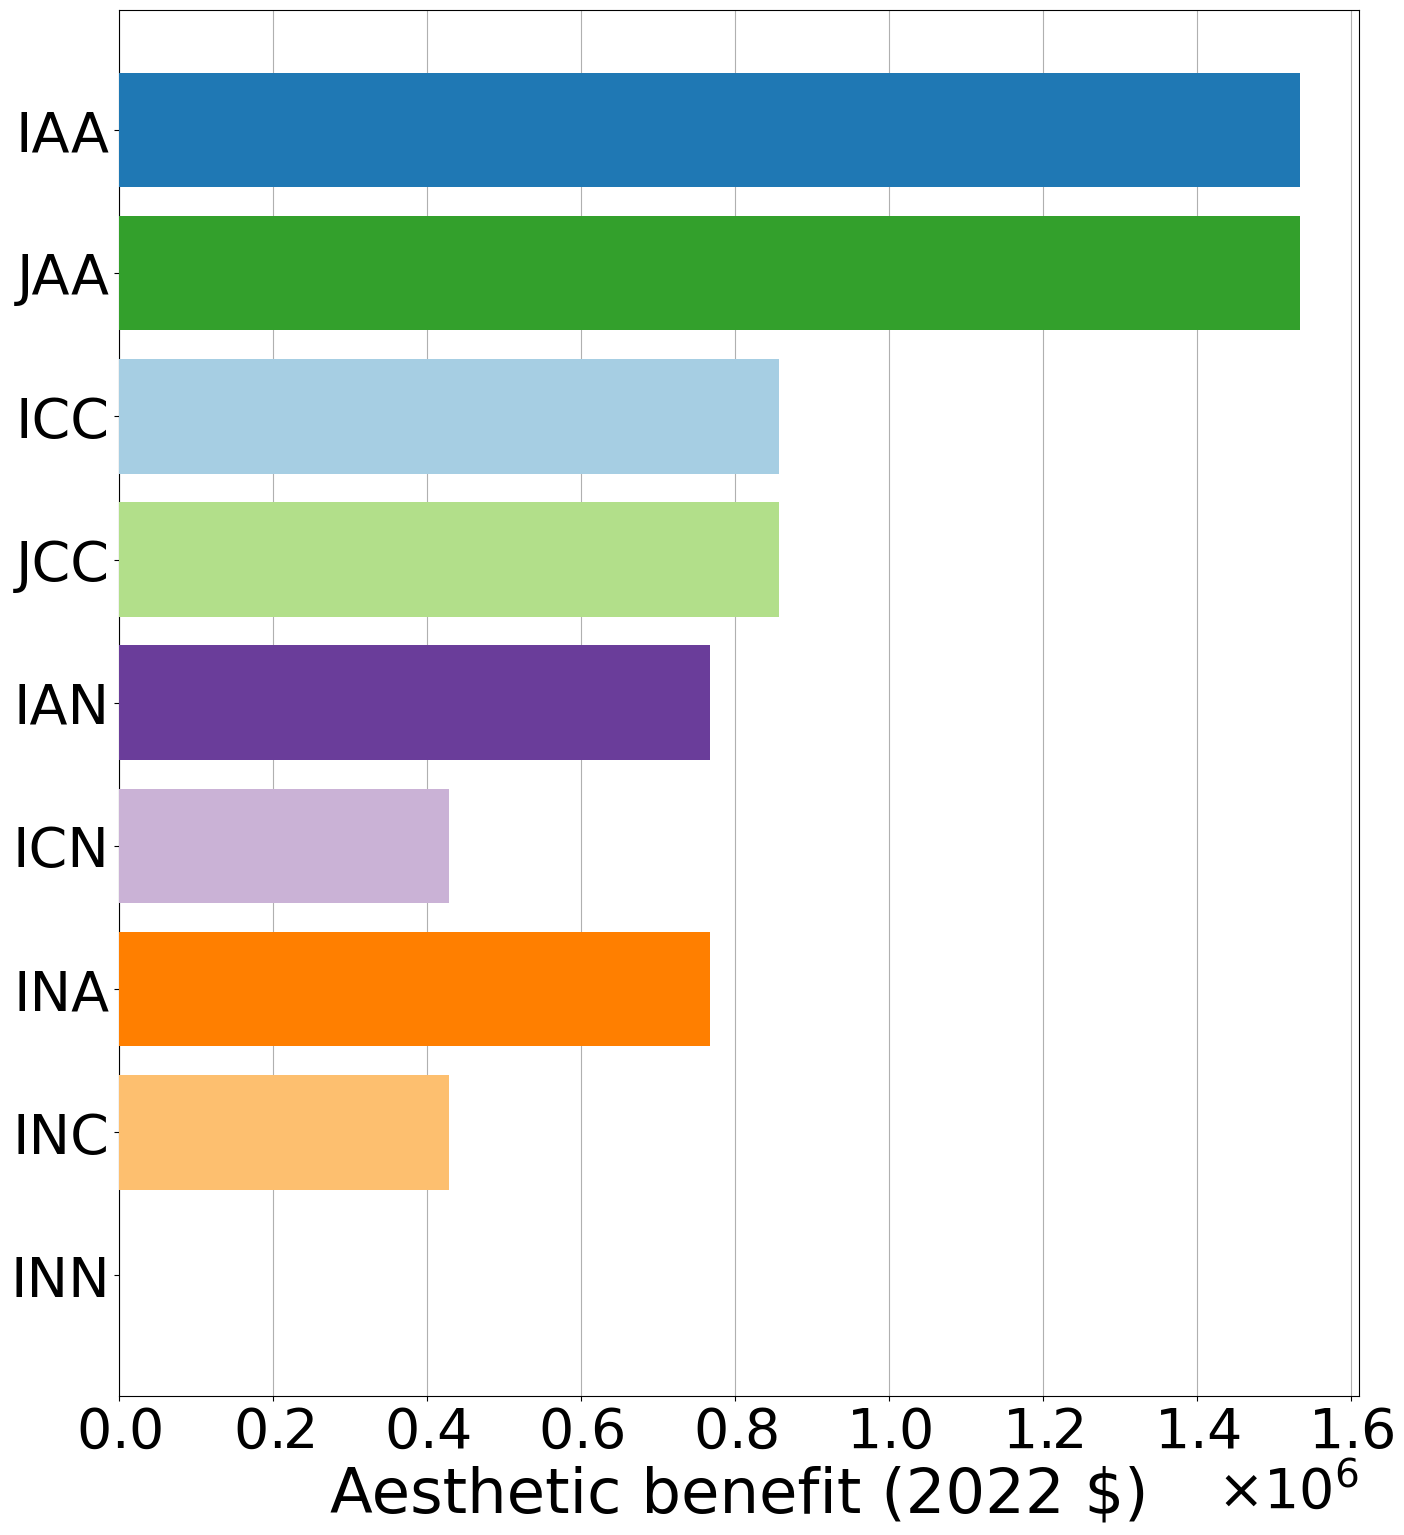

In [75]:
from matplotlib.ticker import ScalarFormatter

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

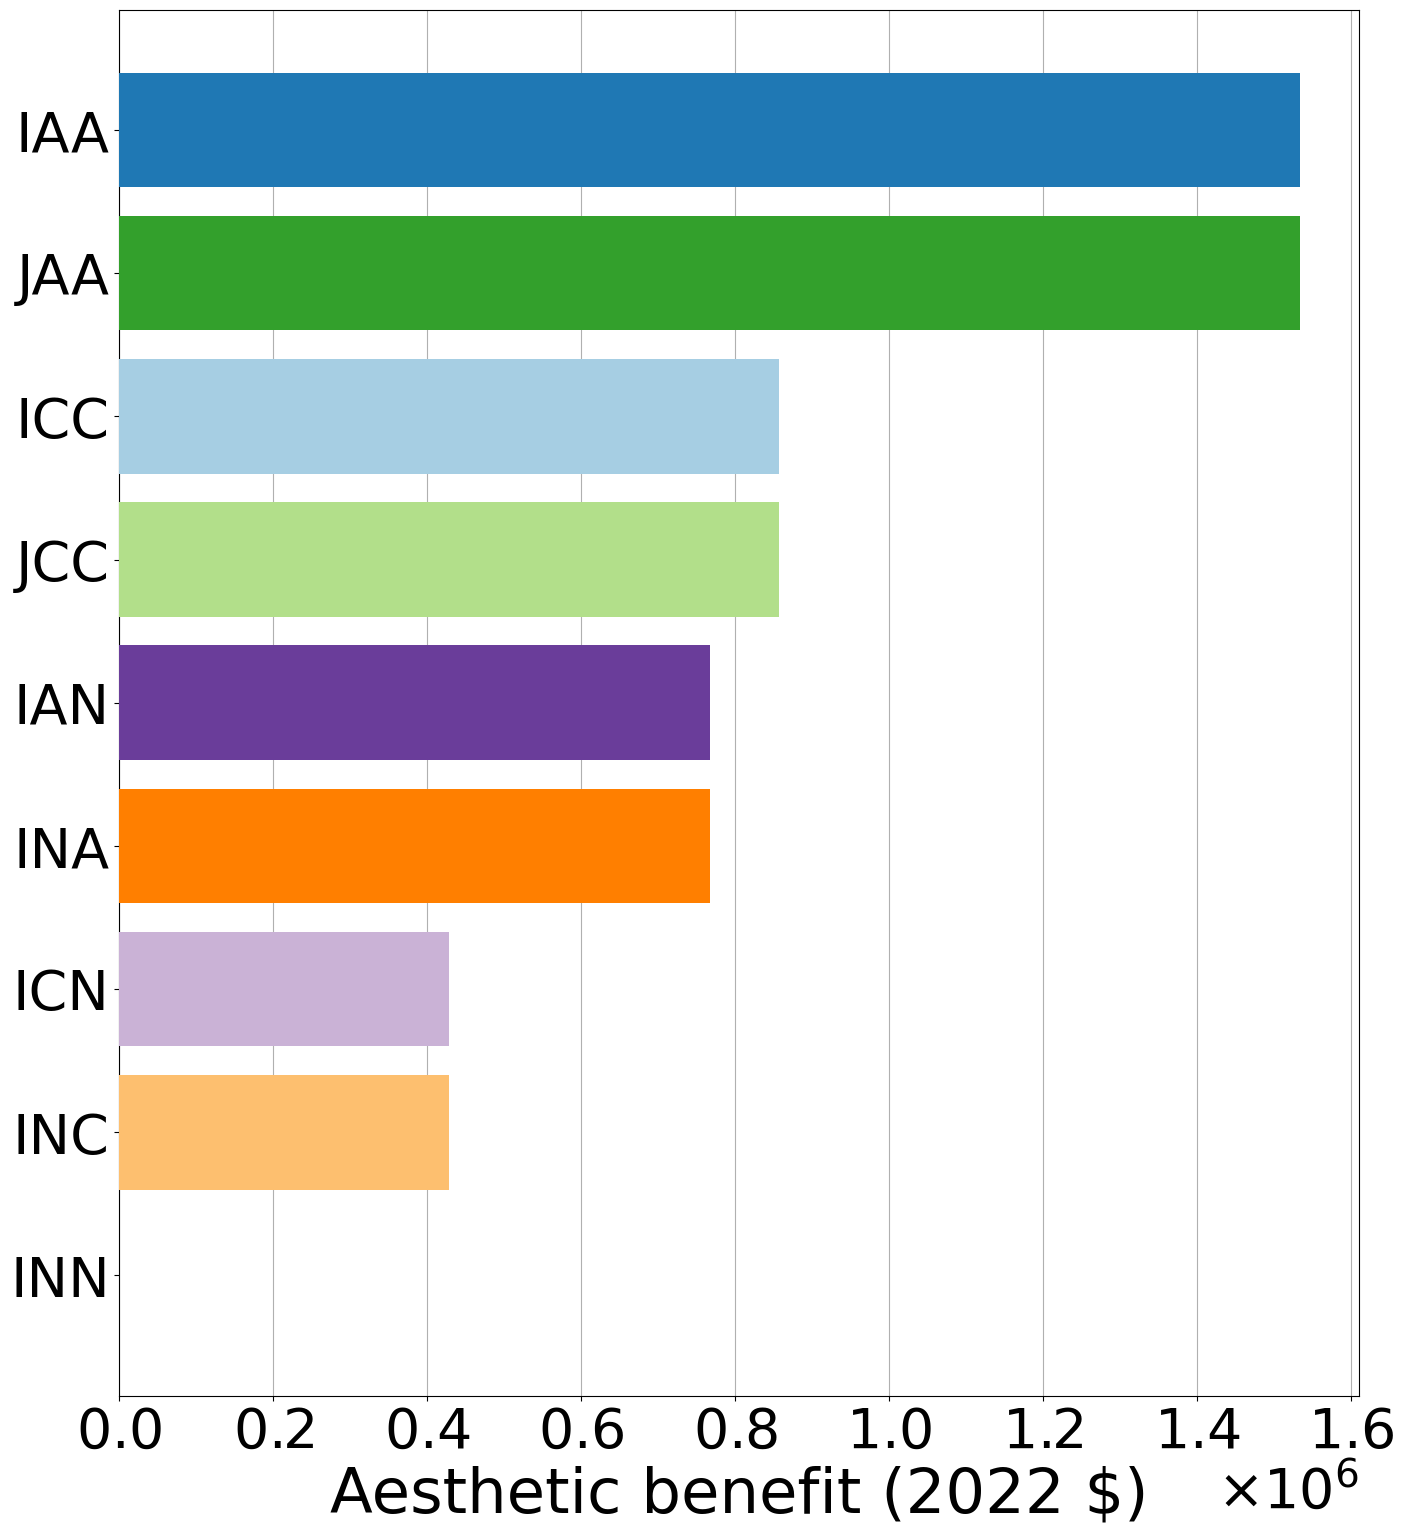

In [76]:
# Create a dictionary to map labels to colors
label_color_dict = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

plt.xlabel('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel('Strategies', fontsize=45)  # Updated label for y-axis
plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=40)
plt.xticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


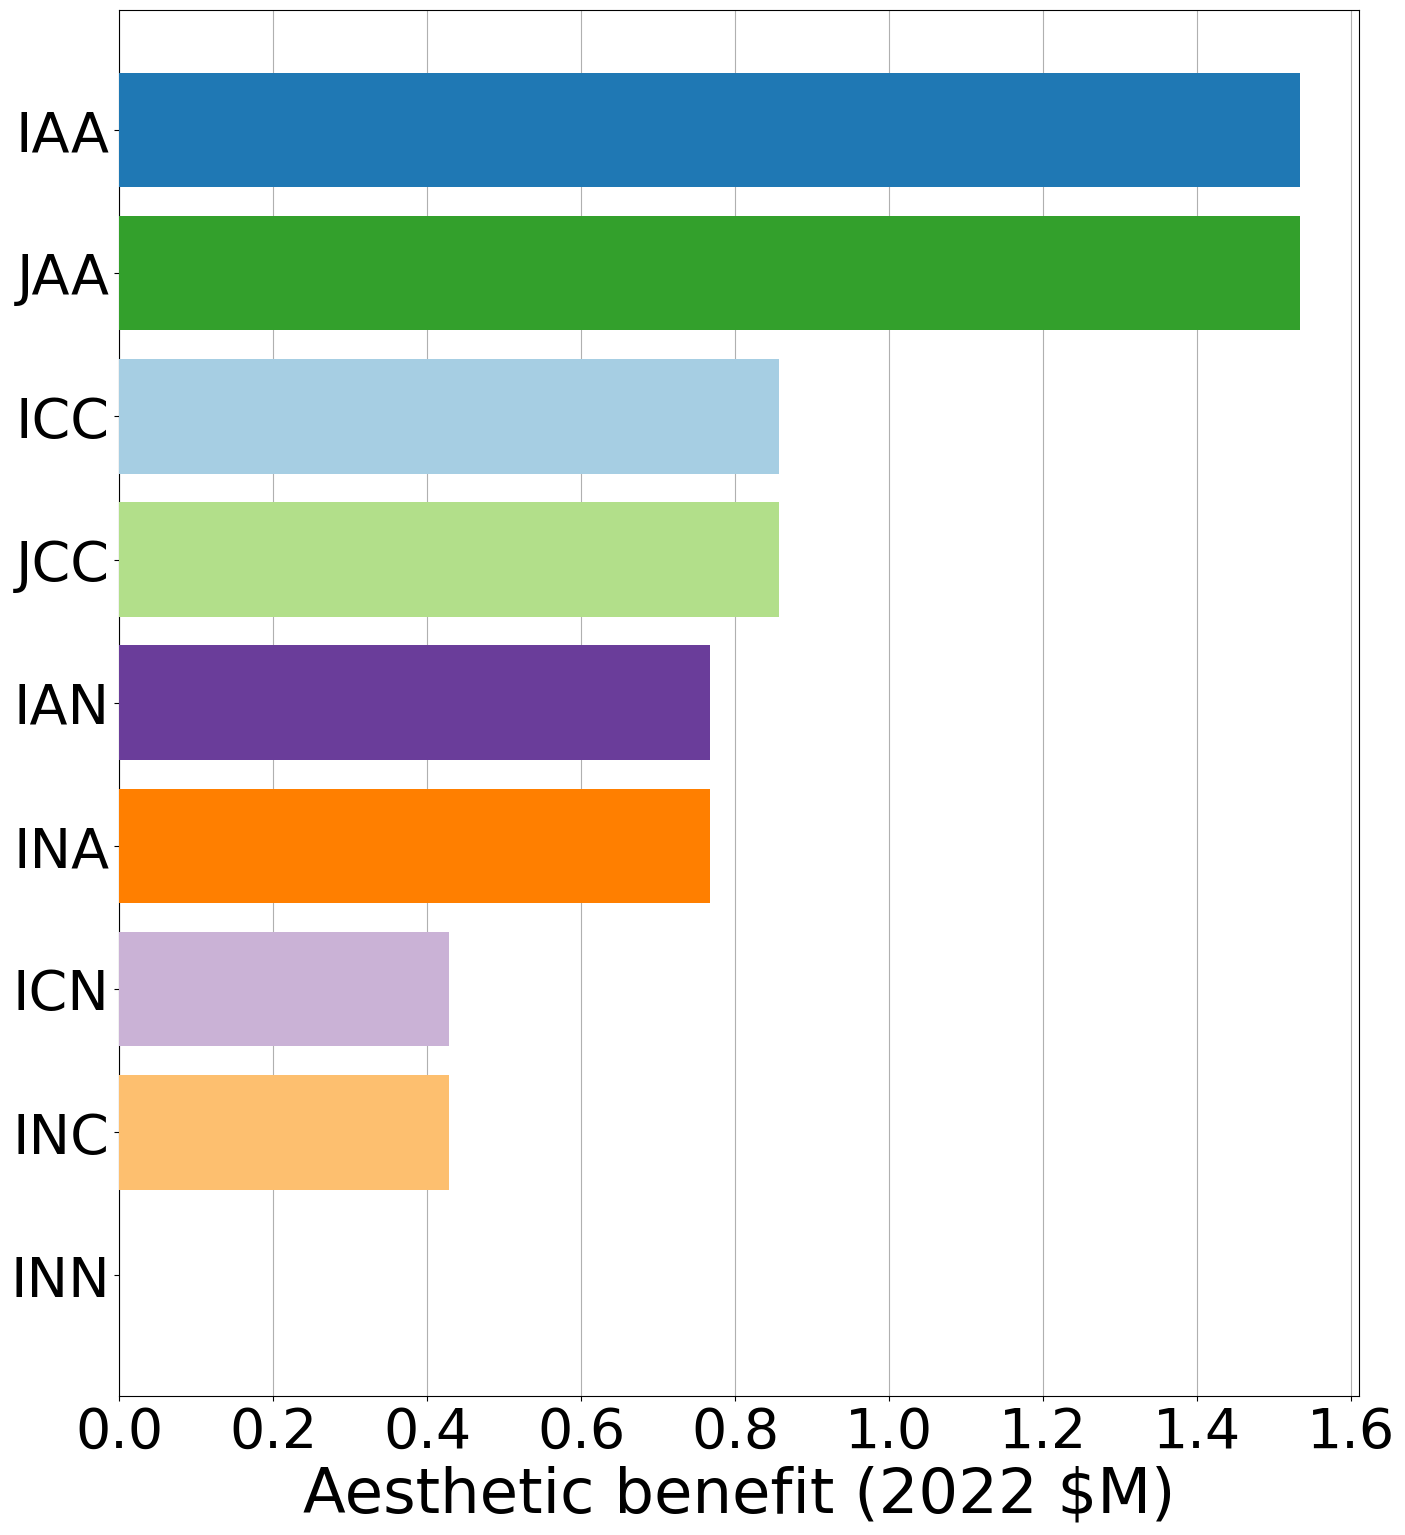

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Create a dictionary to map labels to colors
label_color_dict = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_benefit['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = FuncFormatter(lambda x,pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Aesthetic benefit (2022 $M)', fontsize=45)
plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=40)
plt.xticks(fontsize=40)

ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [78]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'JCC'),
  Text(6, 0, 'ICC'),
  Text(7, 0, 'JAA'),
  Text(8, 0, 'IAA')])

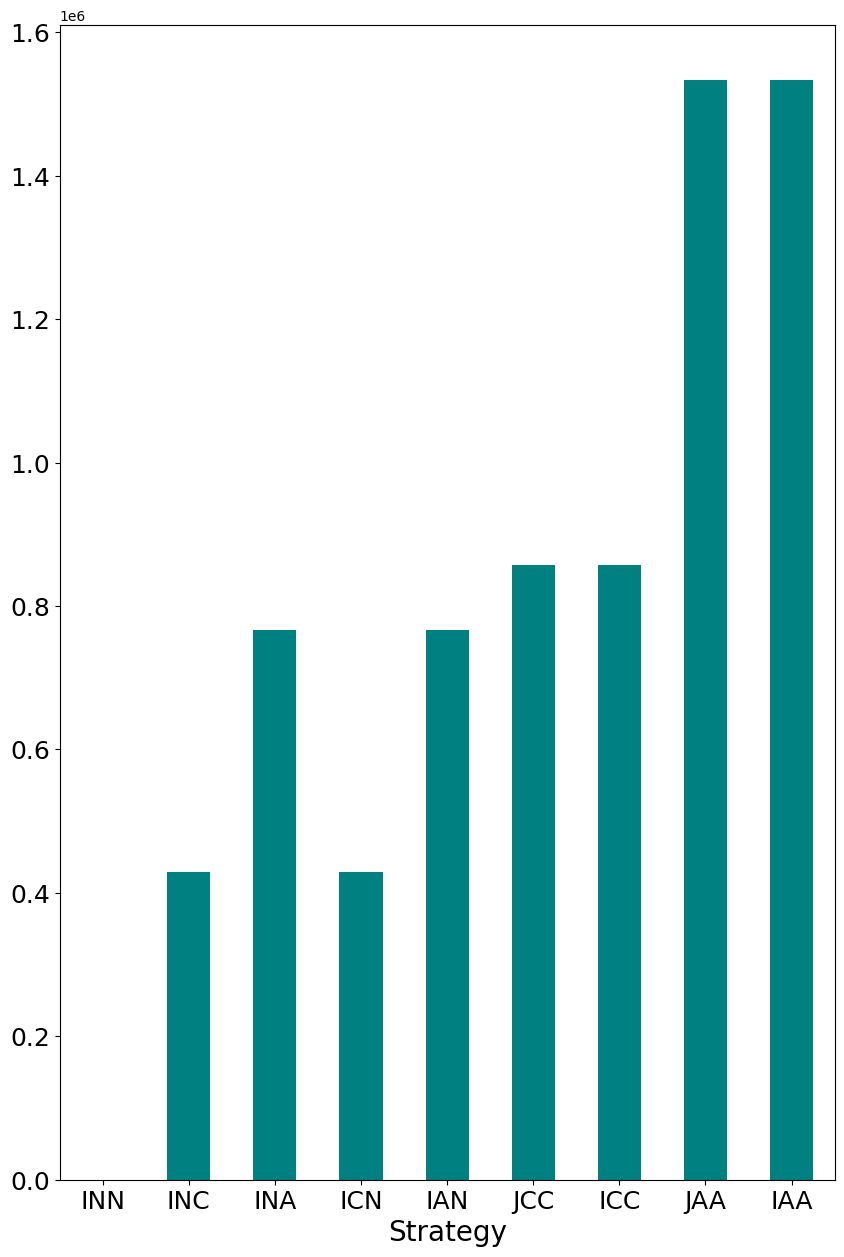

In [79]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [80]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative_new.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

Strategy  lifecycle_infrastructure  environmental_restoration        safety  \
0      INN                      0.00                      0.000  0.000000e+00   
1      INC               21627916.00                1422186.244  9.018752e+05   
2      INA               31371625.79                2968567.363  1.843400e+06   
3      ICN               21158765.47                1422186.244  9.018752e+05   
4      IAN               30988462.58                2968567.363  1.843400e+06   
5      JCC               24398464.65                2844372.488  1.734364e+06   
6      ICC               42696032.80                2844372.488  1.734364e+06   
7      JAA               35987047.70                5937134.726  3.617414e+06   
8      IAA               62269439.70                5937134.726  3.617414e+06   

    total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0         0.00       0.000000e+00             0.000000e+00  0.000000e+00  
1  23951977.49       4.284824e+05             7.300006e+06 -1.622349e+07  
2  36183593.43       7.669424e+05             1.666418e+07 -1.875247e+07  
3  23482826.96       4.284824e+05             1.655099e+07 -6.503358e+06  
4  35800430.22       7.669424e+05             3.616700e+07  1.133515e+06  
5  28977201.34       8.569649e+05             2.500096e+07 -3.119281e+06  
6  47274769.48       8.569649e+05             2.500096e+07 -2.141685e+07  
7  45541596.68       1.533885e+06             5.398114e+07  9.973433e+06  
8  71823988.68       1.533885e+06             5.398114e+07 -1.630896e+07

In [81]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [82]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [83]:
df_npv_net_benefit_relative

net_benefit
Strategy              
INN       0.000000e+00
INC      -1.622349e+07
INA      -1.875247e+07
ICN      -6.503358e+06
IAN       1.133515e+06
JCC      -3.119281e+06
ICC      -2.141685e+07
JAA       9.973433e+06
IAA      -1.630896e+07

In [84]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

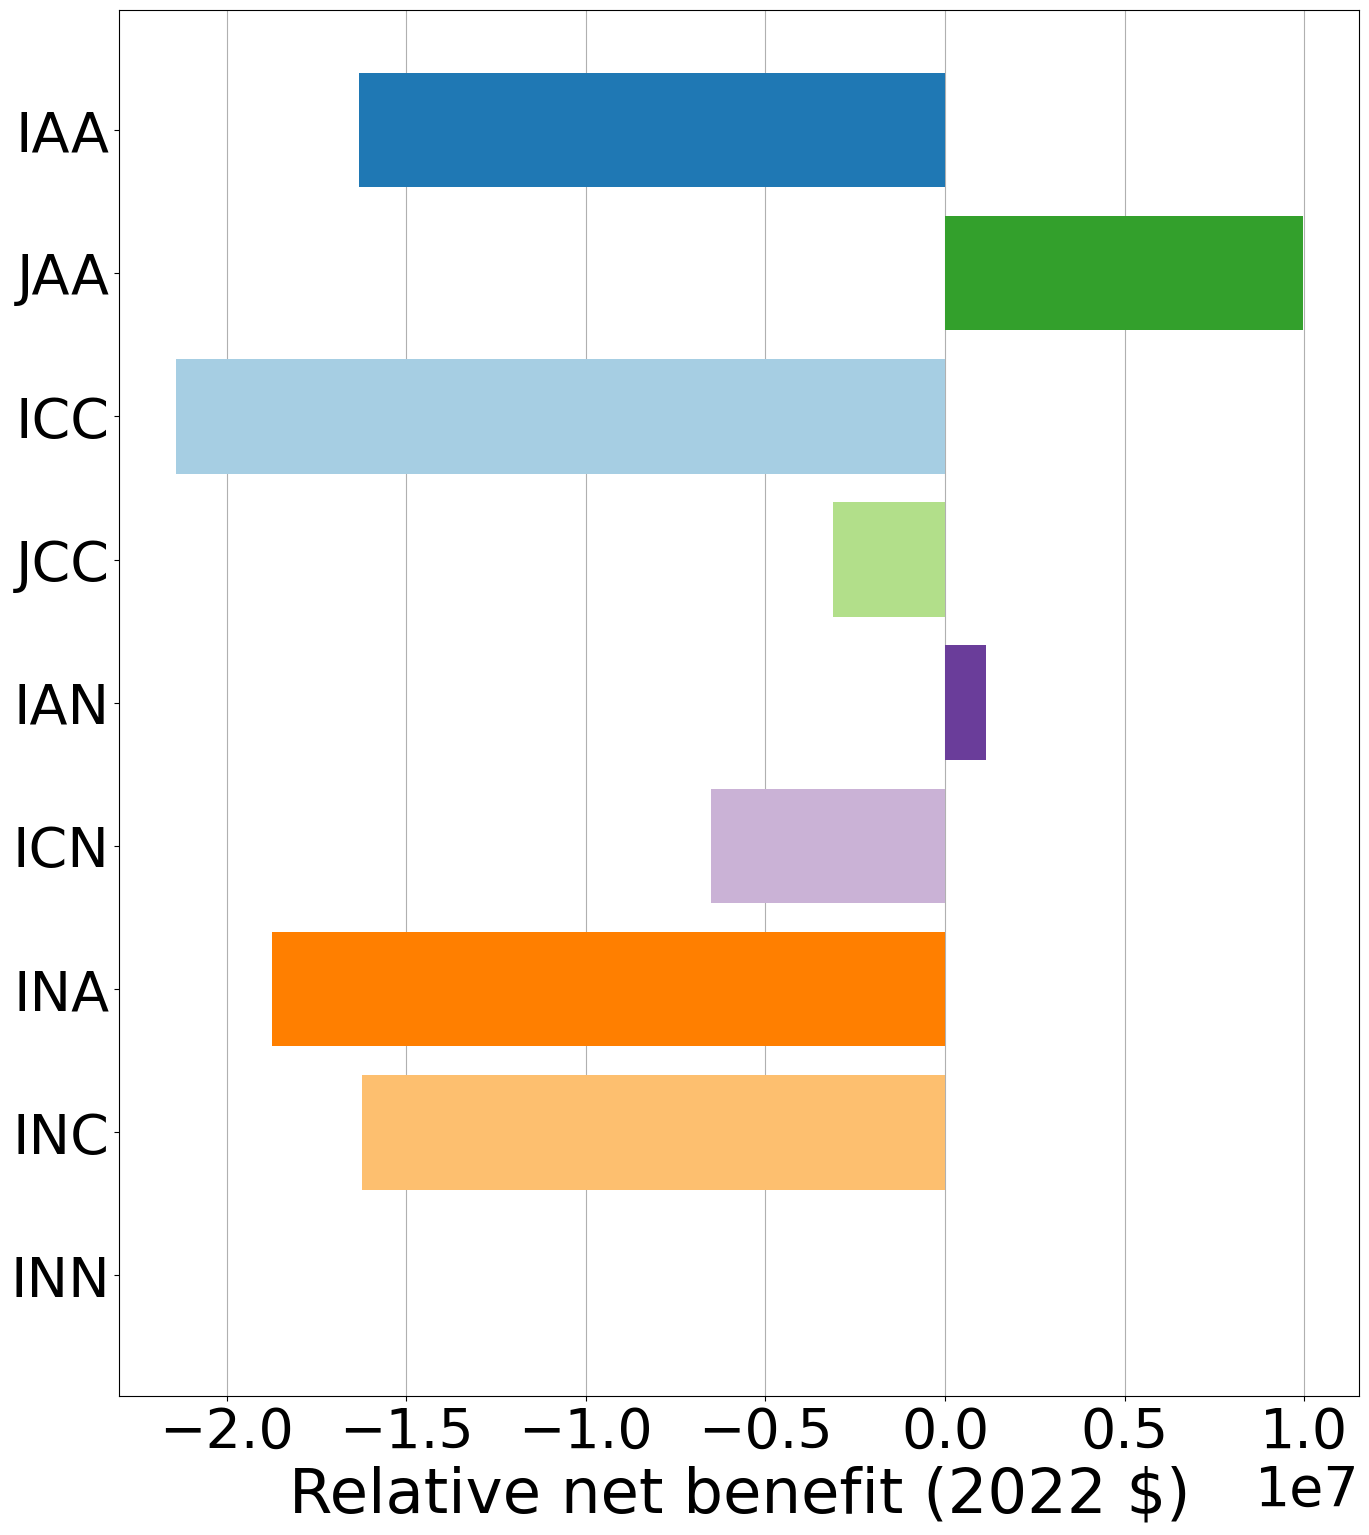

In [85]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

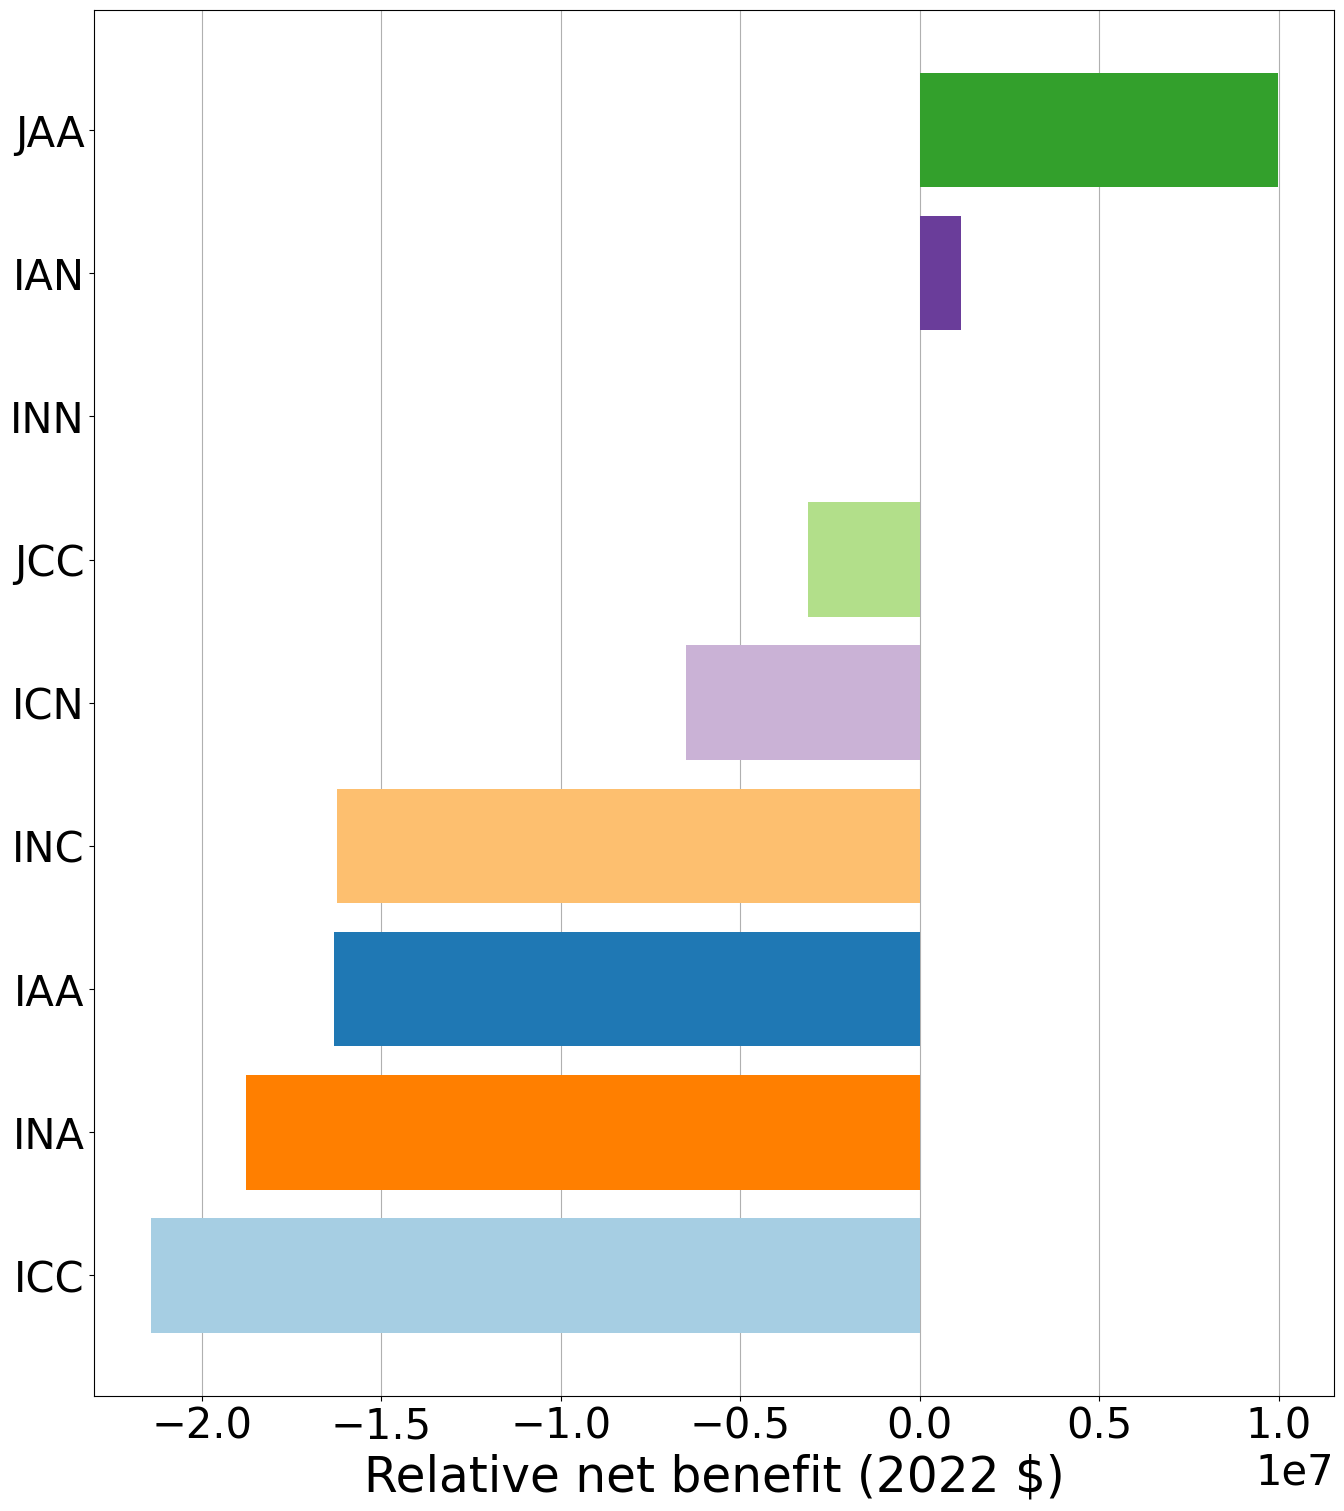

In [86]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit_relative['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit_relative.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Relative net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


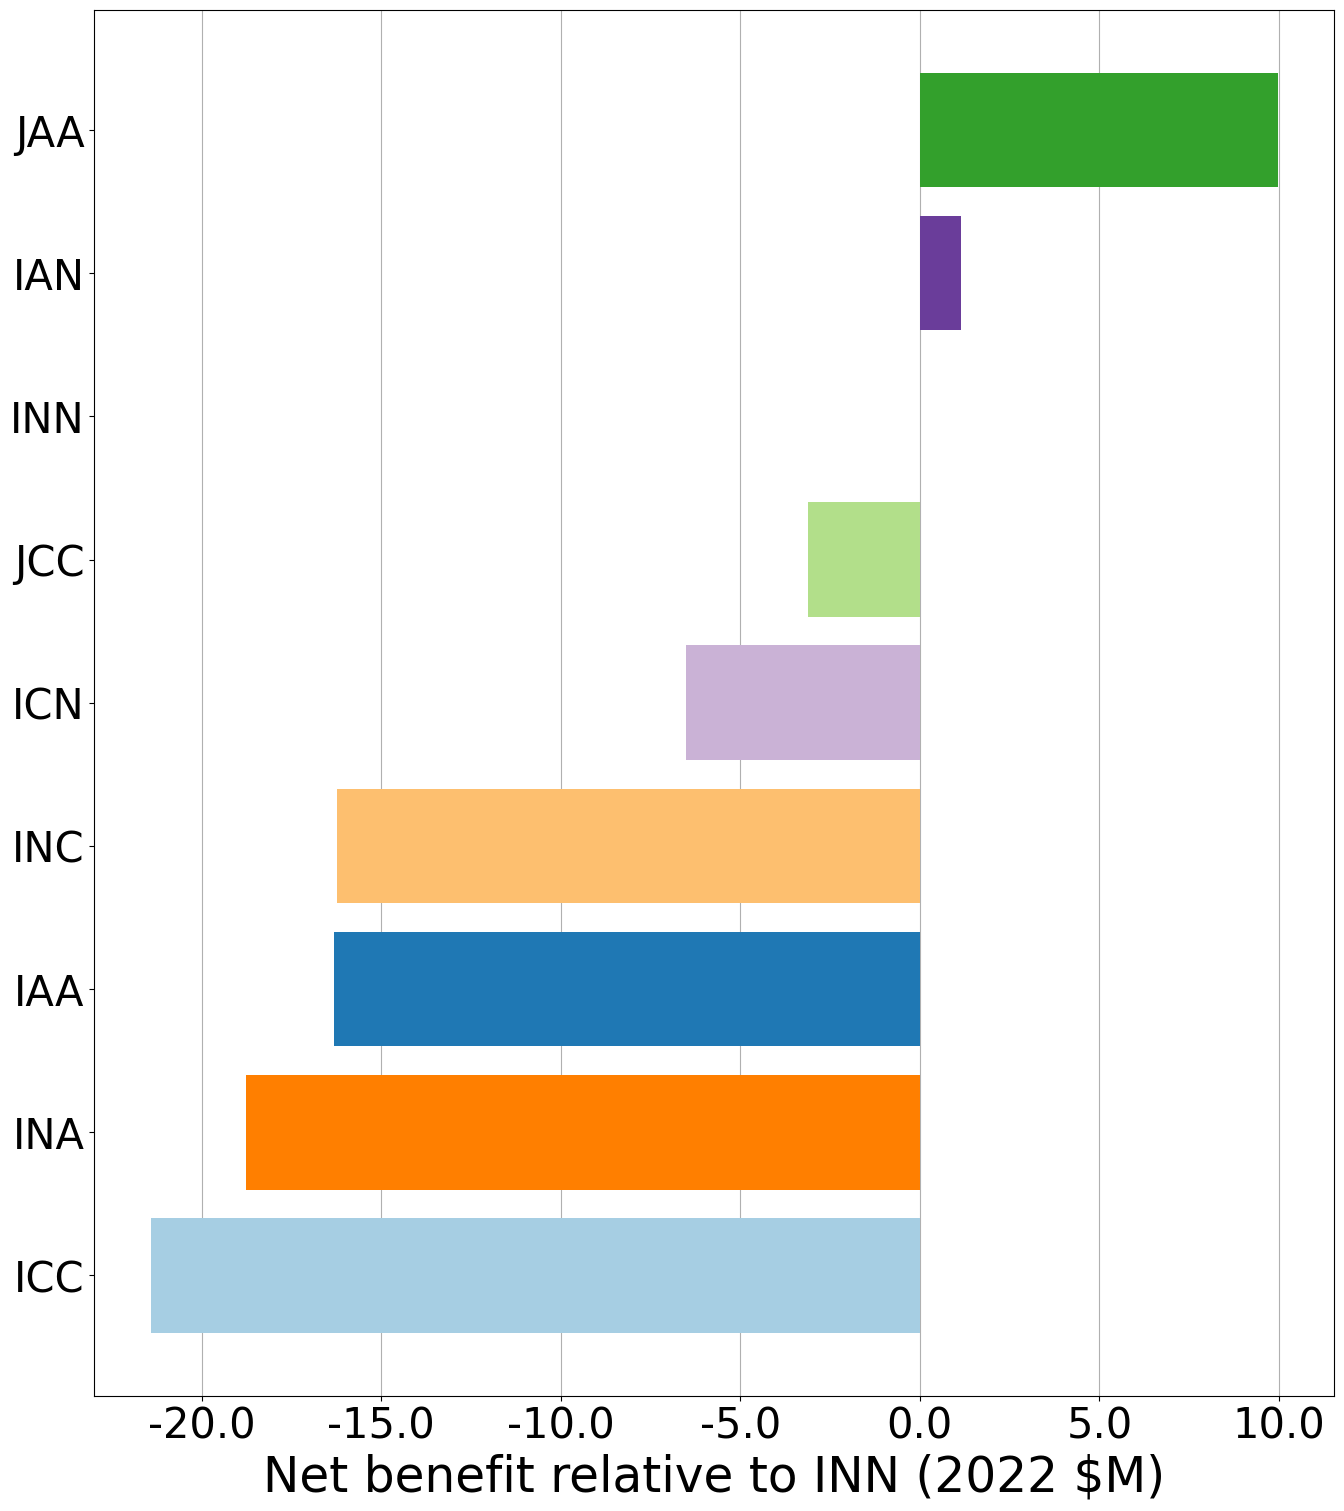

In [87]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit_relative['Strategy'] = ['INN', 'INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_net_benefit_relative.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Net benefit relative to INN (2022 $M)', fontsize=35)
plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [88]:
# plotting graph (Ver 02)
#ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
#plt.show()

<Axes: xlabel='Strategy', ylabel='Relative net benefit ($)'>

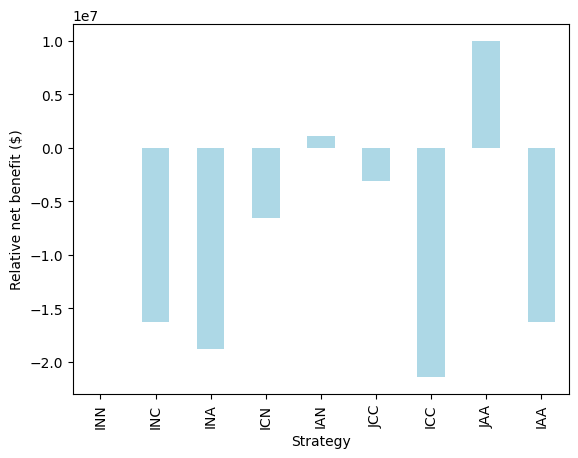

In [89]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [90]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [91]:
df_npv_cost_loss_benefit_relative

lifecycle_infrastructure  environmental_restoration        safety  \
Strategy                                                                      
INN                           0.00                      0.000  0.000000e+00   
INC                    21627916.00                1422186.244  9.018752e+05   
INA                    31371625.79                2968567.363  1.843400e+06   
ICN                    21158765.47                1422186.244  9.018752e+05   
IAN                    30988462.58                2968567.363  1.843400e+06   
JCC                    24398464.65                2844372.488  1.734364e+06   
ICC                    42696032.80                2844372.488  1.734364e+06   
JAA                    35987047.70                5937134.726  3.617414e+06   
IAA                    62269439.70                5937134.726  3.617414e+06   

          aesthetic_benefit  avoided_economic_losses  
Strategy                                              
INN            0.000000e+00             0.000000e+00  
INC            4.284824e+05             7.300006e+06  
INA            7.669424e+05             1.666418e+07  
ICN            4.284824e+05             1.655099e+07  
IAN            7.669424e+05             3.616700e+07  
JCC            8.569649e+05             2.500096e+07  
ICC            8.569649e+05             2.500096e+07  
JAA            1.533885e+06             5.398114e+07  
IAA            1.533885e+06             5.398114e+07

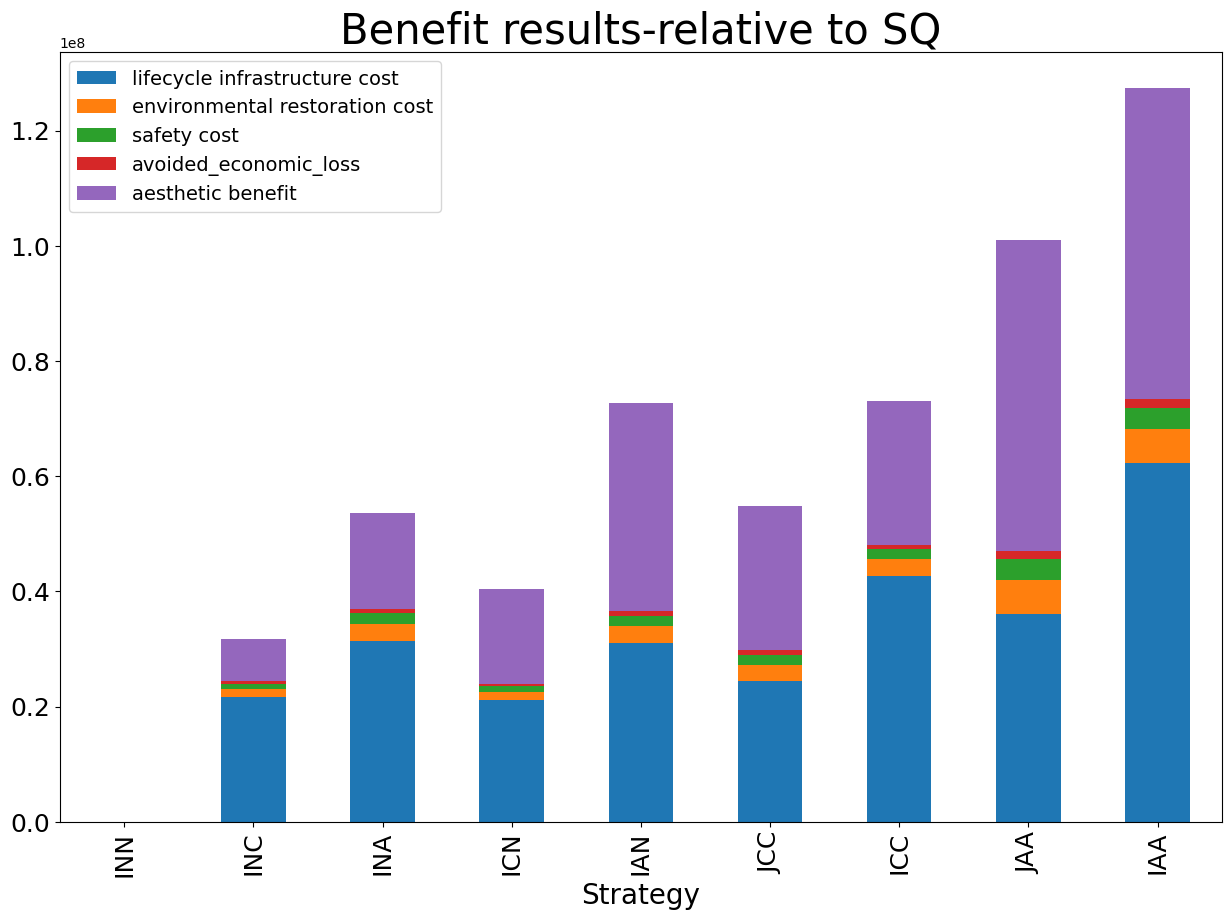

In [92]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','avoided_economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [93]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [94]:
df_npv_cost_relative

lifecycle_infrastructure  environmental_restoration        safety
Strategy                                                                   
INN                           0.00                      0.000  0.000000e+00
INC                    21627916.00                1422186.244  9.018752e+05
INA                    31371625.79                2968567.363  1.843400e+06
ICN                    21158765.47                1422186.244  9.018752e+05
IAN                    30988462.58                2968567.363  1.843400e+06
JCC                    24398464.65                2844372.488  1.734364e+06
ICC                    42696032.80                2844372.488  1.734364e+06
JAA                    35987047.70                5937134.726  3.617414e+06
IAA                    62269439.70                5937134.726  3.617414e+06

In [95]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

In [125]:
#fig,(ax) = plt.subplots()
#fig.set_size_inches(16, 18)

#x= df_npv_cost_relative.index
#issues_addressed = [10, 14, 0, 10, 15, 15]
#issues_pending = [5, 10, 50, 2, 0, 10]
#y1 = df_npv_cost_relative['lifecycle_infrastructure']
#y2 = df_npv_cost_relative['environmental_restoration']
#y3 = df_npv_cost_relative['safety']

#mpl.rcParams['hatch.linewidth'] = 3.0 


#b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

#b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

#b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

#plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

#a_val = 0.3

#circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
#circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
#circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

#ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
#plt.tight_layout()
#plt.xlabel("Relative Cost (2022 $)", fontsize=55)

#plt.xticks(fontsize=50)
#plt.yticks(fontsize=50)
#ax.xaxis.offsetText.set_fontsize(50)
#ax.yaxis.offsetText.set_fontsize(50)
#plt.grid(axis='x')
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

#plt.show()

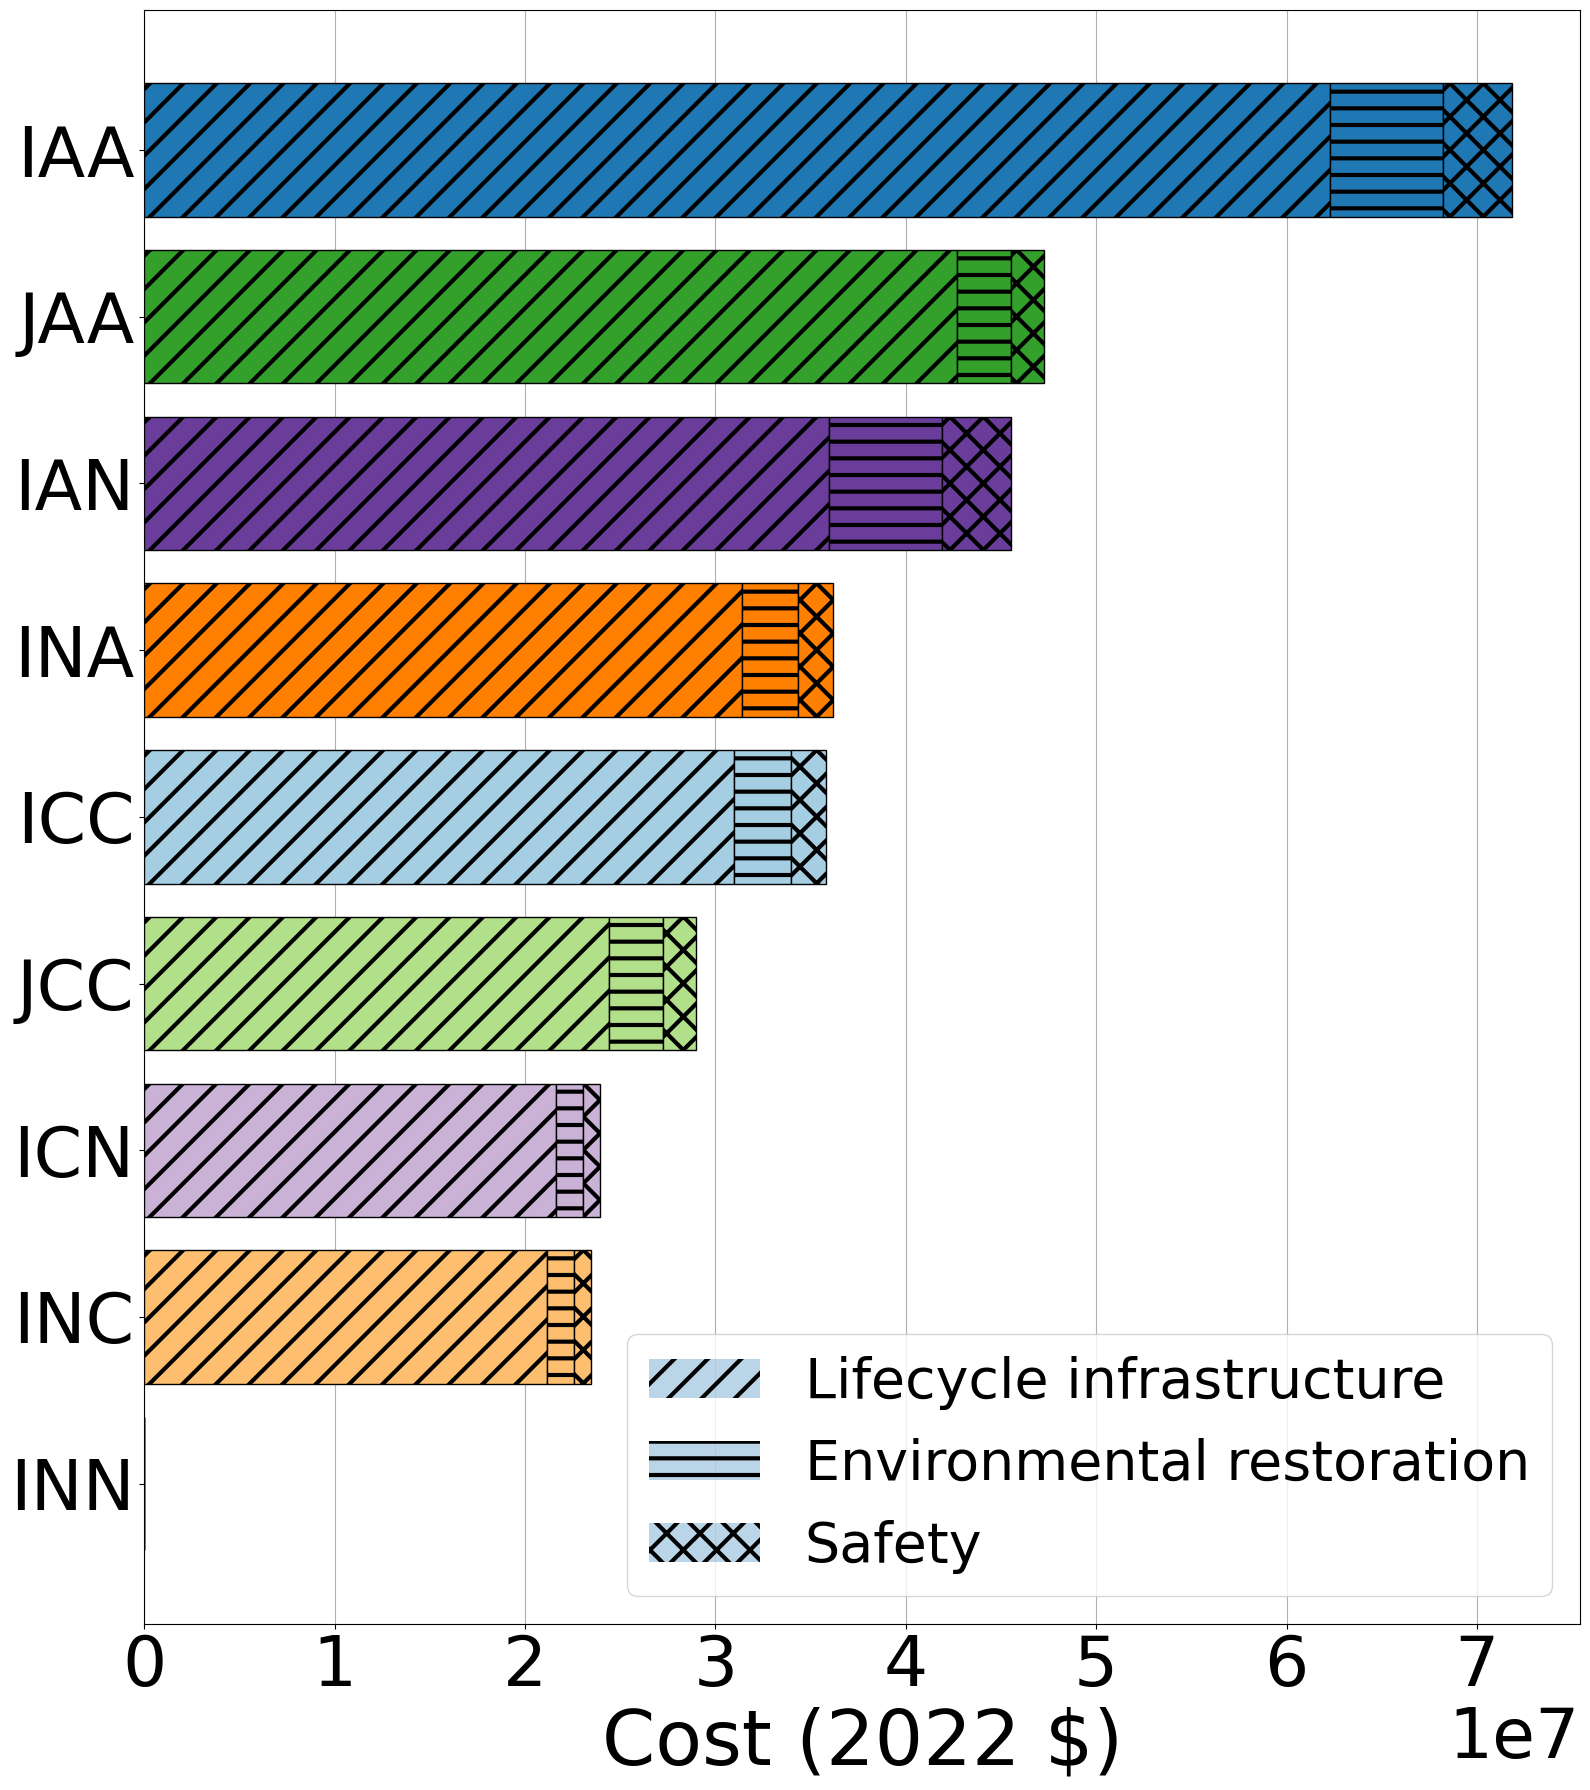

In [97]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost_relative is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost_relative['lifecycle_infrastructure'] + df_npv_cost_relative['environmental_restoration'] + df_npv_cost_relative['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost_relative.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost_relative.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost_relative.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost_relative.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost_relative.index, labels=['INN','INC','ICN','JCC','ICC','INA','IAN','JAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [98]:
### Pareto plot



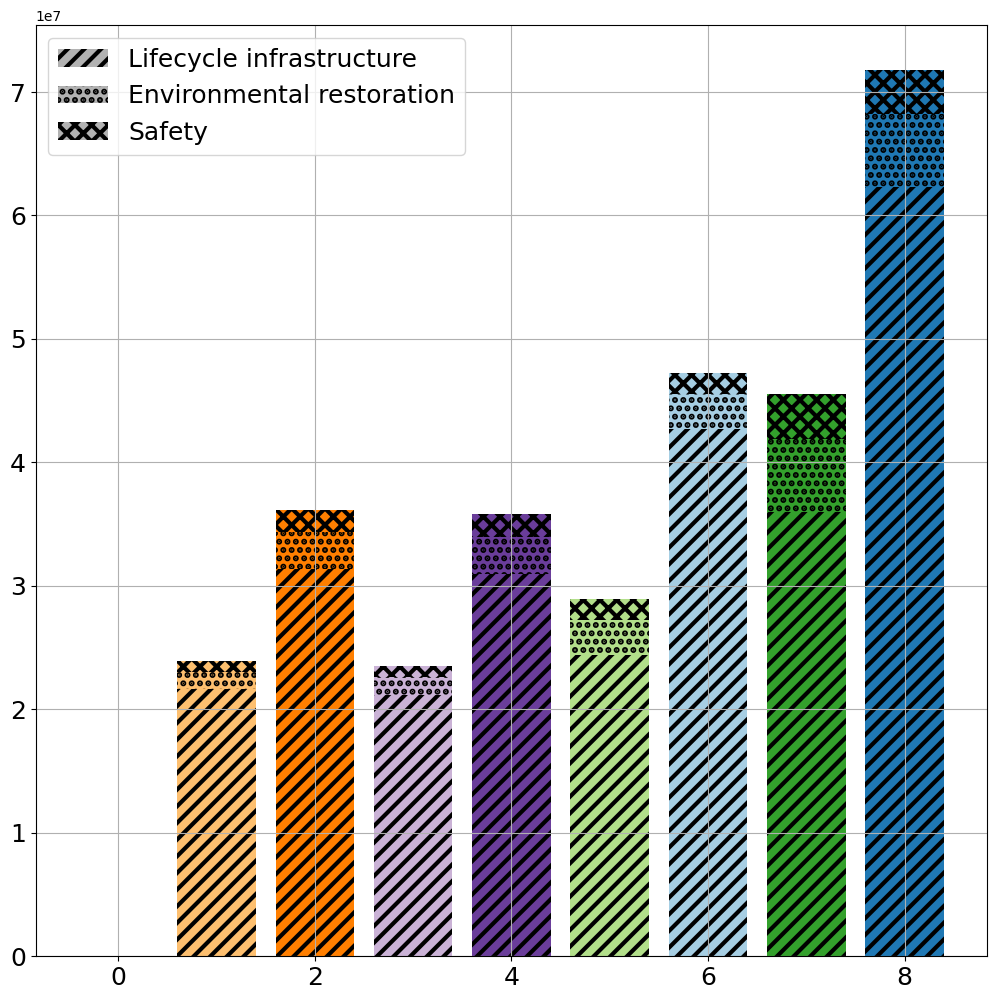

In [99]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

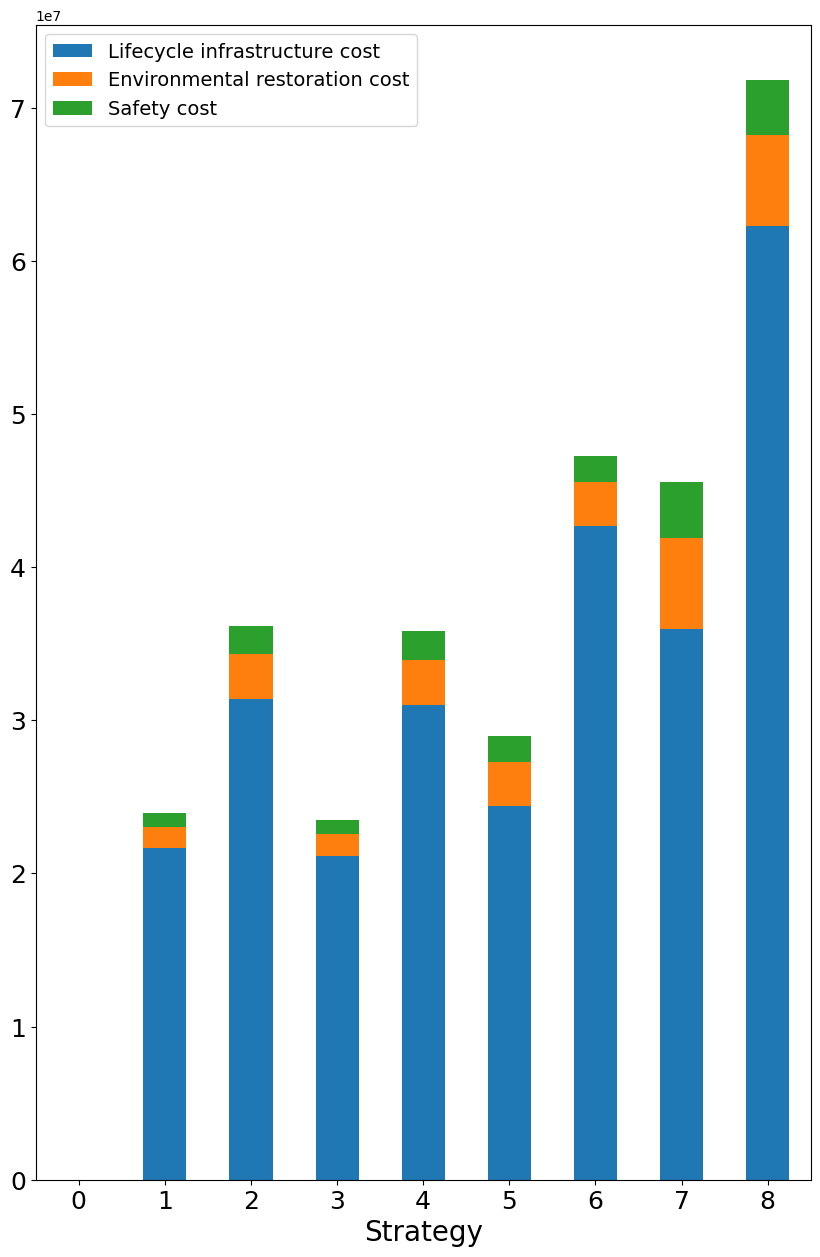

In [100]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)

In [101]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [102]:
df_npv_loss_relative

avoided_economic_losses
Strategy                         
INN                  0.000000e+00
INC                  7.300006e+06
INA                  1.666418e+07
ICN                  1.655099e+07
IAN                  3.616700e+07
JCC                  2.500096e+07
ICC                  2.500096e+07
JAA                  5.398114e+07
IAA                  5.398114e+07

In [103]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

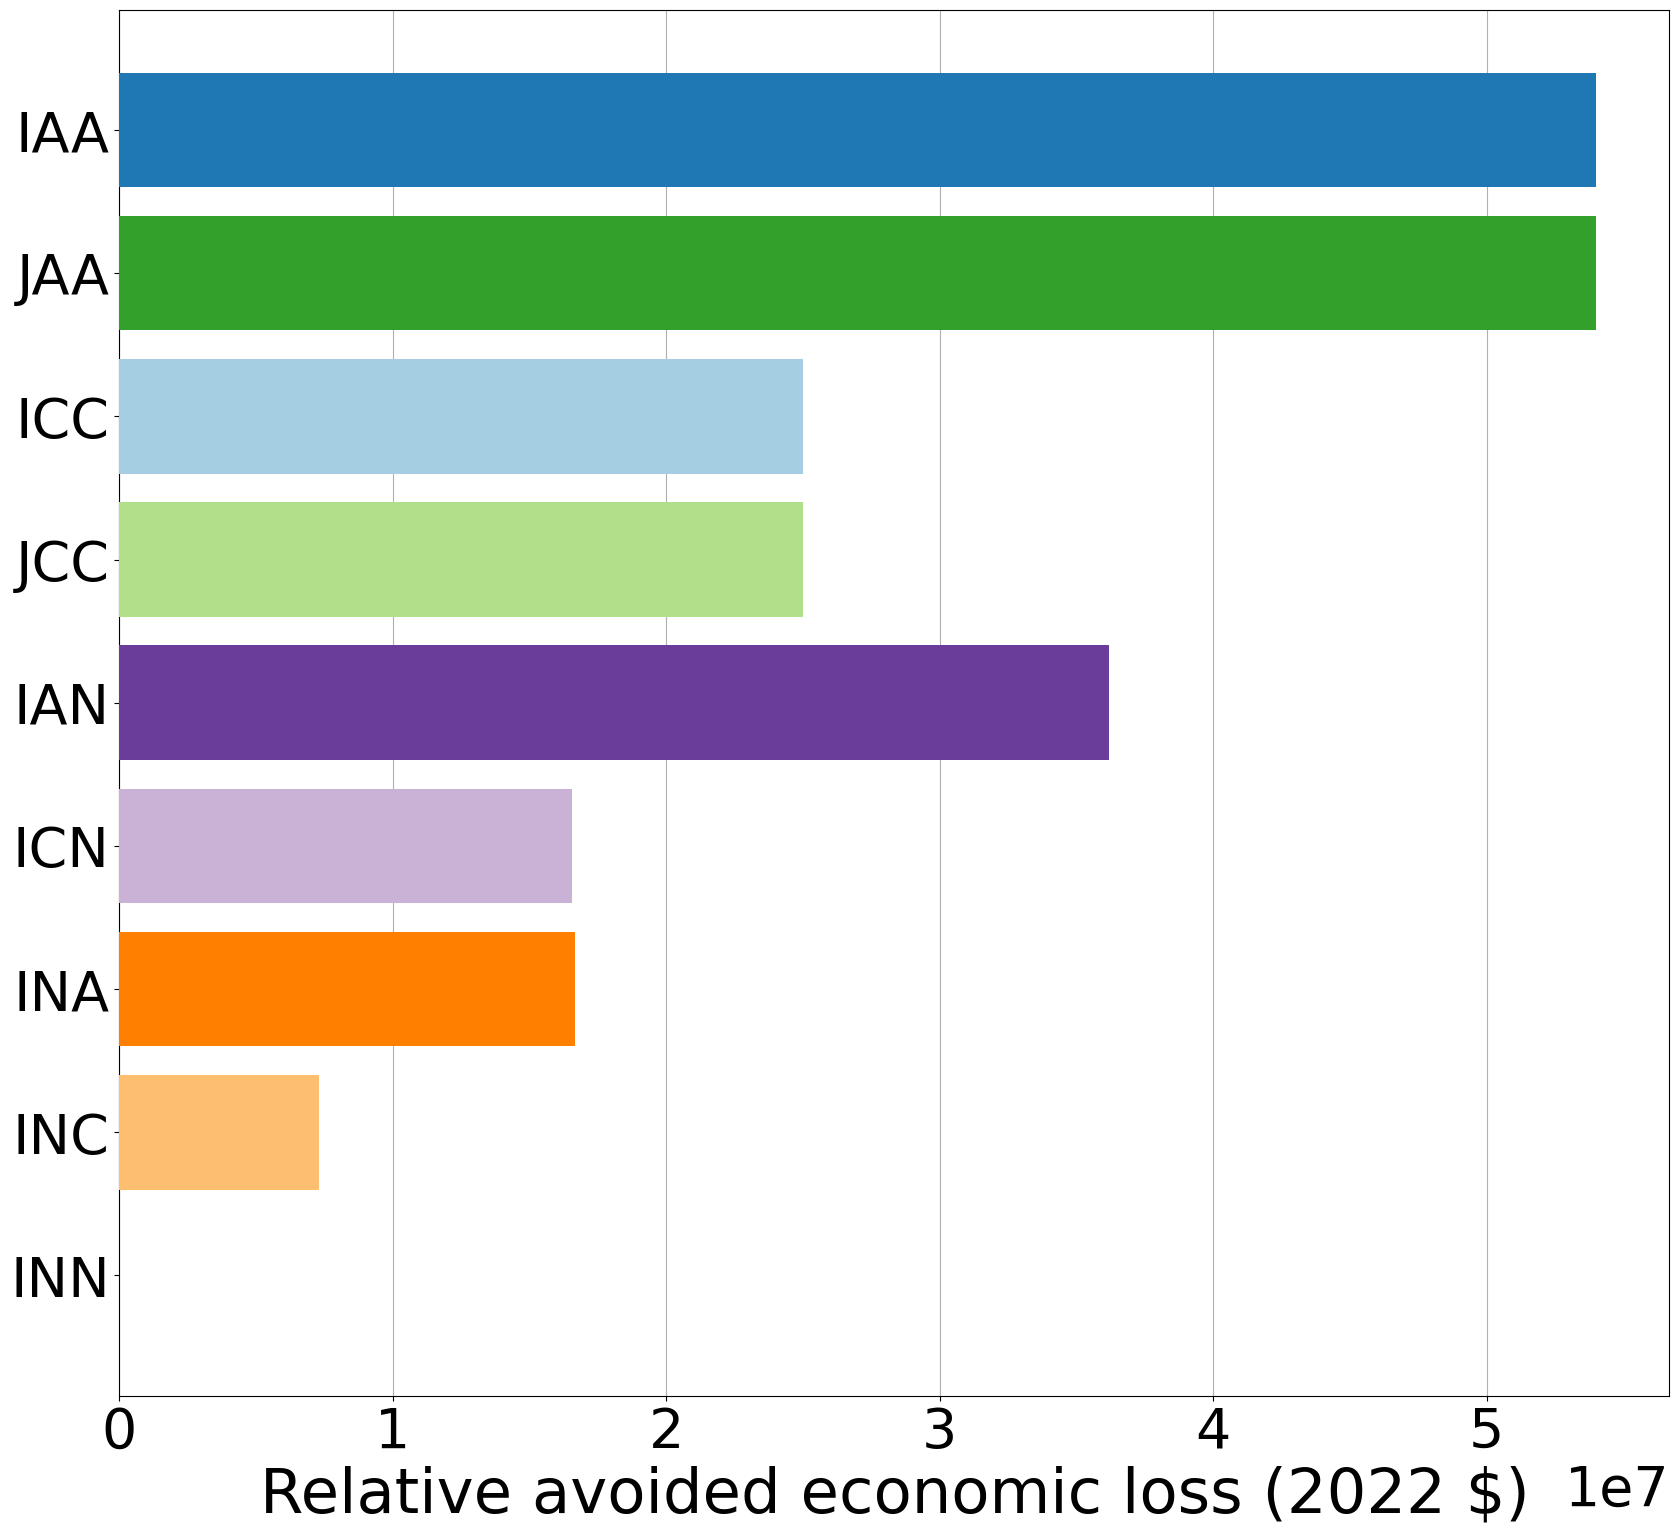

In [104]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [105]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.yticks(fontsize=18)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

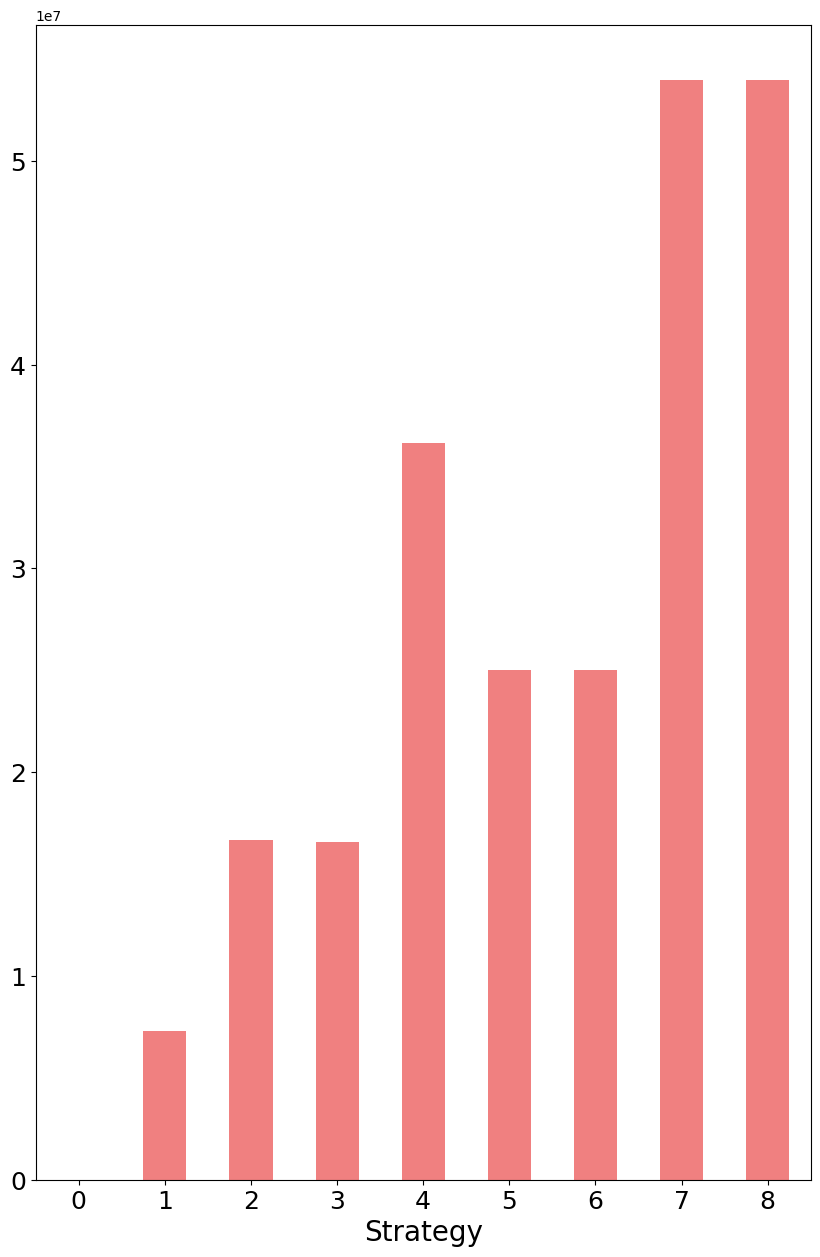

In [106]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [107]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [108]:
#df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

In [109]:
df_npv_benefit_relative = df_npv_benefit_relative.reset_index()
df_npv_benefit_relative

Strategy  aesthetic_benefit
0      INN       0.000000e+00
1      INC       4.284824e+05
2      INA       7.669424e+05
3      ICN       4.284824e+05
4      IAN       7.669424e+05
5      JCC       8.569649e+05
6      ICC       8.569649e+05
7      JAA       1.533885e+06
8      IAA       1.533885e+06

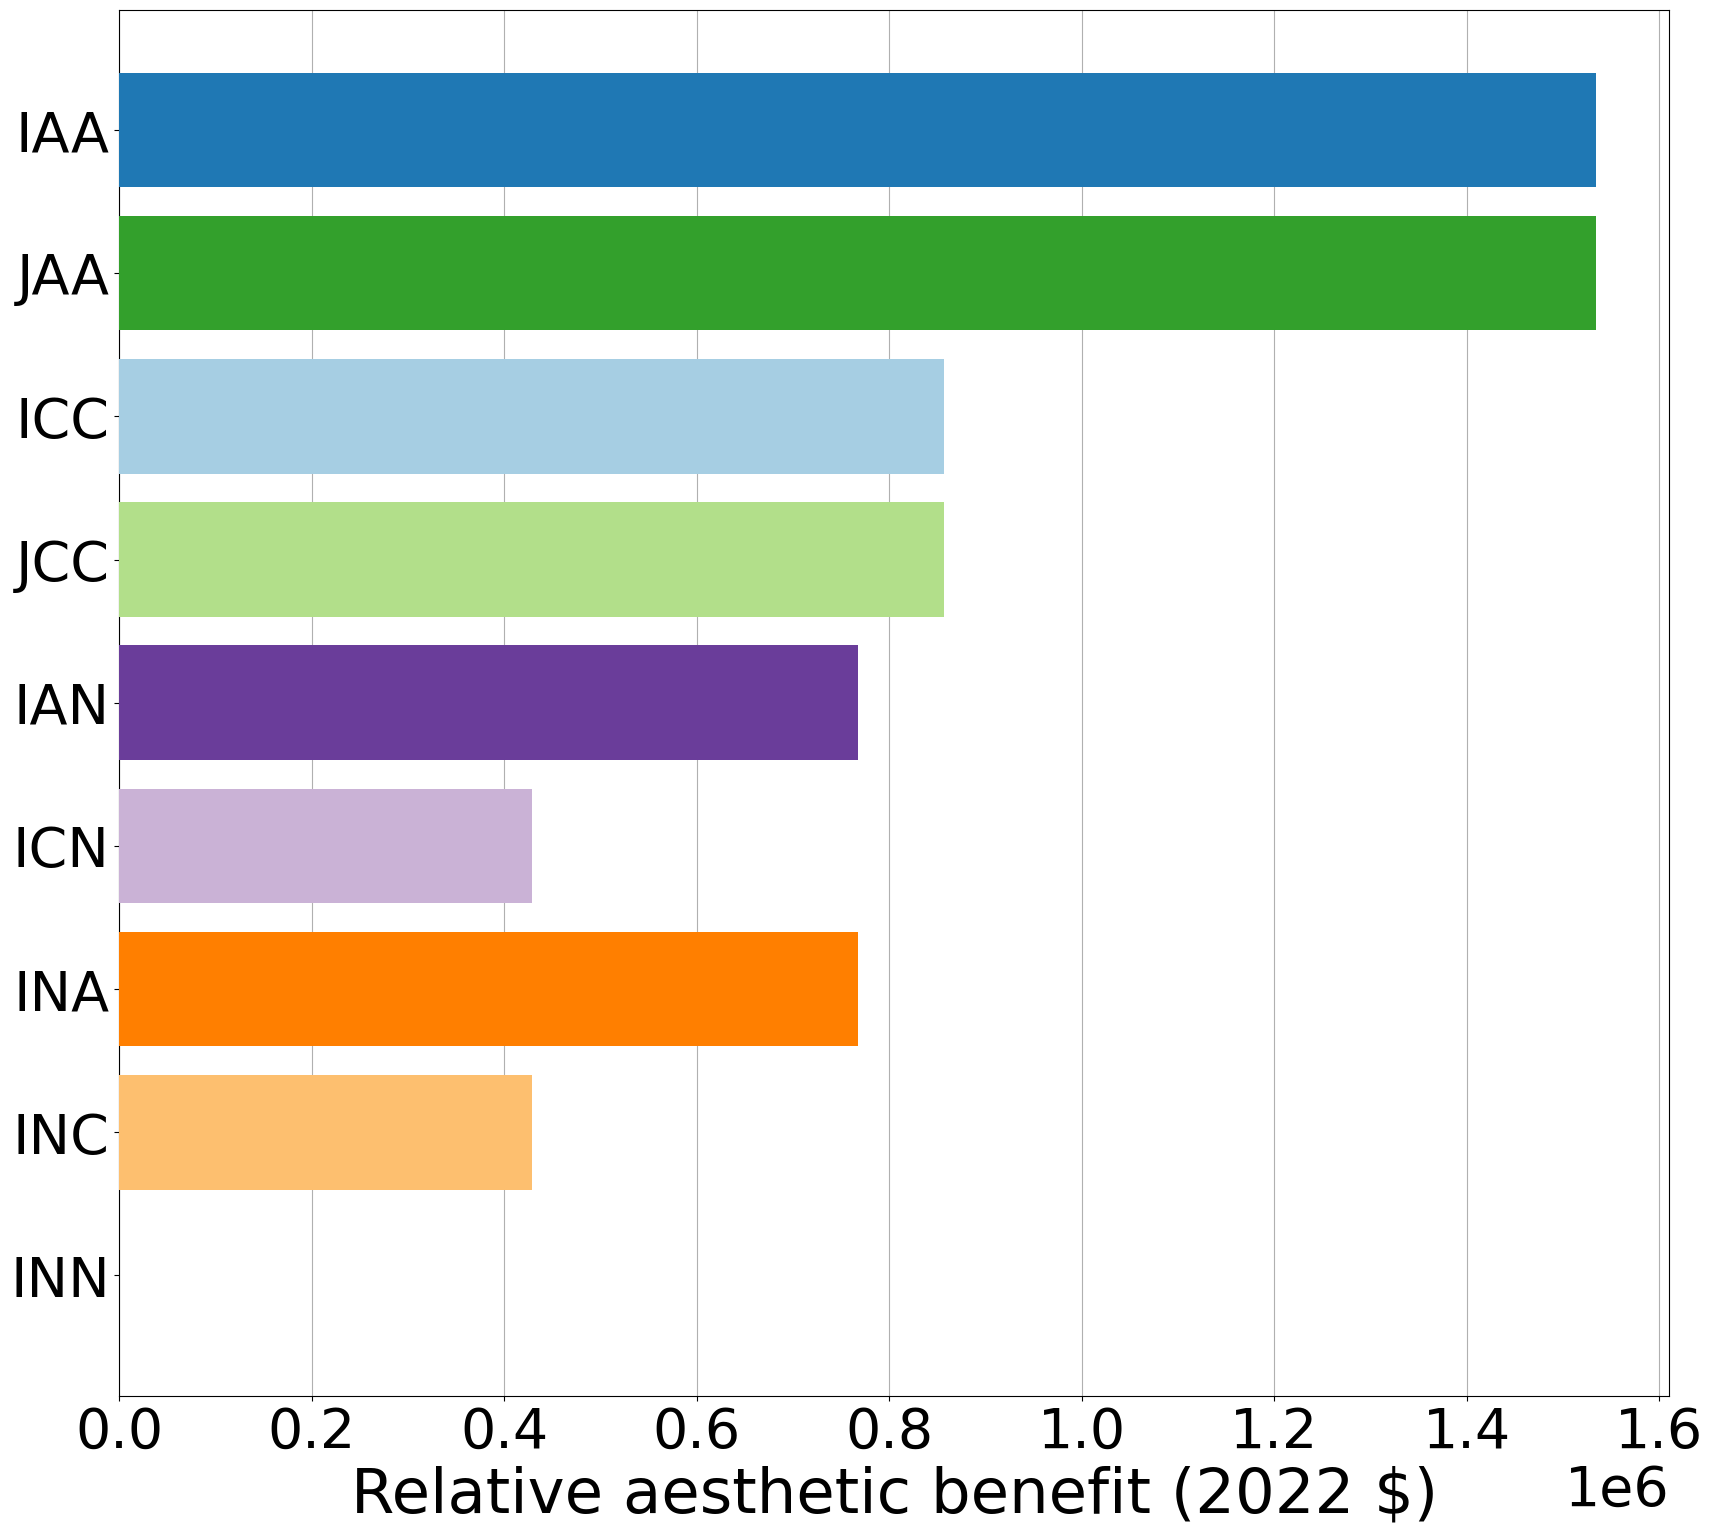

In [110]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [111]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
##plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=26)
#plt.yticks(fontsize=26)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

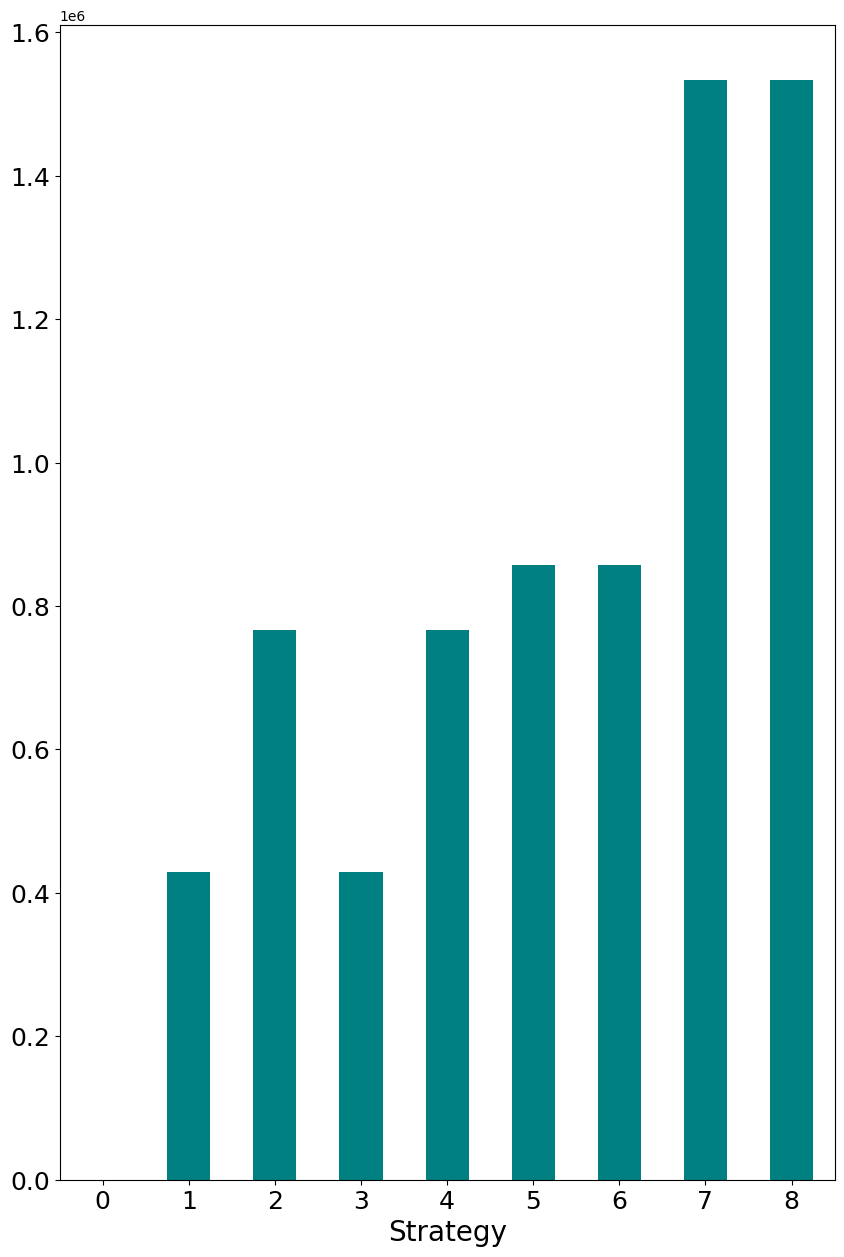

In [112]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [113]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                   4.938831e+06                      0.000  2027896.426   
INC                   2.656675e+07                1422186.244  2929771.670   
INA                   3.631046e+07                2968567.363  3871296.702   
ICN                   2.609760e+07                1422186.244  2929771.670   
IAN                   3.592729e+07                2968567.363  3871296.702   
JCC                   2.933730e+07                2844372.488  3762260.620   
ICC                   4.763486e+07                2844372.488  3762260.620   
JAA                   4.092588e+07                5937134.726  5645310.683   
IAA                   6.720827e+07                5937134.726  5645310.683   

            total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                             
INN       6.966728e+06       0.000000e+00             0.000000e+00   
INC       3.091871e+07       4.284824e+05             7.300006e+06   
INA       4.315032e+07       7.669424e+05             1.666418e+07   
ICN       3.044955e+07       4.284824e+05             1.655099e+07   
IAN       4.276716e+07       7.669424e+05             3.616700e+07   
JCC       3.594393e+07       8.569649e+05             2.500096e+07   
ICC       5.424150e+07       8.569649e+05             2.500096e+07   
JAA       5.250832e+07       1.533885e+06             5.398114e+07   
IAA       7.879072e+07       1.533885e+06             5.398114e+07   

           net_benefit  
Strategy                
INN      -6.966728e+06  
INC      -2.319022e+07  
INA      -2.571920e+07  
ICN      -1.347009e+07  
IAN      -5.833213e+06  
JCC      -1.008601e+07  
ICC      -2.838358e+07  
JAA       3.006705e+06  
IAA      -2.327569e+07

In [114]:
df_npv_cost_loss_benefit['benefit_loss']=df_npv_cost_loss_benefit['aesthetic_benefit']+df_npv_cost_loss_benefit['avoided_economic_losses']
df_npv_cost_loss_benefit['cost_benefit_ratio']=df_npv_cost_loss_benefit['total_cost']/df_npv_cost_loss_benefit['benefit_loss']
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                   4.938831e+06                      0.000  2027896.426   
INC                   2.656675e+07                1422186.244  2929771.670   
INA                   3.631046e+07                2968567.363  3871296.702   
ICN                   2.609760e+07                1422186.244  2929771.670   
IAN                   3.592729e+07                2968567.363  3871296.702   
JCC                   2.933730e+07                2844372.488  3762260.620   
ICC                   4.763486e+07                2844372.488  3762260.620   
JAA                   4.092588e+07                5937134.726  5645310.683   
IAA                   6.720827e+07                5937134.726  5645310.683   

            total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                             
INN       6.966728e+06       0.000000e+00             0.000000e+00   
INC       3.091871e+07       4.284824e+05             7.300006e+06   
INA       4.315032e+07       7.669424e+05             1.666418e+07   
ICN       3.044955e+07       4.284824e+05             1.655099e+07   
IAN       4.276716e+07       7.669424e+05             3.616700e+07   
JCC       3.594393e+07       8.569649e+05             2.500096e+07   
ICC       5.424150e+07       8.569649e+05             2.500096e+07   
JAA       5.250832e+07       1.533885e+06             5.398114e+07   
IAA       7.879072e+07       1.533885e+06             5.398114e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INN      -6.966728e+06  0.000000e+00                 inf  
INC      -2.319022e+07  7.728489e+06            4.000615  
INA      -2.571920e+07  1.743112e+07            2.475476  
ICN      -1.347009e+07  1.697947e+07            1.793316  
IAN      -5.833213e+06  3.693395e+07            1.157936  
JCC      -1.008601e+07  2.585792e+07            1.390055  
ICC      -2.838358e+07  2.585792e+07            2.097674  
JAA       3.006705e+06  5.551503e+07            0.945840  
IAA      -2.327569e+07  5.551503e+07            1.419268

In [115]:
df_pareto_plots=df_npv_cost_loss_benefit.copy()

In [116]:
df_pareto_plots=df_pareto_plots.loc[df_pareto_plots.index!='INN']
df_pareto_plots

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INC                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
ICN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
JCC                    29337295.98                2844372.488  3762260.620   
ICC                    47634864.12                2844372.488  3762260.620   
JAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INC       30918705.24       4.284824e+05             7.300006e+06   
INA       43150321.18       7.669424e+05             1.666418e+07   
ICN       30449554.71       4.284824e+05             1.655099e+07   
IAN       42767157.97       7.669424e+05             3.616700e+07   
JCC       35943929.09       8.569649e+05             2.500096e+07   
ICC       54241497.23       8.569649e+05             2.500096e+07   
JAA       52508324.43       1.533885e+06             5.398114e+07   
IAA       78790716.43       1.533885e+06             5.398114e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INC      -2.319022e+07  7.728489e+06            4.000615  
INA      -2.571920e+07  1.743112e+07            2.475476  
ICN      -1.347009e+07  1.697947e+07            1.793316  
IAN      -5.833213e+06  3.693395e+07            1.157936  
JCC      -1.008601e+07  2.585792e+07            1.390055  
ICC      -2.838358e+07  2.585792e+07            2.097674  
JAA       3.006705e+06  5.551503e+07            0.945840  
IAA      -2.327569e+07  5.551503e+07            1.419268

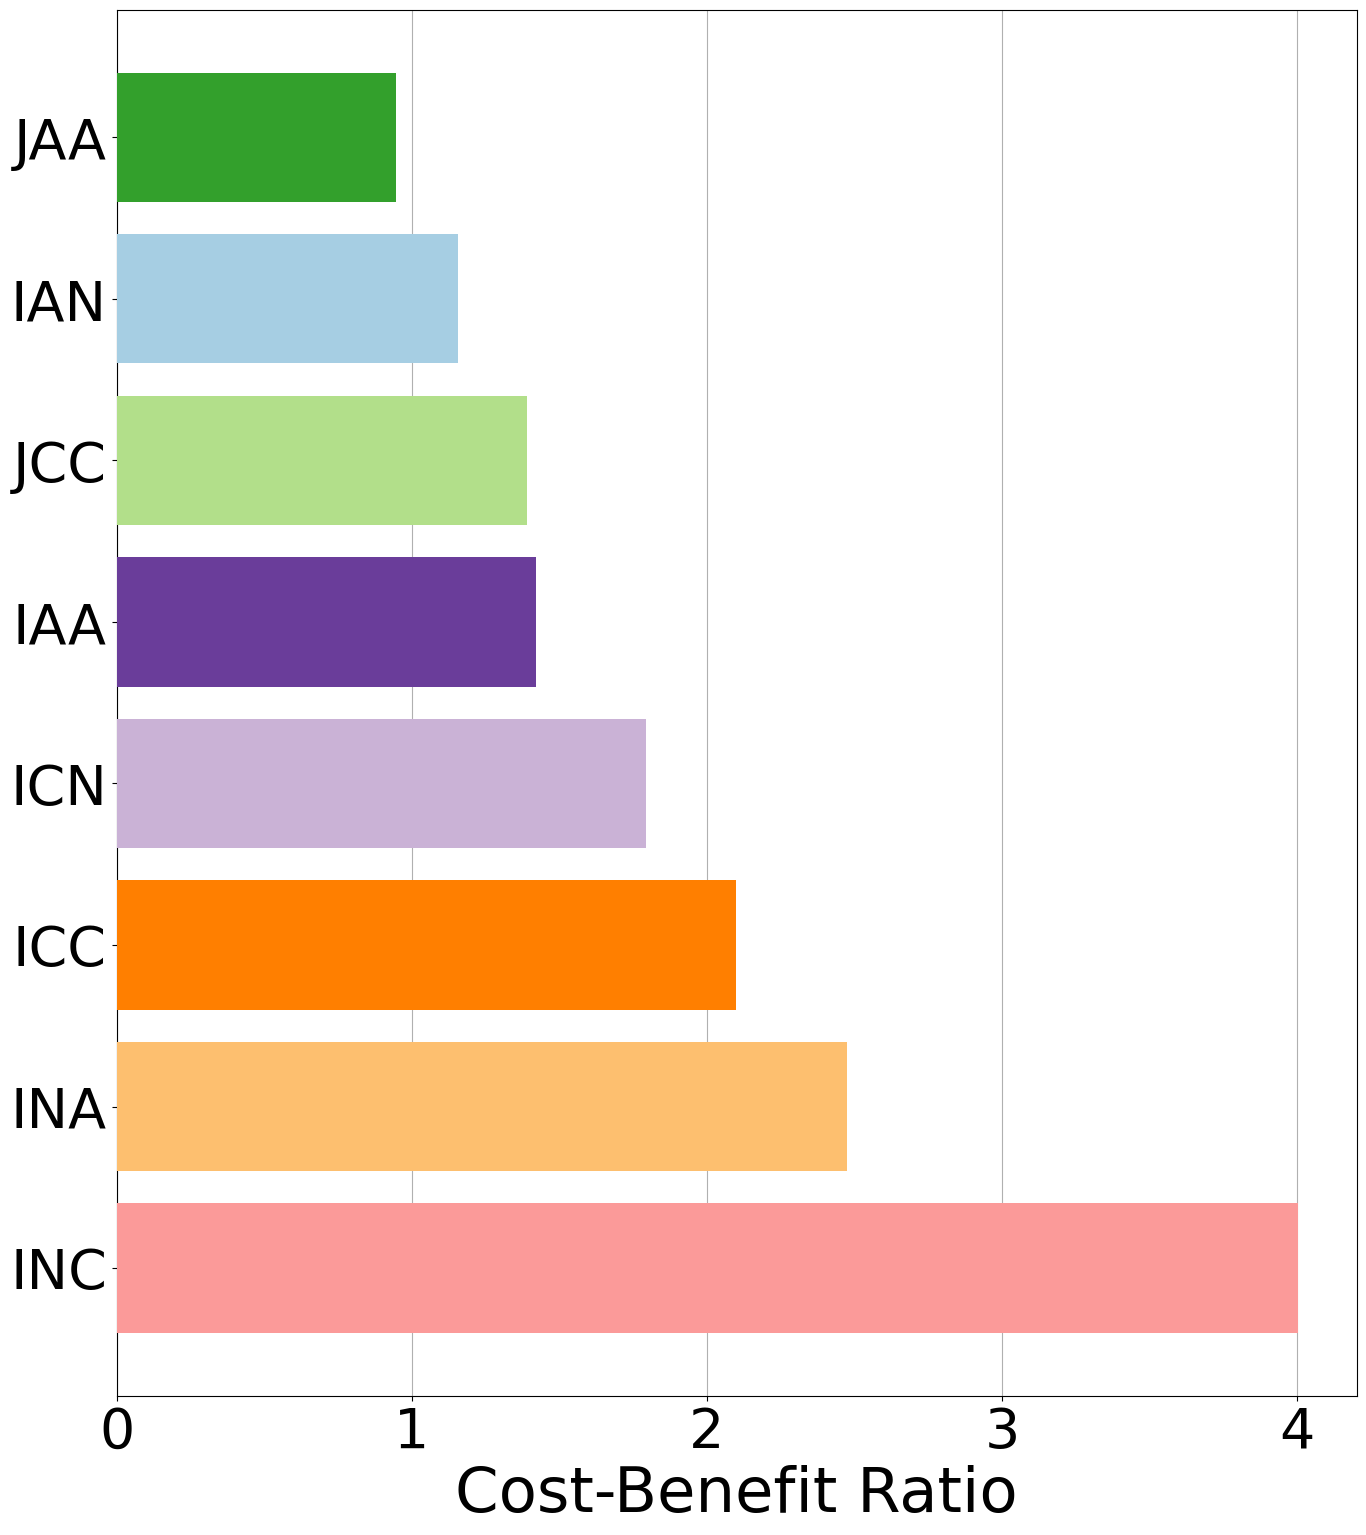

In [117]:
# Sorting the DataFrame based on 'cost_benefit_ratio'
df_pareto_sorted = df_pareto_plots.sort_values(by='cost_benefit_ratio', ascending=False)

# Colors as specified by user
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

# Creating the Pareto plot
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_pareto_sorted.index, df_pareto_sorted['cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)], zorder=3)
ax.set_xlabel('Cost-Benefit Ratio', fontsize=45)
#ax.set_xticks(fontsize=40)
#ax.set_yticks(fontsize=40)
ax.tick_params(axis='x', labelsize=40)  
ax.tick_params(axis='y', labelsize=40)  
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.show()

In [118]:
df_pareto_sorted['log_of_cost_benefit_ratio']=np.log(df_pareto_sorted['cost_benefit_ratio'])
df_pareto_sorted

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INC                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
ICC                    47634864.12                2844372.488  3762260.620   
ICN                    26097596.80                1422186.244  2929771.670   
IAA                    67208271.02                5937134.726  5645310.683   
JCC                    29337295.98                2844372.488  3762260.620   
IAN                    35927293.91                2968567.363  3871296.702   
JAA                    40925879.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INC       30918705.24       4.284824e+05             7.300006e+06   
INA       43150321.18       7.669424e+05             1.666418e+07   
ICC       54241497.23       8.569649e+05             2.500096e+07   
ICN       30449554.71       4.284824e+05             1.655099e+07   
IAA       78790716.43       1.533885e+06             5.398114e+07   
JCC       35943929.09       8.569649e+05             2.500096e+07   
IAN       42767157.97       7.669424e+05             3.616700e+07   
JAA       52508324.43       1.533885e+06             5.398114e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  \
Strategy                                                   
INC      -2.319022e+07  7.728489e+06            4.000615   
INA      -2.571920e+07  1.743112e+07            2.475476   
ICC      -2.838358e+07  2.585792e+07            2.097674   
ICN      -1.347009e+07  1.697947e+07            1.793316   
IAA      -2.327569e+07  5.551503e+07            1.419268   
JCC      -1.008601e+07  2.585792e+07            1.390055   
IAN      -5.833213e+06  3.693395e+07            1.157936   
JAA       3.006705e+06  5.551503e+07            0.945840   

          log_of_cost_benefit_ratio  
Strategy                             
INC                        1.386448  
INA                        0.906433  
ICC                        0.740829  
ICN                        0.584066  
IAA                        0.350141  
JCC                        0.329343  
IAN                        0.146639  
JAA                       -0.055682

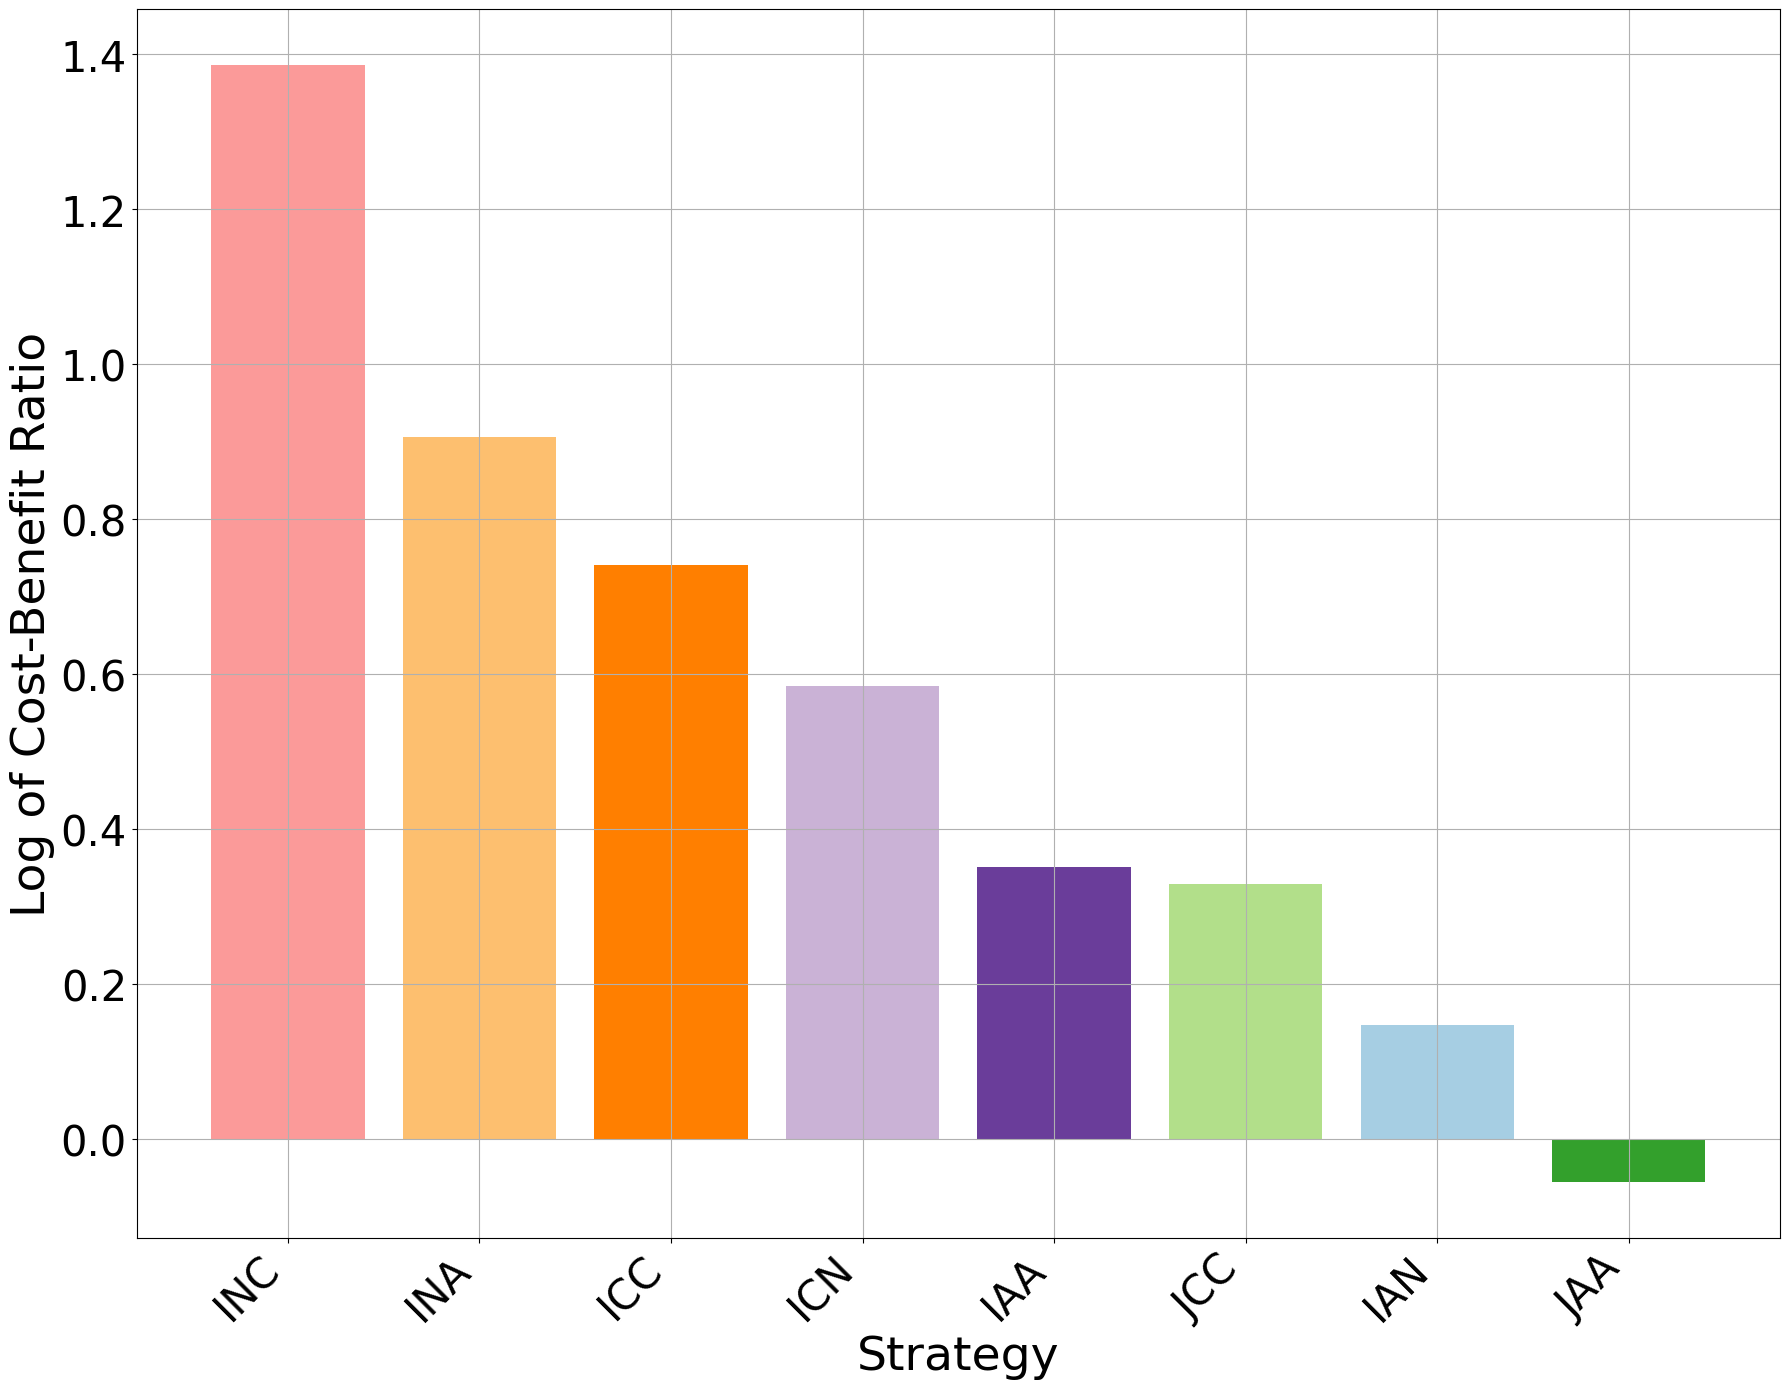

In [119]:
# Calculate cumulative percentage
df_pareto_sorted['cumulative_pct'] = df_pareto_sorted['log_of_cost_benefit_ratio'].cumsum() / df_pareto_sorted['log_of_cost_benefit_ratio'].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
bar_positions = range(len(df_pareto_sorted))
bars = ax.bar(bar_positions, df_pareto_sorted['log_of_cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])

# Set strategies as x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_pareto_sorted.index, rotation=45, ha="right")

# Plot the cumulative percentage line
# Note: We need to ensure the line starts at the first bar and ends at the last one accurately
#ax2 = ax.twinx()
#ax2.plot(bar_positions, df_pareto_sorted['cumulative_pct'], color='black', marker='o', linestyle='-', linewidth=2, ms=10)

# Labeling
ax.set_xlabel('Strategy', fontsize=34)
ax.set_ylabel('Log of Cost-Benefit Ratio', fontsize=34)
#ax2.set_ylabel('Cumulative Percentage (%)', fontsize=34)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30)  
#ax2.tick_params(axis='y', labelsize=30)  

plt.grid(True)
plt.tight_layout()
plt.show()


In [120]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                   4.938831e+06                      0.000  2027896.426   
INC                   2.656675e+07                1422186.244  2929771.670   
INA                   3.631046e+07                2968567.363  3871296.702   
ICN                   2.609760e+07                1422186.244  2929771.670   
IAN                   3.592729e+07                2968567.363  3871296.702   
JCC                   2.933730e+07                2844372.488  3762260.620   
ICC                   4.763486e+07                2844372.488  3762260.620   
JAA                   4.092588e+07                5937134.726  5645310.683   
IAA                   6.720827e+07                5937134.726  5645310.683   

            total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                             
INN       6.966728e+06       0.000000e+00             0.000000e+00   
INC       3.091871e+07       4.284824e+05             7.300006e+06   
INA       4.315032e+07       7.669424e+05             1.666418e+07   
ICN       3.044955e+07       4.284824e+05             1.655099e+07   
IAN       4.276716e+07       7.669424e+05             3.616700e+07   
JCC       3.594393e+07       8.569649e+05             2.500096e+07   
ICC       5.424150e+07       8.569649e+05             2.500096e+07   
JAA       5.250832e+07       1.533885e+06             5.398114e+07   
IAA       7.879072e+07       1.533885e+06             5.398114e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INN      -6.966728e+06  0.000000e+00                 inf  
INC      -2.319022e+07  7.728489e+06            4.000615  
INA      -2.571920e+07  1.743112e+07            2.475476  
ICN      -1.347009e+07  1.697947e+07            1.793316  
IAN      -5.833213e+06  3.693395e+07            1.157936  
JCC      -1.008601e+07  2.585792e+07            1.390055  
ICC      -2.838358e+07  2.585792e+07            2.097674  
JAA       3.006705e+06  5.551503e+07            0.945840  
IAA      -2.327569e+07  5.551503e+07            1.419268

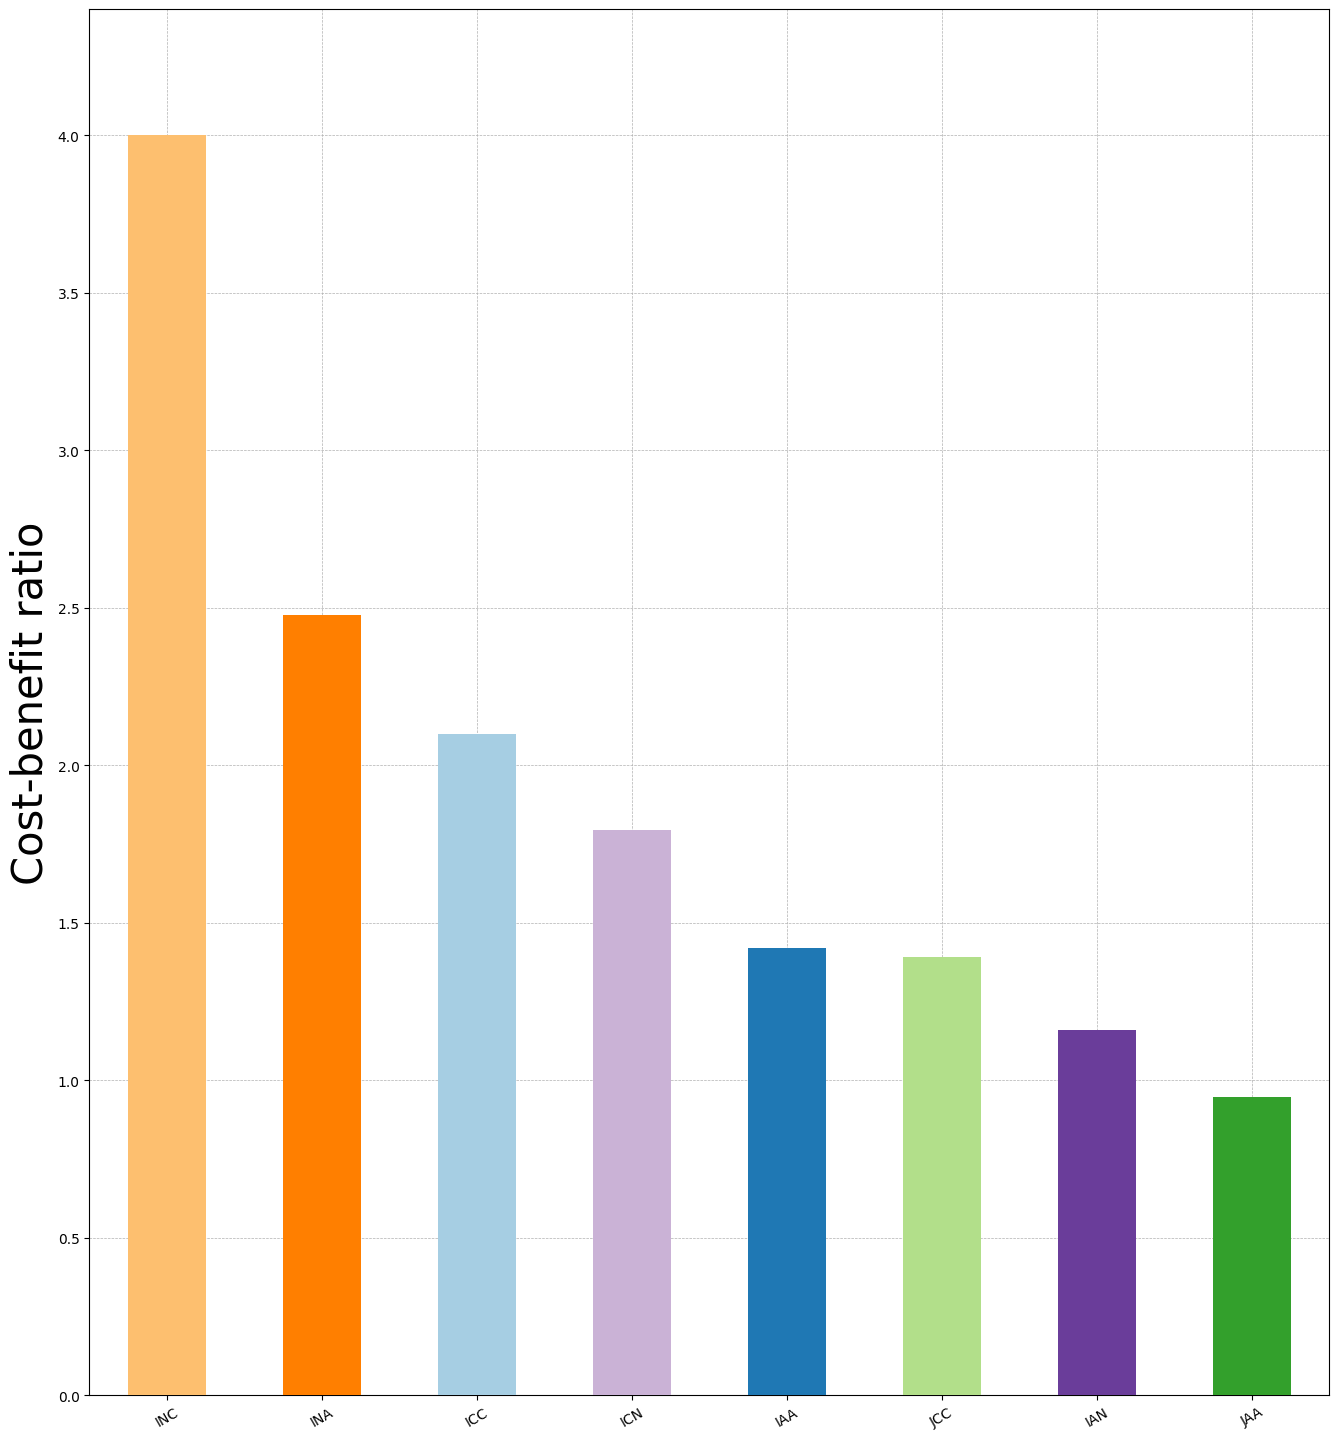

In [121]:
### Plot cost vs benefit

# Dropping rows with infinite cost_benefit_ratio values and updating the DataFrame
df_clean_dropped_inf = df_npv_cost_loss_benefit[df_npv_cost_loss_benefit['cost_benefit_ratio'].notna() & (df_npv_cost_loss_benefit['cost_benefit_ratio'] != float('inf'))]



# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6',
    'IAN': '#6A3D9A', 'JCC': '#B2DF8A', 'ICC': '#A6CEE3', 'JAA': '#33A02C', 'IAA': '#1F78B4'
}

# Sort data by cost-benefit ratio
df_sorted = df_clean_dropped_inf.sort_values('cost_benefit_ratio', ascending=False)

# Plot setup
fig, ax = plt.subplots(figsize=(16, 18))
df_sorted['cost_benefit_ratio'].plot(kind='bar', color=[strategy_colors[strategy] for strategy in df_sorted.index], ax=ax, zorder=3)
#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Cost-benefit ratio', fontsize=30)
plt.xticks(rotation=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Handle infinite values in plot
ax.set_ylim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()

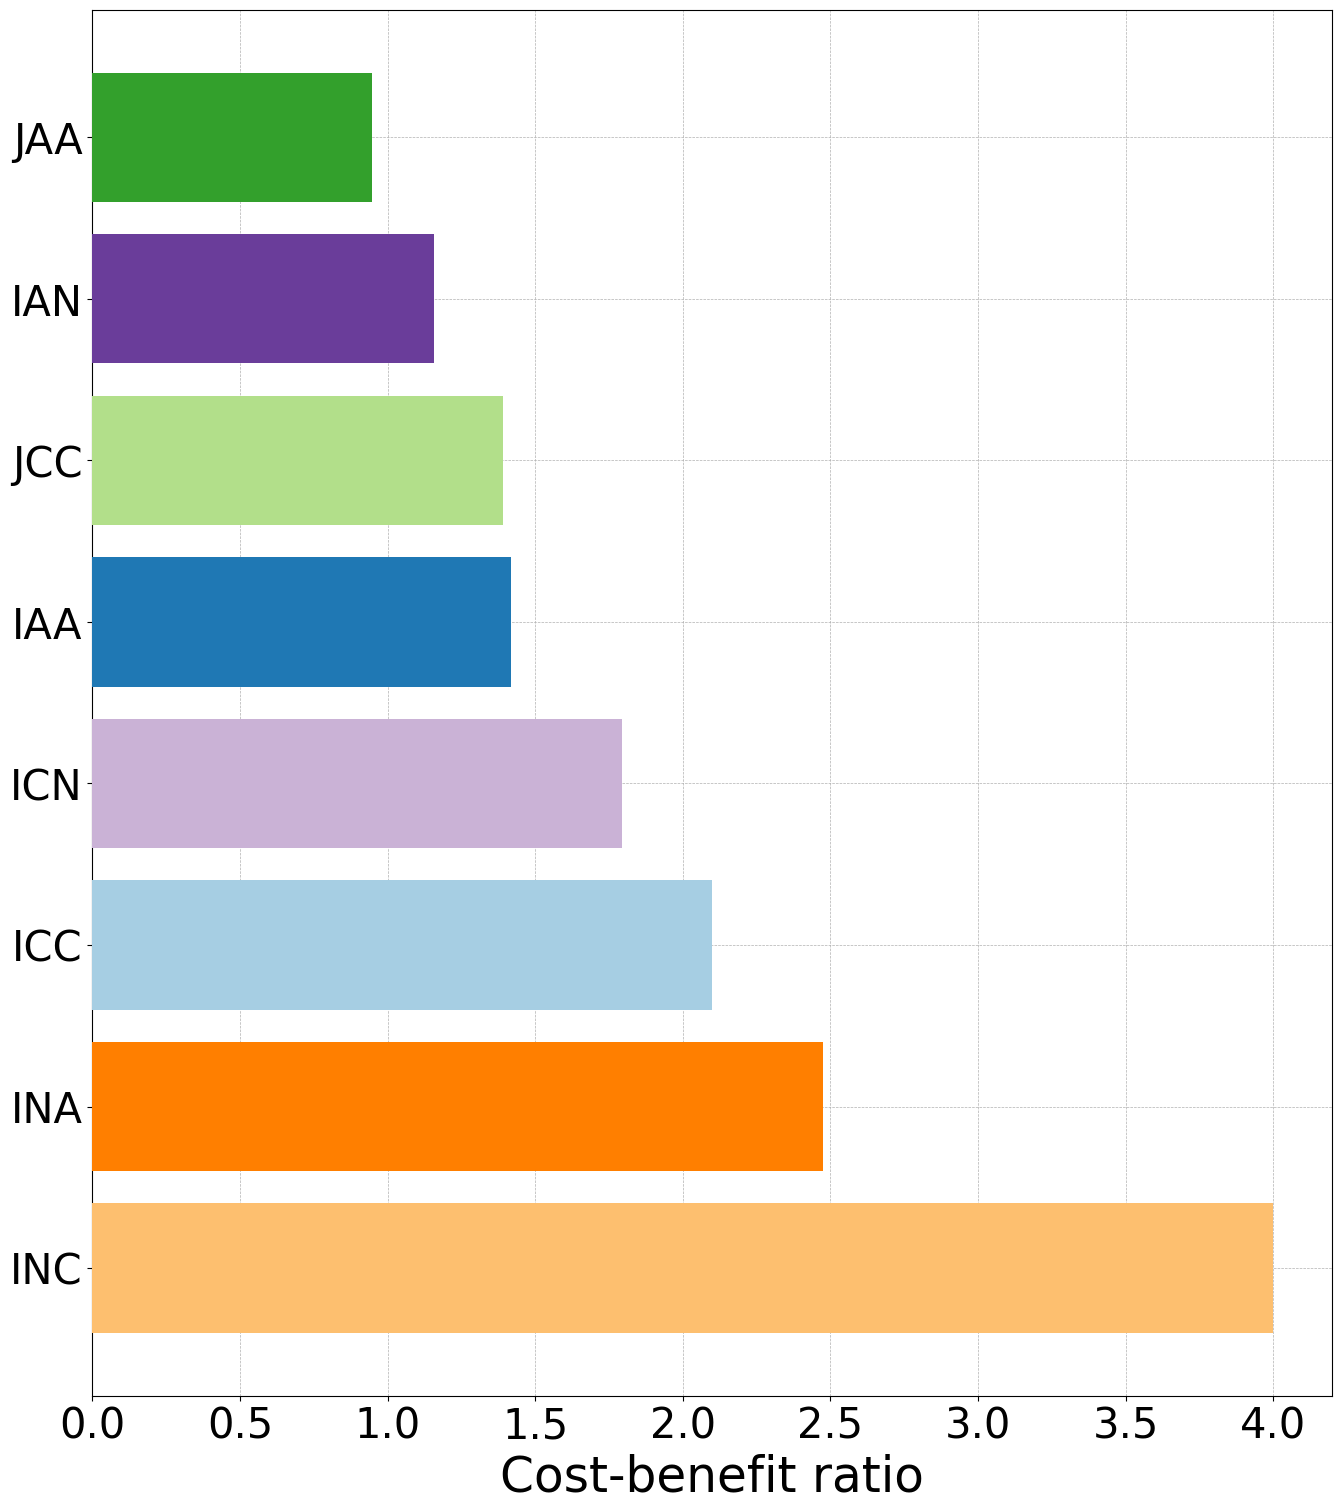

In [122]:
# Switching to a horizontal bar plot to display strategy names on the y-axis
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_sorted.index, df_sorted['cost_benefit_ratio'],
               color=[strategy_colors[strategy] for strategy in df_sorted.index], zorder=3)

#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('Cost-benefit ratio', fontsize=35)
ax.set_ylabel('', fontsize=35)
plt.yticks(fontsize=30)  # Larger font for strategy names
plt.xticks(fontsize=30)  # Larger font for ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)  # grid behind bars
#ax.set_xlim(0, max_value_filtered * 1.1)  # Set x-axis limit to slightly above max value for better display
#ax.set_xlim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_21800\3014519003.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),


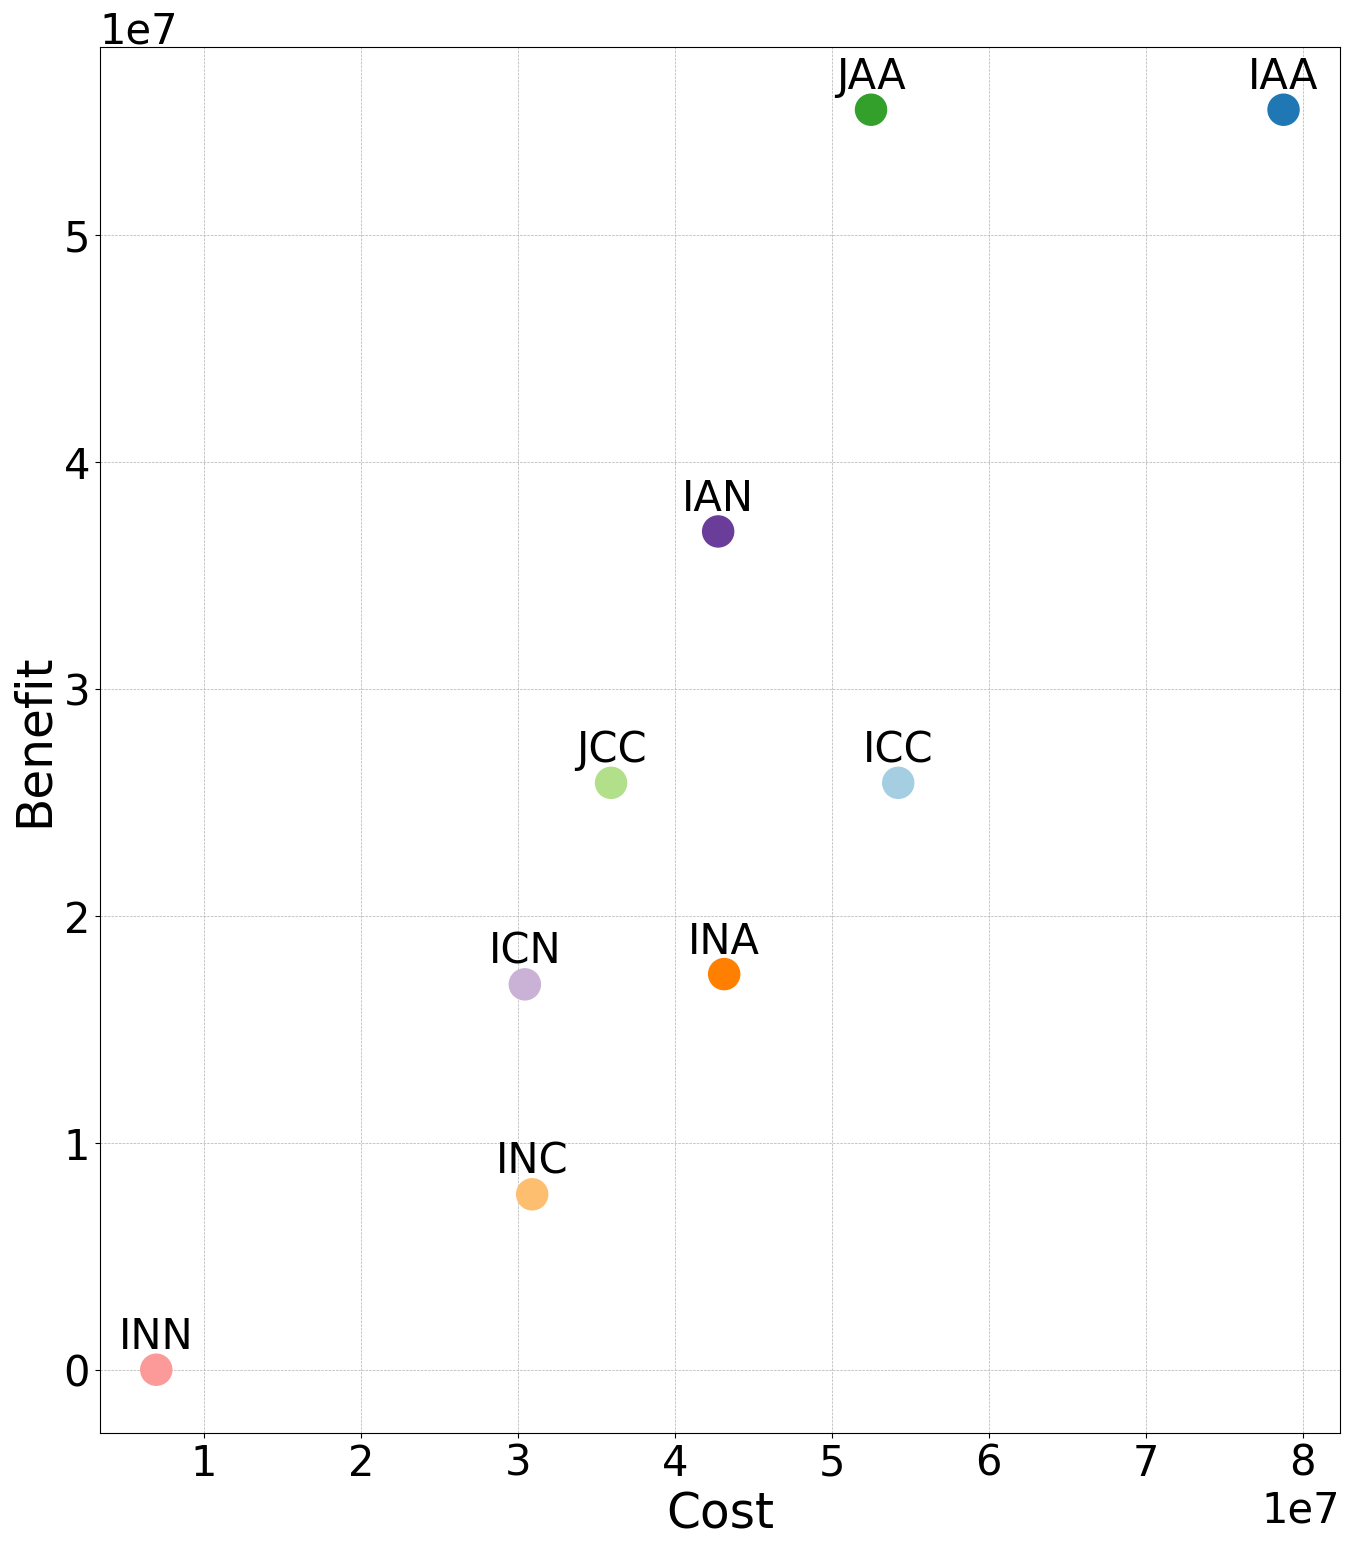

In [123]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit['total_cost'], df_npv_cost_loss_benefit['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
                     s=500, marker='o', zorder=3)  # Use circles as markers

# Formatting to match the provided plot style
ax.set_xlabel('Cost', fontsize=35)
ax.set_ylabel('Benefit', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

plt.savefig(r'../../figures/cost-vs-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

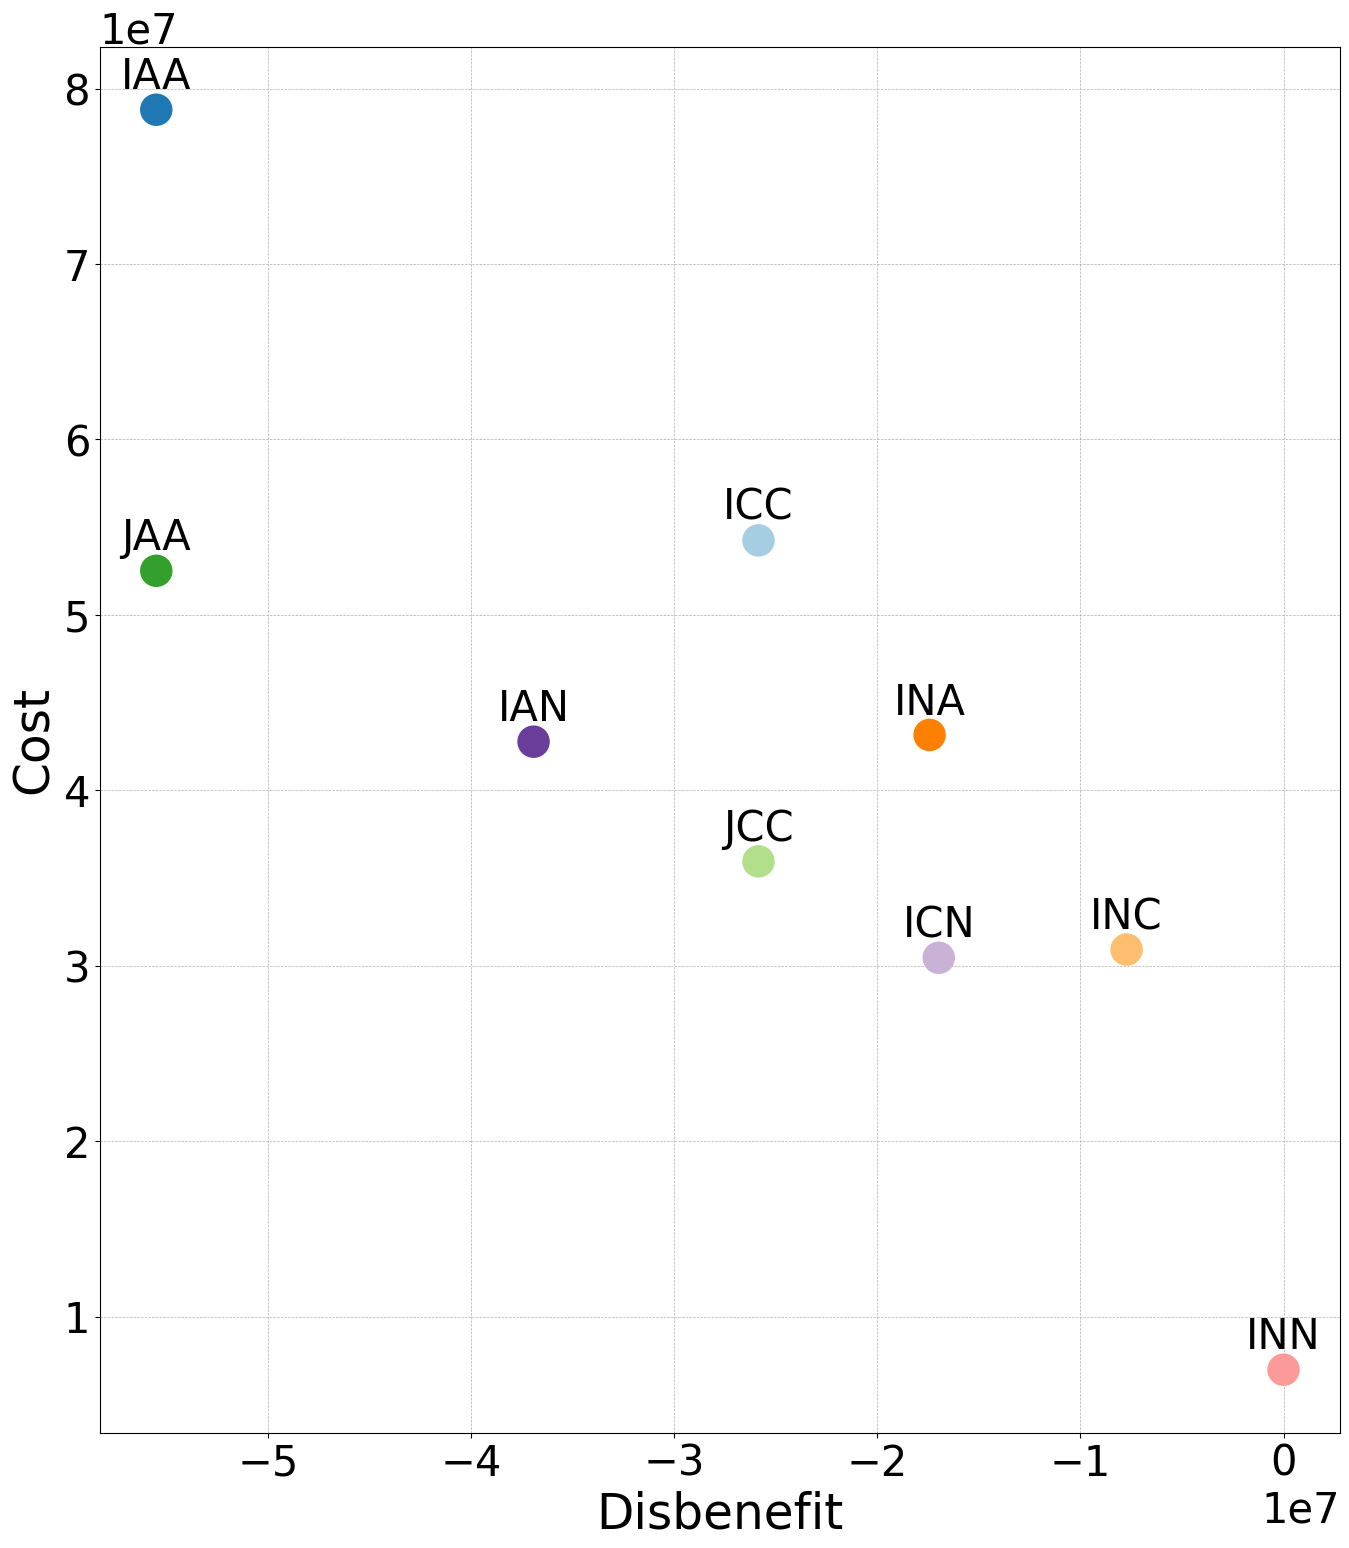

In [124]:
# Correcting the data assignment to create disbenefits from benefits
df_npv_cost_loss_benefit['disbenefit_loss'] = -1 * df_npv_cost_loss_benefit['benefit_loss']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(
    df_npv_cost_loss_benefit['disbenefit_loss'],
    df_npv_cost_loss_benefit['total_cost'],
    color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
    s=500, marker='o', zorder=3
)

# Proper labeling and formatting
ax.set_xlabel('Disbenefit', fontsize=35)
ax.set_ylabel('Cost', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotating each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(
        strategy,
        (df_npv_cost_loss_benefit['disbenefit_loss'].iloc[i], df_npv_cost_loss_benefit['total_cost'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 15),
        ha='center',
        fontsize=30
    )

# Adjusting text size for axis offset text
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

# Save and display the plot
plt.savefig(r'../../figures/cost-vs-disbenefit.png', dpi=400, bbox_inches='tight')
plt.show()